In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
#import pandas_datareader.data as web
#import quandl
import blpapi
from xbbg import blp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import utils

import seaborn as sns

import CLO_SQL_Updated as cs



In [5]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
#file = 'EQ Comparison.xlsx'
#tab = 'bbTickers'


In [2]:
pd.options.display.precision
pd.options.display.float_format = '{:,.4f}'.format

6

# Straight from .GSGSS

In [7]:
def read_bbGSSrpt():
    bbsheet = pd.read_excel(dirpath+'MasterMap4GSS_orig.xlsx',skiprows=9,sheet_name='Worksheet') #.dropna(subset=['Market Value %'])
    bbsheet = bbsheet.loc[~bbsheet['Security'].isin(['<Search>','Totals','Cash','EUR/CAD  3/24/2022','GBP/CAD  3/24/2022',
                                    'INR','USD','USD/CAD  3/24/2022'])]
    bbsheet['Weights'] = bbsheet['Principal']/bbsheet['Principal'].sum()
    return bbsheet

In [8]:
bb_df = read_bbGSSrpt()

# Bloomberg Grab

In [3]:
from datetime import datetime, date
from pandas.tseries.offsets import *
sdate = (pd.Timestamp.today()-252*BusinessDay()).strftime("%Y-%m-%d")
date = pd.Timestamp.today().strftime("%Y-%m-%d")

In [4]:

eq_prices = blp.bdh(tickers=bb_df['PK'] , flds=['RT117'],start_date=sdate, end_date=date)
eq_prices

NameError: name 'bb_df' is not defined

In [11]:
VIX = blp.bdh(tickers='VIX Index' , flds=['RT117'],start_date=sdate, end_date=date)

In [12]:
gssrets = eq_prices.droplevel(1,axis=1).pct_change()
gssrets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-03-17 to 2022-03-04
Columns: 113 entries, AAL US Equity to JPCACA3M Index
dtypes: float64(113)
memory usage: 225.3+ KB


In [13]:
#index_ntr = blp.bdh(tickers=stocks['Bbcall'] , flds=['RT117'],start_date=sdate, end_date=date)
#index_ntr.to_csv(dirpath + 'GSS_NTR.csv')
    
#index_ntr
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-03-17            NaN             NaN             NaN            NaN   
2021-03-18        -0.0183         -0.0396             NaN        -0.0204   
2021-03-19         0.0109         -0.0392             NaN        -0.0003   
2021-03-22        -0.0457         -0.0140             NaN        -0.0309   
2021-03-23        -0.0655         -0.0221             NaN        -0.0587   
...                   ...             ...             ...            ...   
2022-02-28        -0.0120          0.0152          0.0092        -0.0131   
2022-03-01        -0.0557         -0.0606          0.0250        -0.0280   
2022-03-02         0.0049         -0.0296          0.0436         0.0410   
2022-03-03        -0.0403          0.0153         -0.0617        -0.0933   
2022-03-04        -0.0779         -0.0986         -0.0672        -0.0677   

            AIRC US Equity  AMC US Equity  AON US Equity  APG US Equity  \
2021-03-17             NaN            NaN            NaN            NaN   
2021-03-18          0.0016         0.0324        -0.0055        -0.0185   
2021-03-19         -0.0438        -0.0050        -0.0073         0.0020   
2021-03-22          0.0177        -0.1034         0.0022        -0.0356   
2021-03-23          0.0075        -0.1465         0.0026        -0.0138   
...                    ...            ...            ...            ...   
2022-02-28         -0.0151         0.0680        -0.0028        -0.0155   
2022-03-01         -0.0132        -0.0286        -0.0079        -0.0464   
2022-03-02          0.0222         0.0115         0.0104         0.0053   
2022-03-03          0.0098        -0.0254         0.0047         0.0068   
2022-03-04          0.0078        -0.0792        -0.0068        -0.0598   

            APO US Equity  APPN US Equity  ...  VFC US Equity  VLRS US Equity  \
2021-03-17            NaN             NaN  ...            NaN             NaN   
2021-03-18        -0.0156         -0.1120  ...         0.0121         -0.0594   
2021-03-19        -0.0032          0.0218  ...         0.0042         -0.0219   
2021-03-22         0.0450          0.0556  ...         0.0024         -0.0007   
2021-03-23        -0.0061         -0.0447  ...        -0.0421         -0.0435   
...                   ...             ...  ...            ...             ...   
2022-02-28        -0.0062          0.0381  ...        -0.0106         -0.0764   
2022-03-01        -0.0438         -0.0205  ...        -0.0433         -0.0801   
2022-03-02         0.0405          0.0131  ...         0.0301         -0.0148   
2022-03-03        -0.0055         -0.0397  ...        -0.0173         -0.0382   
2022-03-04        -0.0192         -0.0814  ...        -0.0310         -0.0445   

            WOLF US Equity  WSC US Equity  WSM US Equity  WTW US Equity  \
2021-03-17             NaN            NaN            NaN            NaN   
2021-03-18         -0.0942        -0.0298         0.1846        -0.0024   
2021-03-19          0.0128        -0.0067         0.0821        -0.0052   
2021-03-22          0.0180        -0.0421         0.0295         0.0036   
2021-03-23         -0.0638        -0.0187         0.0001         0.0031   
...                    ...            ...            ...            ...   
2022-02-28          0.0160        -0.0480         0.0023        -0.0059   
2022-03-01         -0.0417        -0.0312         0.0128        -0.0152   
2022-03-02          0.0200         0.0860         0.0207         0.0226   
2022-03-03         -0.0111        -0.0182         0.0128         0.0038   
2022-03-04         -0.0513        -0.0060        -0.0020        -0.0122   

            XP US Equity  ZEN US Equity  ZZZ CN Equity  JPCACA3M Index  
2021-03-17           NaN            NaN            NaN             NaN  
2021-03-18       -0.0691        -0.0587        -0.0026          0.0000  
2021-03-19        0.0434         0.0318         0.0167          0.0000  
2021-03-22        0.0030        

In [14]:
indices = ['SPX Index','SPXT Index','SPTR Index','RU20INTR Index','RU10INTR Index','SPTSXN Index',
           'SP400NTR Index','SPTRSMCN Index']

beta_df = blp.bdh(tickers=indices, flds=['PX_LAST'],start_date=sdate, end_date=date)
betarets = beta_df.droplevel(1,axis=1).pct_change()
betarets.fillna(0,inplace=True)
   
beta_df

SPX Index SPXT Index SPTR Index RU20INTR Index RU10INTR Index  \
              PX_LAST    PX_LAST    PX_LAST        PX_LAST        PX_LAST   
2021-03-17 3,974.1200 8,237.3500 8,237.3520    11,996.2800    13,315.7100   
2021-03-18 3,915.4600 8,116.1700 8,116.1670    11,643.6000    13,100.1000   
2021-03-19 3,913.1000 8,112.1300 8,112.1340    11,746.3200    13,103.7800   
2021-03-22 3,940.5900 8,169.1400 8,169.1360    11,640.1200    13,191.2600   
2021-03-23 3,910.5200 8,106.8300 8,106.8330    11,223.5800    13,075.3000   
...               ...        ...        ...            ...            ...   
2022-02-28 4,373.9400 9,186.3700 9,186.3730    10,615.4900    14,542.4500   
2022-03-01 4,306.2600 9,044.4700 9,044.4710    10,410.9100    14,317.7800   
2022-03-02 4,386.5400 9,213.3900 9,213.3950    10,672.1900    14,584.3900   
2022-03-03 4,363.4900 9,166.1300 9,166.1310    10,536.4400    14,482.9400   
2022-03-04 4,309.1500        NaN        NaN            NaN            NaN   

           SPTSXN Index SP400NTR Index SPTRSMCN Index  
                PX_LAST        PX_LAST        PX_LAST  
2021-03-17     238.8000     3,901.6900     1,766.3800  
2021-03-18     236.9900     3,827.0800     1,727.1800  
2021-03-19     237.2200     3,828.6500     1,732.7900  
2021-03-22     236.7500     3,806.1500     1,708.1700  
2021-03-23     234.9200     3,706.7600     1,648.6400  
...                 ...            ...            ...  
2022-02-28     270.7700     3,930.1900     1,696.6900  
2022-03-01     269.2400     3,853.1800     1,664.5900  
2022-03-02     272.4700     3,957.0200     1,710.1300  
2022-03-03     272.4600     3,924.7300     1,698.0400  
2022-03-04          NaN            NaN            NaN  

[250 rows x 8 columns]

# Aggregate to Groups, Long/Short and Total Portfolio

In [15]:
bb_df = bb_df.loc[bb_df['PK'].isin(gssrets.columns)]

In [16]:
bb_df

Security              PK            ID     Position    Price   PCS  \
3     AAL US   AAL US Equity           AAL -48,672.0000  15.7100  USER   
4    ACCD US  ACCD US Equity          ACCD -10,492.0000  16.6400  USER   
5    ACVA US  ACVA US Equity          ACVA -13,524.0000  13.2400  USER   
6     AEO US   AEO US Equity           AEO -19,648.0000  19.3400  USER   
7    AIRC US  AIRC US Equity          AIRC  -9,302.0000  52.5700  USER   
..       ...             ...           ...          ...      ...   ...   
111   WTW US   WTW US Equity  IE00BDB6Q211  38,161.0000 224.7400  USER   
112    XP US    XP US Equity  KYG982391099  -4,884.0000  31.1000  USER   
113   ZEN US   ZEN US Equity           ZEN  -1,346.0000 122.0000  USER   
114   ZZZ CN   ZZZ CN Equity  CA83125J1049 -17,622.0000  28.1700  USER   
115      CAD  JPCACA3M Index           CAD 233,023.9424   1.0000  USER   

     FX Rate        Principal  Accrued       Market Val  Price.1  FX Rate.1  \
3     1.2730    -973,383.0600      NaN    -973,383.0600  19.4000     1.2740   
4     1.2730    -222,249.1000      NaN    -222,249.1000  17.9500     1.2740   
5     1.2730    -227,940.5300      NaN    -227,940.5300  15.9200     1.2740   
6     1.2730    -483,730.2200      NaN    -483,730.2200  20.6300     1.2740   
7     1.2730    -622,504.8200      NaN    -622,504.8200  36.7800     1.2740   
..       ...              ...      ...              ...      ...        ...   
111   1.2730  10,917,633.9100      NaN  10,917,633.9100 214.3600     1.2740   
112   1.2730    -193,359.0300      NaN    -193,359.0300  29.0500     1.2740   
113   1.2730    -209,041.8800      NaN    -209,041.8800  96.8100     1.2740   
114   1.0000    -496,411.7400      NaN    -496,411.7400  29.8600     1.0000   
115   1.0000 233,023,942.3800      NaN 233,023,942.3800   1.0000     1.0000   

         Principal.1  Accrued.1         Cost Val Cost Date          STRATEGY  \
3    -1,203,079.7000        NaN  -1,203,079.7000  01/31/22       SHORT HEDGE   
4      -239,925.8300        NaN    -239,925.8300  01/18/22       IPO&HD beta   
5      -274,280.0000        NaN    -274,280.0000  01/18/22       IPO&HD beta   
6      -516,390.4600        NaN    -516,390.4600  02/28/22     DISCRETIONARY   
7      -435,840.4200        NaN    -435,840.4200  01/31/22       SHORT ALPHA   
..               ...        ...              ...       ...               ...   
111  10,421,739.0200        NaN  10,421,739.0200  03/01/21  LOW VOL, QUALITY   
112    -180,770.9400        NaN    -180,770.9400  01/06/22   FAILURE MODEL A   
113    -166,003.1800        NaN    -166,003.1800  01/06/22   FAILURE MODEL A   
114    -526,124.9500        NaN    -526,124.9500  02/28/22     DISCRETIONARY   
115 233,023,942.3800        NaN 233,023,942.3800  11/11/19               NaN   

     Weights  
3    -0.0019  
4    -0.0004  
5    -0.0004  
6    -0.0009  
7    -0.0012  
..       ...  
111   0.0210  
112  -0.0004  
113  -0.0004  
114  -0.0010  
115   0.4491  

[113 rows x 18 columns]

In [18]:
gssrets.fillna(0,inplace=True)
for grp in bb_df['STRATEGY'].unique():
    #grp
    grpstks = bb_df.loc[bb_df['STRATEGY']==grp,'PK']
    #grpstks
    #gssrets.loc[:,grpstks]
    bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].T
    gssrets[grp] = (gssrets.loc[:,grpstks]*bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].values).sum(axis=1)/\
        abs((bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].T).sum())

3     -0.0019
33    -0.0021
50    -0.0040
59    -0.0005
104   -0.0020
Name: Weights, dtype: float64

4    -0.0004
5    -0.0004
14   -0.0004
21   -0.0004
24   -0.0005
27   -0.0005
28   -0.0006
29   -0.0006
53   -0.0005
57   -0.0004
68   -0.0007
74   -0.0006
77   -0.0005
81   -0.0004
84   -0.0005
88   -0.0005
90   -0.0005
92   -0.0005
97   -0.0005
99   -0.0004
Name: Weights, dtype: float64

6     -0.0009
30    -0.0020
35    -0.0020
47    -0.0026
58    -0.0025
65    -0.0010
110   -0.0016
114   -0.0010
Name: Weights, dtype: float64

7     -0.0012
8     -0.0030
12    -0.0015
20    -0.0010
22    -0.0008
26    -0.0011
34    -0.0031
40    -0.0008
45    -0.0005
48    -0.0047
51    -0.0009
61    -0.0007
63    -0.0022
64    -0.0008
83    -0.0004
85    -0.0083
86    -0.0008
91     0.0407
93    -0.0001
100   -0.0006
101   -0.0047
Name: Weights, dtype: float64

9     0.0855
41    0.0172
111   0.0210
Name: Weights, dtype: float64

10    0.0303
16    0.0263
19    0.0202
36    0.0519
107   0.0586
Name: Weights, dtype: float64

11   0.0940
39   0.0301
49   0.0477
Name: Weights, dtype: float64

13   0.0127
Name: Weights, dtype: float64

15    -0.0003
17    -0.0002
18    -0.0004
23    -0.0002
25    -0.0003
32    -0.0003
37    -0.0003
43    -0.0004
44    -0.0003
46    -0.0002
52    -0.0003
54    -0.0003
55    -0.0004
62    -0.0003
66    -0.0003
67    -0.0002
69    -0.0002
71    -0.0003
72    -0.0003
73    -0.0002
75    -0.0002
76    -0.0002
78    -0.0002
79    -0.0003
80    -0.0003
82    -0.0003
89    -0.0004
94    -0.0003
95    -0.0002
102   -0.0003
103   -0.0002
108   -0.0003
112   -0.0004
113   -0.0004
Name: Weights, dtype: float64

31   0.0526
38   0.0108
98   0.0204
Name: Weights, dtype: float64

42   -0.0005
60   -0.0061
87   -0.1023
96   -0.1216
Name: Weights, dtype: float64

56    0.0142
105   0.0329
Name: Weights, dtype: float64

70   0.0717
Name: Weights, dtype: float64

Series([], Name: Weights, dtype: float64)

109   0.1255
Name: Weights, dtype: float64

In [25]:
#gssrets.drop(columns=np.nan,inplace=True)
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-03-17         0.0000          0.0000          0.0000         0.0000   
2021-03-18        -0.0183         -0.0396          0.0000        -0.0204   
2021-03-19         0.0109         -0.0392          0.0000        -0.0003   
2021-03-22        -0.0457         -0.0140          0.0000        -0.0309   
2021-03-23        -0.0655         -0.0221          0.0000        -0.0587   
...                   ...             ...             ...            ...   
2022-02-28        -0.0120          0.0152          0.0092        -0.0131   
2022-03-01        -0.0557         -0.0606          0.0250        -0.0280   
2022-03-02         0.0049         -0.0296          0.0436         0.0410   
2022-03-03        -0.0403          0.0153         -0.0617        -0.0933   
2022-03-04        -0.0779         -0.0986         -0.0672        -0.0677   

            AIRC US Equity  AMC US Equity  AON US Equity  APG US Equity  \
2021-03-17          0.0000         0.0000         0.0000         0.0000   
2021-03-18          0.0016         0.0324        -0.0055        -0.0185   
2021-03-19         -0.0438        -0.0050        -0.0073         0.0020   
2021-03-22          0.0177        -0.1034         0.0022        -0.0356   
2021-03-23          0.0075        -0.1465         0.0026        -0.0138   
...                    ...            ...            ...            ...   
2022-02-28         -0.0151         0.0680        -0.0028        -0.0155   
2022-03-01         -0.0132        -0.0286        -0.0079        -0.0464   
2022-03-02          0.0222         0.0115         0.0104         0.0053   
2022-03-03          0.0098        -0.0254         0.0047         0.0068   
2022-03-04          0.0078        -0.0792        -0.0068        -0.0598   

            APO US Equity  APPN US Equity  ...  LOW VOL, QUALITY  \
2021-03-17         0.0000          0.0000  ...            0.0000   
2021-03-18        -0.0156         -0.1120  ...           -0.0057   
2021-03-19        -0.0032          0.0218  ...           -0.0076   
2021-03-22         0.0450          0.0556  ...            0.0016   
2021-03-23        -0.0061         -0.0447  ...            0.0032   
...                   ...             ...  ...               ...   
2022-02-28        -0.0062          0.0381  ...           -0.0054   
2022-03-01        -0.0438         -0.0205  ...           -0.0103   
2022-03-02         0.0405          0.0131  ...            0.0133   
2022-03-03        -0.0055         -0.0397  ...            0.0001   
2022-03-04        -0.0192         -0.0814  ...           -0.0113   

            IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  FAILURE MODEL A  SHORT CYCLE  \
2021-03-17         0.0000       0.0000   0.0000           0.0000       0.0000   
2021-03-18        -0.0308      -0.0191  -0.0089           0.0416      -0.0504   
2021-03-19        -0.0019       0.0065  -0.0290          -0.0162       0.0136   
2021-03-22        -0.0073       0.0261  -0.0036          -0.0081      -0.0178   
2021-03-23        -0.0197      -0.0031  -0.0385           0.0201      -0.0424   
...                   ...          ...      ...              ...          ...   
2022-02-28        -0.0320      -0.0022  -0.0162          -0.0128       0.0481   
2022-03-01        -0.0526      -0.0317  -0.0346          -0.0105      -0.0155   
2022-03-02         0.0158       0.0274   0.0266           0.0030       0.0182   
2022-03-03        -0.0127      -0.0083  -0.0117           0.0232      -0.0278   
2022-03-04        -0.0315      -0.0193  -0.0069           0.0199       0.0059   

              BETA  DURATION   VALUE  CYCLICAL/QUALITY  
2021-03-17  0.0000    0.0000  0.0000            0.0000  
2021-03-18  0.0119   -0.0133  0.0061           -0.0298  
2021-03-19  0.0019    0.0169  0.0176           -0.0067  
2021-03-22 -0.0040   -0.0150 -0.0340           -0.0421  
2021-03-23  0.0115   -0.0297  0.0011           -0.0187  
...            ...       ...     ...               ...  
2022-02-2

In [31]:
strategies = bb_df['STRATEGY'].unique()
strategies = strategies.tolist()
strategies.remove(np.nan)
strategies

['SHORT HEDGE',
 'IPO&HD beta',
 'DISCRETIONARY',
 'SHORT ALPHA',
 'LOW VOL, QUALITY',
 'IDIOSYNCRATIC',
 'GARP GROWTH',
 'RE-OPEN',
 'FAILURE MODEL A',
 'SHORT CYCLE',
 'BETA',
 'DURATION',
 'VALUE',
 'CYCLICAL/QUALITY']

In [32]:
gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(dirpath+'SubStrategy.xlsx')

In [37]:
#stocks= bb_df
stocks

Security              PK            ID     Position    Price   PCS  \
3     AAL US   AAL US Equity           AAL -48,672.0000  15.7100  USER   
4    ACCD US  ACCD US Equity          ACCD -10,492.0000  16.6400  USER   
5    ACVA US  ACVA US Equity          ACVA -13,524.0000  13.2400  USER   
6     AEO US   AEO US Equity           AEO -19,648.0000  19.3400  USER   
7    AIRC US  AIRC US Equity          AIRC  -9,302.0000  52.5700  USER   
..       ...             ...           ...          ...      ...   ...   
111   WTW US   WTW US Equity  IE00BDB6Q211  38,161.0000 224.7400  USER   
112    XP US    XP US Equity  KYG982391099  -4,884.0000  31.1000  USER   
113   ZEN US   ZEN US Equity           ZEN  -1,346.0000 122.0000  USER   
114   ZZZ CN   ZZZ CN Equity  CA83125J1049 -17,622.0000  28.1700  USER   
115      CAD  JPCACA3M Index           CAD 233,023.9424   1.0000  USER   

     FX Rate        Principal  Accrued       Market Val  Price.1  FX Rate.1  \
3     1.2730    -973,383.0600      NaN    -973,383.0600  19.4000     1.2740   
4     1.2730    -222,249.1000      NaN    -222,249.1000  17.9500     1.2740   
5     1.2730    -227,940.5300      NaN    -227,940.5300  15.9200     1.2740   
6     1.2730    -483,730.2200      NaN    -483,730.2200  20.6300     1.2740   
7     1.2730    -622,504.8200      NaN    -622,504.8200  36.7800     1.2740   
..       ...              ...      ...              ...      ...        ...   
111   1.2730  10,917,633.9100      NaN  10,917,633.9100 214.3600     1.2740   
112   1.2730    -193,359.0300      NaN    -193,359.0300  29.0500     1.2740   
113   1.2730    -209,041.8800      NaN    -209,041.8800  96.8100     1.2740   
114   1.0000    -496,411.7400      NaN    -496,411.7400  29.8600     1.0000   
115   1.0000 233,023,942.3800      NaN 233,023,942.3800   1.0000     1.0000   

         Principal.1  Accrued.1         Cost Val Cost Date          STRATEGY  \
3    -1,203,079.7000        NaN  -1,203,079.7000  01/31/22       SHORT HEDGE   
4      -239,925.8300        NaN    -239,925.8300  01/18/22       IPO&HD beta   
5      -274,280.0000        NaN    -274,280.0000  01/18/22       IPO&HD beta   
6      -516,390.4600        NaN    -516,390.4600  02/28/22     DISCRETIONARY   
7      -435,840.4200        NaN    -435,840.4200  01/31/22       SHORT ALPHA   
..               ...        ...              ...       ...               ...   
111  10,421,739.0200        NaN  10,421,739.0200  03/01/21  LOW VOL, QUALITY   
112    -180,770.9400        NaN    -180,770.9400  01/06/22   FAILURE MODEL A   
113    -166,003.1800        NaN    -166,003.1800  01/06/22   FAILURE MODEL A   
114    -526,124.9500        NaN    -526,124.9500  02/28/22     DISCRETIONARY   
115 233,023,942.3800        NaN 233,023,942.3800  11/11/19               NaN   

     Weights  
3    -0.0019  
4    -0.0004  
5    -0.0004  
6    -0.0009  
7    -0.0012  
..       ...  
111   0.0210  
112  -0.0004  
113  -0.0004  
114  -0.0010  
115   0.4491  

[113 rows x 18 columns]

In [39]:
gssrets['GSS'] = (gssrets.loc[:,stocks['PK']]*stocks['Weights'].values).sum(axis=1)/\
        (stocks['Weights'].values).sum()
lmask = (stocks['Weights']>0)# & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Longs'] = (gssrets.loc[:,stocks.loc[lmask,'PK']]*stocks.loc[lmask,'Weights'].values).sum(axis=1)
smask = (stocks['Weights']<=0) #& (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Shorts'] = (gssrets.loc[:,stocks.loc[smask,'PK']]*stocks.loc[smask,'Weights'].values).sum(axis=1)

# + rescaled to 1
gssrets['Longs (rescaled)'] = (gssrets.loc[:,stocks.loc[lmask,'PK']]*stocks.loc[lmask,'Weights'].values).sum(axis=1)/\
            (stocks.loc[lmask,'Weights'].values).sum()
gssrets['Shorts (rescaled)'] = (gssrets.loc[:,stocks.loc[smask,'PK']]*stocks.loc[smask,'Weights'].values).sum(axis=1)/\
            (stocks.loc[smask,'Weights'].values).sum()


In [40]:

#gssrets['GSS']
#missing_dates = gssrets.loc[~gssrets.index.isin(betarets.index)].index
#missing_dates
#betarets.index = gssrets.index
allrets = gssrets.join(betarets)
allrets.fillna(0,inplace=True)
allrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-03-17         0.0000          0.0000          0.0000         0.0000   
2021-03-18        -0.0183         -0.0396          0.0000        -0.0204   
2021-03-19         0.0109         -0.0392          0.0000        -0.0003   
2021-03-22        -0.0457         -0.0140          0.0000        -0.0309   
2021-03-23        -0.0655         -0.0221          0.0000        -0.0587   
...                   ...             ...             ...            ...   
2022-02-28        -0.0120          0.0152          0.0092        -0.0131   
2022-03-01        -0.0557         -0.0606          0.0250        -0.0280   
2022-03-02         0.0049         -0.0296          0.0436         0.0410   
2022-03-03        -0.0403          0.0153         -0.0617        -0.0933   
2022-03-04        -0.0779         -0.0986         -0.0672        -0.0677   

            AIRC US Equity  AMC US Equity  AON US Equity  APG US Equity  \
2021-03-17          0.0000         0.0000         0.0000         0.0000   
2021-03-18          0.0016         0.0324        -0.0055        -0.0185   
2021-03-19         -0.0438        -0.0050        -0.0073         0.0020   
2021-03-22          0.0177        -0.1034         0.0022        -0.0356   
2021-03-23          0.0075        -0.1465         0.0026        -0.0138   
...                    ...            ...            ...            ...   
2022-02-28         -0.0151         0.0680        -0.0028        -0.0155   
2022-03-01         -0.0132        -0.0286        -0.0079        -0.0464   
2022-03-02          0.0222         0.0115         0.0104         0.0053   
2022-03-03          0.0098        -0.0254         0.0047         0.0068   
2022-03-04          0.0078        -0.0792        -0.0068        -0.0598   

            APO US Equity  APPN US Equity  ...  Longs (rescaled)  \
2021-03-17         0.0000          0.0000  ...            0.0000   
2021-03-18        -0.0156         -0.1120  ...           -0.0139   
2021-03-19        -0.0032          0.0218  ...            0.0010   
2021-03-22         0.0450          0.0556  ...           -0.0054   
2021-03-23        -0.0061         -0.0447  ...           -0.0098   
...                   ...             ...  ...               ...   
2022-02-28        -0.0062          0.0381  ...           -0.0060   
2022-03-01        -0.0438         -0.0205  ...           -0.0210   
2022-03-02         0.0405          0.0131  ...            0.0203   
2022-03-03        -0.0055         -0.0397  ...           -0.0117   
2022-03-04        -0.0192         -0.0814  ...           -0.0128   

            Shorts (rescaled)  SPX Index  SPXT Index  SPTR Index  \
2021-03-17            -0.0000     0.0000      0.0000      0.0000   
2021-03-18            -0.0146    -0.0148     -0.0147     -0.0147   
2021-03-19             0.0008    -0.0006     -0.0005     -0.0005   
2021-03-22             0.0016     0.0070      0.0070      0.0070   
2021-03-23            -0.0177    -0.0076     -0.0076     -0.0076   
...                       ...        ...         ...         ...   
2022-02-28             0.0036    -0.0024     -0.0023     -0.0023   
2022-03-01            -0.0181    -0.0155     -0.0154     -0.0154   
2022-03-02             0.0128     0.0186      0.0187      0.0187   
2022-03-03            -0.0104    -0.0053     -0.0051     -0.0051   
2022-03-04            -0.0208    -0.0125      0.0000      0.0000   

            RU20INTR Index  RU10INTR Index  SPTSXN Index  SP400NTR Index  \
2021-03-17          0.0000          0.0000        0.0000          0.0000   
2021-03-18         -0.0294         -0.0162       -0.0076         -0.0191   
2021-03-19          0.0088          0.0003        0.0010          0.0004   
2021-03-22         -0.0090          0.0067       -0.0020         -0.0059   
2021-03-23         -0.0358         -0.0088       -0.0077         -0.0261   
...                    ...             ...           ...             ...   
2022-02-28          0.0036      

In [41]:
gssrets[['Longs','Shorts']].corr()

Longs  Shorts
Longs   1.0000 -0.8490
Shorts -0.8490  1.0000

In [42]:
VIX = VIX.droplevel(1,axis=1)
#len(VIX)
highVIX = VIX.loc[VIX['VIX Index']>20].index
highVIX.values

array([datetime.date(2021, 3, 18), datetime.date(2021, 3, 19),
       datetime.date(2021, 3, 23), datetime.date(2021, 3, 24),
       datetime.date(2021, 3, 29), datetime.date(2021, 5, 11),
       datetime.date(2021, 5, 12), datetime.date(2021, 5, 13),
       datetime.date(2021, 5, 18), datetime.date(2021, 5, 19),
       datetime.date(2021, 5, 20), datetime.date(2021, 5, 21),
       datetime.date(2021, 6, 18), datetime.date(2021, 7, 19),
       datetime.date(2021, 8, 18), datetime.date(2021, 8, 19),
       datetime.date(2021, 9, 10), datetime.date(2021, 9, 17),
       datetime.date(2021, 9, 20), datetime.date(2021, 9, 21),
       datetime.date(2021, 9, 22), datetime.date(2021, 9, 28),
       datetime.date(2021, 9, 29), datetime.date(2021, 9, 30),
       datetime.date(2021, 10, 1), datetime.date(2021, 10, 4),
       datetime.date(2021, 10, 5), datetime.date(2021, 10, 6),
       datetime.date(2021, 11, 26), datetime.date(2021, 11, 29),
       datetime.date(2021, 11, 30), datetime.date(202

In [43]:
from scipy import stats
strats = list(strategies) + ['GSS','Longs','Shorts','Longs (rescaled)','Shorts (rescaled)']
betas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
dnbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
upbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)

for col in betarets.columns:
    for strat in strats:
        betas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]
        
        upbetas.loc[col,strat] = stats.linregress(allrets.loc[~allrets.index.isin(highVIX),col].values,
                    allrets.loc[~allrets.index.isin(highVIX),strat].values)[0]
        dnbetas.loc[col,strat] = stats.linregress(allrets.loc[allrets.index.isin(highVIX),col].values,
                    allrets.loc[allrets.index.isin(highVIX),strat].values)[0]

betas
upbetas
dnbetas

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index           -1.4973      -1.5264        -0.7139     -12.8646   
SPXT Index          -1.4596      -1.5158        -0.7148     -12.9549   
SPTR Index          -1.4596      -1.5158        -0.7148     -12.9548   
RU20INTR Index      -1.3186      -1.2663        -0.4524     -12.8493   
RU10INTR Index      -1.4733      -1.6170        -0.7045     -14.4543   
SPTSXN Index        -2.0350      -1.9985        -0.8349     -12.2442   
SP400NTR Index      -1.5521      -1.2436        -0.6302     -11.0834   
SPTRSMCN Index      -1.4193      -1.0438        -0.5136      -9.8980   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                 0.7896         0.9679       1.3967   1.0956   
SPXT Index                0.7889         0.9560       1.3956   1.1004   
SPTR Index                0.7889         0.9560       1.3956   1.1004   
RU20INTR Index            0.3611         0.6341       0.6839   0.8737   
RU10INTR Index            0.7699         0.9530       1.3718   1.1036   
SPTSXN Index              0.8885         1.3158       1.5489   1.4237   
SP400NTR Index            0.5516         0.8211       0.8713   1.1353   
SPTRSMCN Index            0.3745         0.6647       0.6412   0.9609   

                FAILURE MODEL A  SHORT CYCLE    BETA  DURATION  VALUE  \
SPX Index               -1.2604       0.9842 -0.9645    1.4507 0.8331   
SPXT Index              -1.2587       0.9956 -0.9644    1.4225 0.8317   
SPTR Index              -1.2587       0.9956 -0.9644    1.4225 0.8317   
RU20INTR Index          -0.9716       0.8518 -0.5259    1.0060 0.4973   
RU10INTR Index          -1.3283       0.9882 -0.9405    1.4889 0.8169   
SPTSXN Index            -1.7115       2.0535 -1.0875    1.9966 0.9384   
SP400NTR Index          -0.9888       1.0058 -0.7107    1.0933 0.6581   
SPTRSMCN Index          -0.8128       0.9433 -0.5520    0.8798 0.5197   

                CYCLICAL/QUALITY    GSS  Longs  Shorts  Longs (rescaled)  \
SPX Index                 1.2545 0.5811 0.9190 -0.3379            0.6996   
SPXT Index                1.2611 0.5792 0.9158 -0.3365            0.6972   
SPTR Index                1.2611 0.5792 0.9158 -0.3365            0.6972   
RU20INTR Index            0.8948 0.3515 0.5714 -0.2199            0.4350   
RU10INTR Index            1.2611 0.5726 0.9091 -0.3365            0.6921   
SPTSXN Index              1.5718 0.8083 1.2138 -0.4055            0.9241   
SP400NTR Index            1.1031 0.4583 0.7240 -0.2657            0.5512   
SPTRSMCN Index            0.9211 0.3648 0.5825 -0.2177            0.4435   

                Shorts (rescaled)  
SPX Index                  1.0777  
SPXT Index                 1.0734  
SPTR Index                 1.0734  
RU20INTR Index             0.7014  
RU10INTR Index             1.0735  
SPTSXN Index               1.2933  
SP400NTR Index             0.8474  
SPTRSMCN Index             0.6943

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index           -1.3010      -1.4427        -0.7818      -9.3225   
SPXT Index          -1.2993      -1.4425        -0.7810      -9.3153   
SPTR Index          -1.2994      -1.4425        -0.7810      -9.3155   
RU20INTR Index      -1.3353      -1.1848        -0.4029     -11.5066   
RU10INTR Index      -1.3552      -1.6499        -0.7805     -11.8959   
SPTSXN Index        -1.7031      -1.7642        -0.7563      -8.8187   
SP400NTR Index      -1.5425      -1.0939        -0.6399      -8.7718   
SPTRSMCN Index      -1.3747      -0.8450        -0.4545      -7.4890   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                 0.6084         0.9262       1.3249   0.9959   
SPXT Index                0.6083         0.9274       1.3239   0.9936   
SPTR Index                0.6083         0.9274       1.3239   0.9936   
RU20INTR Index            0.1645         0.5608       0.5279   0.8206   
RU10INTR Index            0.5890         0.9655       1.3203   1.0464   
SPTSXN Index              0.6010         1.2028       1.1709   1.2120   
SP400NTR Index            0.3962         0.7618       0.6990   1.0693   
SPTRSMCN Index            0.1921         0.5550       0.4570   0.8353   

                FAILURE MODEL A  SHORT CYCLE    BETA  DURATION  VALUE  \
SPX Index               -1.3127       1.2190 -0.9566    1.1945 0.6547   
SPXT Index              -1.3120       1.2202 -0.9566    1.1921 0.6537   
SPTR Index              -1.3121       1.2201 -0.9567    1.1921 0.6537   
RU20INTR Index          -0.8739       1.0476 -0.4163    0.7050 0.3676   
RU10INTR Index          -1.4484       1.2396 -0.9373    1.3084 0.6700   
SPTSXN Index            -1.6061       2.3810 -0.8247    1.6615 0.6293   
SP400NTR Index          -0.8763       1.2931 -0.6079    0.7046 0.5154   
SPTRSMCN Index          -0.6360       1.1181 -0.4221    0.5394 0.3607   

                CYCLICAL/QUALITY    GSS  Longs  Shorts  Longs (rescaled)  \
SPX Index                 1.5459 0.5832 0.9009 -0.3177            0.6859   
SPXT Index                1.5479 0.5834 0.9011 -0.3176            0.6860   
SPTR Index                1.5480 0.5834 0.9011 -0.3177            0.6860   
RU20INTR Index            0.9583 0.3188 0.5079 -0.1891            0.3867   
RU10INTR Index            1.5793 0.5924 0.9175 -0.3251            0.6985   
SPTSXN Index              1.7601 0.7768 1.0968 -0.3199            0.8350   
SP400NTR Index            1.2558 0.4459 0.6784 -0.2325            0.5164   
SPTRSMCN Index            0.9442 0.3215 0.4977 -0.1762            0.3789   

                Shorts (rescaled)  
SPX Index                  1.0133  
SPXT Index                 1.0132  
SPTR Index                 1.0132  
RU20INTR Index             0.6031  
RU10INTR Index             1.0369  
SPTSXN Index               1.0204  
SP400NTR Index             0.7415  
SPTRSMCN Index             0.5620

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index           -1.6427      -1.6237        -0.6487     -14.2554   
SPXT Index          -1.5739      -1.5982        -0.6479     -14.3694   
SPTR Index          -1.5739      -1.5982        -0.6479     -14.3693   
RU20INTR Index      -1.3359      -1.3701        -0.4634     -14.0264   
RU10INTR Index      -1.5668      -1.6580        -0.6338     -15.5318   
SPTSXN Index        -2.2809      -2.1744        -0.8154     -13.2703   
SP400NTR Index      -1.6110      -1.3763        -0.5955     -12.4231   
SPTRSMCN Index      -1.5001      -1.2536        -0.5417     -12.0013   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                 0.9185         0.9511       1.4130   1.2051   
SPXT Index                0.9134         0.9276       1.4061   1.2080   
SPTR Index                0.9134         0.9276       1.4061   1.2080   
RU20INTR Index            0.5296         0.6590       0.7622   0.9513   
RU10INTR Index            0.8900         0.9060       1.3707   1.1843   
SPTSXN Index              1.0978         1.3178       1.7165   1.6046   
SP400NTR Index            0.6752         0.8279       0.9363   1.2420   
SPTRSMCN Index            0.5567         0.7336       0.7582   1.1276   

                FAILURE MODEL A  SHORT CYCLE    BETA  DURATION  VALUE  \
SPX Index               -1.2972       0.7855 -0.9672    1.6676 0.9253   
SPXT Index              -1.2873       0.8009 -0.9629    1.6142 0.9202   
SPTR Index              -1.2873       0.8009 -0.9629    1.6142 0.9202   
RU20INTR Index          -1.0878       0.6296 -0.5947    1.3073 0.5944   
RU10INTR Index          -1.3312       0.7846 -0.9344    1.6605 0.8875   
SPTSXN Index            -1.8199       1.7531 -1.2217    2.2990 1.1183   
SP400NTR Index          -1.0989       0.7385 -0.7655    1.4219 0.7534   
SPTRSMCN Index          -1.0062       0.7090 -0.6549    1.2518 0.6648   

                CYCLICAL/QUALITY    GSS  Longs  Shorts  Longs (rescaled)  \
SPX Index                 1.1252 0.5753 0.9214 -0.3461            0.7015   
SPXT Index                1.1282 0.5696 0.9121 -0.3425            0.6944   
SPTR Index                1.1282 0.5696 0.9121 -0.3425            0.6944   
RU20INTR Index            0.8312 0.3640 0.6039 -0.2399            0.4597   
RU10INTR Index            1.1143 0.5550 0.8941 -0.3391            0.6807   
SPTSXN Index              1.3952 0.8065 1.2548 -0.4483            0.9553   
SP400NTR Index            0.9927 0.4542 0.7377 -0.2835            0.5616   
SPTRSMCN Index            0.8839 0.3904 0.6413 -0.2510            0.4883   

                Shorts (rescaled)  
SPX Index                  1.1040  
SPXT Index                 1.0926  
SPTR Index                 1.0926  
RU20INTR Index             0.7651  
RU10INTR Index             1.0816  
SPTSXN Index               1.4301  
SP400NTR Index             0.9042  
SPTRSMCN Index             0.8005

In [44]:
date

'2022-03-04'

In [45]:
with pd.ExcelWriter(dirpath+'GSS Analysis '+date+'.xlsx') as writer:  
    allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer, sheet_name='Aggregate Correlations')
    betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')
    upbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='UpBetas')
    dnbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='DownBetas')
    gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,'SubStrategy Correlations')

In [46]:
betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')

In [47]:
import CLO_SQL_Updated as cs
agg_corr = allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr()
#agg_corr.drop(columns=['CASH'],inplace=True)
agg_corr.reset_index(inplace=True)
cs.insertTable(agg_corr,'EQ_Aggregate_Correlations')


In [48]:
betas.drop(columns=['CASH'],inplace=True)
betas.reset_index(inplace=True)
cs.insertTable(betas,'EQ_Betas')
gss_corr = gssrets[strategies].corr()
gss_corr.drop(columns=['CASH'],inplace=True)
gss_corr.reset_index(inplace=True)
cs.insertTable(gss_corr,'EQ_SubStrategy_Correlations')

KeyError: "['CASH'] not found in axis"

# Some Risk Diagnosis

In [49]:
# need to check the annualization of this, looks off
import utils
gssrets.apply(lambda x: utils.RetStats(x,freq='Daily'))

C:\Users\jknechtel\Miniconda3\GSS\utils.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  Sortino = AnnRet / DownsideDev
C:\Users\jknechtel\Miniconda3\GSS\utils.py:118: RuntimeWarning: invalid value encountered in double_scalars
  AnnRet = (1 + CumRet(r))**(a/len(r)) -1


AAL US Equity ACCD US Equity ACVA US Equity  \
AnnRet                      -42.30%        -68.10%        -50.46%   
AnnVol                       45.02%         66.54%         60.18%   
MaxDD                        43.90%         72.73%         71.87%   
MaxQDD                       26.10%         60.61%         52.81%   
AvgQDD                       10.02%         29.23%         22.90%   
MaxDD/Vol                      0.98            1.1            1.2   
Worst Return                 -8.79%        -13.13%        -11.18%   
Best Return                   8.38%         27.69%         25.00%   
Worst 5y Return                nan%           nan%           nan%   
Best 5y Return                 nan%           nan%           nan%   
Skewness                       0.26            1.1            1.1   
Kurtosis                       0.71            7.6            7.2   
Sharpe Ratio                  -0.94           -1.0          -0.84   
Sortino Ratio                  -1.5           -1.7           -1.4   
PositivePeriods Ratio          0.42           0.44           0.45   

                      AEO US Equity AIRC US Equity AMC US Equity  \
AnnRet                      -39.36%         22.03%        22.54%   
AnnVol                       46.76%         21.64%       150.01%   
MaxDD                        51.48%          9.78%        76.79%   
MaxQDD                       34.83%          5.57%        67.00%   
AvgQDD                       15.16%          1.63%        33.69%   
MaxDD/Vol                       1.1           0.45          0.51   
Worst Return                -10.15%         -4.38%       -17.92%   
Best Return                   9.19%          5.45%        95.22%   
Worst 5y Return                nan%           nan%          nan%   
Best 5y Return                 nan%           nan%          nan%   
Skewness                      -0.25         -0.045           4.4   
Kurtosis                       0.74           0.85       3.9e+01   
Sharpe Ratio                  -0.84            1.0          0.15   
Sortino Ratio                  -1.2            1.6          0.37   
PositivePeriods Ratio          0.45           0.53          0.43   

                      AON US Equity APG US Equity APO US Equity  \
AnnRet                       30.25%        -4.77%        35.28%   
AnnVol                       22.43%        34.27%        30.25%   
MaxDD                        18.31%        25.68%        21.34%   
MaxQDD                       16.67%        18.51%        17.56%   
AvgQDD                        5.41%         5.57%         9.50%   
MaxDD/Vol                      0.82          0.75          0.71   
Worst Return                 -4.61%        -7.12%        -6.96%   
Best Return                   8.21%         9.44%         7.14%   
Worst 5y Return                nan%          nan%          nan%   
Best 5y Return                 nan%          nan%          nan%   
Skewness                       0.82          0.34        -0.096   
Kurtosis                        5.0           1.7           1.8   
Sharpe Ratio                    1.3         -0.14           1.2   
Sortino Ratio                   2.2         -0.24           1.7   
PositivePeriods Ratio          0.52          0.47          0.51   

                      APPN US Equity  ... SHORT CYCLE     BETA DURATION  \
AnnRet                       -67.93%  ...      57.14%  -10.07%  -52.25%   
AnnVol                        69.23%  ...      35.02%   13.64%   39.42%   
MaxDD                         70.60%  ...      21.45%   19.25%   56.63%   
MaxQDD                        50.57%  ...      13.01%    9.65%   29.38%   
AvgQDD                        24.93%  ...       4.27%    4.72%   12.88%   
MaxDD/Vol                        1.0  ...        0.61      1.4      1.4   
Worst Return                 -12.24%  ...      -6.56%   -2.41%   -8.53%   
Best Return                   18.08%  ...       6.21%    2.47%    8.12%   
Worst 5y Return                 nan%  ...        nan%     nan%     nan%   
Best 

In [51]:

shorts = stocks.loc[stocks.Weights < 0]
longs = stocks.loc[stocks.Weights >= 0]

In [52]:
#gssrets[]#shorts.BBTickers.values
gss_shorts = (gssrets[shorts.BBTickers.values + ' Equity'] * shorts.MarketValuePercent.values ).sum(axis=1)
gss_longs = (gssrets[longs.BBTickers.values + ' Equity'] * longs.MarketValuePercent.values ).sum(axis=1)

AttributeError: 'DataFrame' object has no attribute 'BBTickers'

In [32]:
#np.correlate(gss_shorts,gss_longs)
np.corrcoef(gss_shorts,gss_longs)

NameError: name 'gss_shorts' is not defined

In [ ]:
tckrs.sort_values(by='MarketValuePercent',inplace=True)

In [53]:
corr = gssrets.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_7896/2323773306.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [55]:
import seaborn as sns
sns_plot = sns.pairplot(gssrets[weights.index], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig("H:/Asset Allocation/Research Code/Asset_PairPlot.png") 

NameError: name 'weights' is not defined

# Residual Analysis

In [56]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [57]:
dirpath

'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'

In [65]:
residuals = pd.read_excel(dirpath+'Residuals.xlsx',sheet_name='Clean')
residuals.set_index('Description',inplace=True)
residuals = residuals.T

In [68]:
residuals
stocks

Description      2022-03-03  2022-03-02  2022-03-01  2022-02-28  2022-02-25  \
ACVA US Equity       -0.015        0.05        0.04      -0.013      -0.029   
AMC US Equity         0.017      -0.011      0.0056       0.053      -0.021   
APG US Equity         0.017      -0.026       -0.02      -0.017     -0.0033   
ACCD US Equity        0.058      -0.017      -0.066      -0.014     -0.0032   
AAL US Equity       -0.0032      0.0027     -0.0042        0.01      0.0097   
...                     ...         ...         ...         ...         ...   
LSPD CN Equity      -0.0065      0.0099     -0.0081      -0.028      0.0012   
SHELL NA Equity       -0.03        0.02     0.00071      -0.032     -0.0078   
ZZZ CN Equity       -0.0077      -0.027    -0.00096     -0.0037      -0.017   
NVCR US Equity       0.0032      -0.037     -0.0034    -0.00067      0.0095   
GOOG US Equity       0.0075     -0.0059       0.013      0.0058     1.8e-05   

Description      2022-02-24  2022-02-23  2022-02-22  2022-02-18  2022-02-17  \
ACVA US Equity       -0.018        0.02       0.038       0.044        0.17   
AMC US Equity         0.041      -0.001      -0.053      -0.024       0.022   
APG US Equity         0.012       0.043      -0.014     -0.0041       -0.01   
ACCD US Equity       -0.027      -0.016      -0.024      -0.032       -0.03   
AAL US Equity       -0.0068     -0.0052     -0.0064     -0.0028     0.00044   
...                     ...         ...         ...         ...         ...   
LSPD CN Equity        0.016      -0.017       0.013      -0.021      -0.016   
SHELL NA Equity       0.041      -0.013      0.0061      0.0021      -0.013   
ZZZ CN Equity        -0.017     -0.0073      -0.027     -0.0049      0.0016   
NVCR US Equity       -0.015      -0.031       0.037       0.005       0.003   
GOOG US Equity       0.0085      0.0084      0.0027      0.0036      -0.017   

Description      ...  2021-03-19  2021-03-18  2021-03-17  2021-03-16  \
ACVA US Equity   ...         0.0         0.0         0.0         0.0   
AMC US Equity    ...      0.0079       0.062       0.026      -0.042   
APG US Equity    ...      -0.006      0.0068     -0.0034       0.016   
ACCD US Equity   ...      -0.045     -0.0057       0.024      -0.017   
AAL US Equity    ...       0.015    -0.00028      0.0015      0.0039   
...              ...         ...         ...         ...         ...   
LSPD CN Equity   ...      -0.015      -0.027      -0.043      0.0055   
SHELL NA Equity  ...       0.003      0.0049      0.0099      -0.014   
ZZZ CN Equity    ...      0.0041      0.0088       0.011      -0.018   
NVCR US Equity   ...     -0.0035     -0.0033       0.015       0.034   
GOOG US Equity   ...     -0.0032      -0.008     0.00016     0.00071   

Description      2021-03-15  2021-03-12  2021-03-11  2021-03-10  2021-03-09  \
ACVA US Equity          0.0         0.0         0.0         0.0         0.0   
AMC US Equity          0.24       0.055       0.044      -0.075       0.071   
APG US Equity       -0.0063      0.0088      -0.019     -0.0096      -0.029   
ACCD US Equity        0.041       -0.03       0.043      -0.015       0.058   
AAL US Equity         0.032       0.012       0.023       0.017       0.016   
...                     ...         ...         ...         ...         ...   
LSPD CN Equity        0.032       0.068       0.046      -0.017       0.033   
SHELL NA Equity      -0.014       0.002      0.0064    -0.00047       0.016   
ZZZ CN Equity       0.00083      0.0054       -0.02      -0.002      -0.005   
NVCR US Equity      -0.0011       0.016      0.0076      -0.013      -0.035   
GOOG US Equity       -0.006      -0.013      0.0033      0.0038     -0.0059   

Description      2021-03-08  
ACVA US Equity          0.0  
AMC US Equity          0.14  
APG US Equity         0.015  
ACCD US Equity      -0.0011  
AAL US Equity        -0.008  
...                     ...  
LSPD CN Equity       -0.055  
SHELL NA Equity      -0.013  
ZZZ CN Equity     

Security              PK            ID  Position   Price   PCS  FX Rate  \
3     AAL US   AAL US Equity           AAL  -4.9e+04 1.6e+01  USER      1.3   
4    ACCD US  ACCD US Equity          ACCD    -1e+04 1.7e+01  USER      1.3   
5    ACVA US  ACVA US Equity          ACVA  -1.4e+04 1.3e+01  USER      1.3   
6     AEO US   AEO US Equity           AEO    -2e+04 1.9e+01  USER      1.3   
7    AIRC US  AIRC US Equity          AIRC  -9.3e+03 5.3e+01  USER      1.3   
..       ...             ...           ...       ...     ...   ...      ...   
111   WTW US   WTW US Equity  IE00BDB6Q211   3.8e+04 2.2e+02  USER      1.3   
112    XP US    XP US Equity  KYG982391099  -4.9e+03 3.1e+01  USER      1.3   
113   ZEN US   ZEN US Equity           ZEN  -1.3e+03 1.2e+02  USER      1.3   
114   ZZZ CN   ZZZ CN Equity  CA83125J1049  -1.8e+04 2.8e+01  USER      1.0   
115      CAD  JPCACA3M Index           CAD   2.3e+05     1.0  USER      1.0   

     Principal  Accrued  Market Val  Price.1  FX Rate.1  Principal.1  \
3     -9.7e+05      NaN    -9.7e+05  1.9e+01        1.3     -1.2e+06   
4     -2.2e+05      NaN    -2.2e+05  1.8e+01        1.3     -2.4e+05   
5     -2.3e+05      NaN    -2.3e+05  1.6e+01        1.3     -2.7e+05   
6     -4.8e+05      NaN    -4.8e+05  2.1e+01        1.3     -5.2e+05   
7     -6.2e+05      NaN    -6.2e+05  3.7e+01        1.3     -4.4e+05   
..         ...      ...         ...      ...        ...          ...   
111    1.1e+07      NaN     1.1e+07  2.1e+02        1.3        1e+07   
112   -1.9e+05      NaN    -1.9e+05  2.9e+01        1.3     -1.8e+05   
113   -2.1e+05      NaN    -2.1e+05  9.7e+01        1.3     -1.7e+05   
114     -5e+05      NaN      -5e+05    3e+01        1.0     -5.3e+05   
115    2.3e+08      NaN     2.3e+08      1.0        1.0      2.3e+08   

     Accrued.1  Cost Val Cost Date          STRATEGY  Weights  
3          NaN  -1.2e+06  01/31/22       SHORT HEDGE  -0.0019  
4          NaN  -2.4e+05  01/18/22       IPO&HD beta -0.00043  
5          NaN  -2.7e+05  01/18/22       IPO&HD beta -0.00044  
6          NaN  -5.2e+05  02/28/22     DISCRETIONARY -0.00093  
7          NaN  -4.4e+05  01/31/22       SHORT ALPHA  -0.0012  
..         ...       ...       ...               ...      ...  
111        NaN     1e+07  03/01/21  LOW VOL, QUALITY    0.021  
112        NaN  -1.8e+05  01/06/22   FAILURE MODEL A -0.00037  
113        NaN  -1.7e+05  01/06/22   FAILURE MODEL A  -0.0004  
114        NaN  -5.3e+05  02/28/22     DISCRETIONARY -0.00096  
115        NaN   2.3e+08  11/11/19               NaN     0.45  

[113 rows x 18 columns]

In [64]:
mmap

NameError: name 'mmap' is not defined

In [69]:
# these are ETFs, FX and missing stocks
stocks.loc[~stocks['PK'].isin(residuals.index)]

Security              PK   ID  Position   Price   PCS  FX Rate  Principal  \
42     FL US    FL US Equity   FL  -6.7e+03 3.1e+01  USER      1.3   -2.6e+05   
60    KRE US   KRE US Equity  KRE  -3.4e+04 7.3e+01  USER      1.3   -3.2e+06   
87    RSP US   RSP US Equity  RSP  -2.7e+05 1.5e+02  USER      1.3   -5.3e+07   
96    SPY US   SPY US Equity  SPY  -1.1e+05 4.4e+02  USER      1.3   -6.3e+07   
115      CAD  JPCACA3M Index  CAD   2.3e+05     1.0  USER      1.0    2.3e+08   

     Accrued  Market Val  Price.1  FX Rate.1  Principal.1  Accrued.1  \
42       NaN    -2.6e+05  3.1e+01        1.3     -2.6e+05        NaN   
60       NaN    -3.2e+06  5.5e+01        1.3     -2.4e+06        NaN   
87       NaN    -5.3e+07  1.5e+02        1.3     -5.2e+07        NaN   
96       NaN    -6.3e+07  4.4e+02        1.3     -6.4e+07        NaN   
115      NaN     2.3e+08      1.0        1.0      2.3e+08        NaN   

     Cost Val Cost Date STRATEGY  Weights  
42   -2.6e+05  03/03/22     BETA -0.00051  
60   -2.4e+06  06/01/21     BETA  -0.0061  
87   -5.2e+07  01/31/22     BETA     -0.1  
96   -6.4e+07  10/06/21     BETA    -0.12  
115   2.3e+08  11/11/19      NaN     0.45

In [70]:
stocks['PK']

3       AAL US Equity
4      ACCD US Equity
5      ACVA US Equity
6       AEO US Equity
7      AIRC US Equity
            ...      
111     WTW US Equity
112      XP US Equity
113     ZEN US Equity
114     ZZZ CN Equity
115    JPCACA3M Index
Name: PK, Length: 113, dtype: object

In [71]:
attrib = stocks.loc[stocks['PK'].isin(residuals.index),['PK','Weights','STRATEGY']]

In [72]:
len(attrib)
len(residuals)
attrib.sum()

108

108

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_7896/632159159.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  attrib.sum()


PK         AAL US EquityACCD US EquityACVA US EquityAEO U...
Weights                                                 0.78
dtype: object

In [47]:
residuals.loc[residuals.index.isin(stocks['Security Description'])]

#which new stocks do we have?
stocks.loc[~stocks['Security Description'].isin(residuals.index),'Security Description']

Description                         2022-02-01  2022-01-31  2022-01-28  \
CARGOJET INC                               0.0      0.0028       0.023   
GENERAL MILLS INC                          0.0     -0.0032      0.0088   
KELLOGG                                    0.0      -0.029     -0.0043   
TATTOOED CHEF INC CLASS A                  0.0       0.013     -0.0039   
LEMONADE INC                               0.0      -0.013     -0.0024   
3D SYSTEMS CORP                            0.0    -0.00055     0.00053   
CLEAN ENERGY FUELS CORP                    0.0      -0.007     -0.0033   
FASTLY INC CLASS A                         0.0       0.035      -0.028   
APARTMENT INCOME REIT CORP                 0.0      0.0091     -0.0087   
APPIAN CORP CLASS A                        0.0      -0.018      -0.011   
TRUPANION INC                              0.0      -0.015       -0.01   
FUELCELL ENERGY INC                        0.0       0.041       0.009   
DIAMONDBACK ENERGY INC                     0.0       -0.03      -0.015   
ARAMARK                                    0.0      0.0018     -0.0028   
THYSSENKRUPP AG                            0.0      0.0066      -0.023   
ARITZIA SUBORDINATE VOTING INC             0.0      0.0023       0.012   
JUST EAT TAKEAWAY.COM NV                   0.0       0.013      -0.019   
CONTROLADORA VUELA COMPANIA ADR RE         0.0      0.0095      0.0031   
BERRY GLOBAL GROUP INC                     0.0      -0.011      -0.017   
FIDELITY NATIONAL INFORMATION SERV         0.0      0.0057       0.047   
ELEMENT FLEET MANAGEMENT CORP              0.0      0.0076      -0.003   
WILLIS TOWERS WATSON PLC                   0.0     -0.0035       0.014   
API GROUP CORP                             0.0     -0.0051      0.0055   
META PLATFORMS INC CLASS A                 0.0      0.0028     -0.0088   
AON PLC CLASS A                            0.0      0.0019       0.002   
ALPHABET INC CLASS C                       0.0     -0.0089     0.00068   
NRG ENERGY INC                             0.0      -0.011      0.0079   
WILLSCOT MOBILE MINI HOLDINGS CORP         0.0       -0.03      0.0094   
UNITED AIRLINES HOLDINGS INC               0.0      -0.002     -0.0029   
DELTA AIR LINES INC                        0.0     -0.0011       0.001   
HAWAIIAN HOLDINGS INC                      0.0       0.015     -0.0032   
AMERICAN AIRLINES GROUP INC                0.0     -0.0018      -0.013   

Description                         2022-01-27  2022-01-26  2022-01-25  \
CARGOJET INC                            -0.032        0.03      0.0006   
GENERAL MILLS INC                      -0.0026     -0.0019      0.0052   
KELLOGG                                -0.0047      -0.013      0.0068   
TATTOOED CHEF INC CLASS A               -0.019       0.024       0.033   
LEMONADE INC                             0.031      -0.013       0.025   
3D SYSTEMS CORP                           0.02     -0.0066        0.02   
CLEAN ENERGY FUELS CORP                  0.029       0.049       0.046   
FASTLY INC CLASS A                     -0.0011      -0.013     -0.0091   
APARTMENT INCOME REIT CORP              0.0045        0.01       0.014   
APPIAN CORP CLASS A                      0.061       0.011      -0.011   
TRUPANION INC                           -0.013      0.0095      0.0097   
FUELCELL ENERGY INC                     -0.017       0.023       0.019   
DIAMONDBACK ENERGY INC                  0.0041      0.0094       0.023   
ARAMARK                                 -0.011     0.00031     -0.0027   
THYSSENKRUPP AG                          -0.01       0.011       0.015   
ARITZIA SUBORDINATE VOTING INC         -0.0027       0.026       0.028   
JUST EAT TAKEAWAY.COM NV              -0.00035      0.0097      -0.017   
CONTROLADORA VUELA COMPANIA ADR RE     -0.0055     -0.0098      0.0092   
BERRY GLOBAL GROUP INC                 -0.0093      -0.018       0.011   
FIDELITY NATIONAL INFORMATION SERV      0.0011     -0.0016     -0.0012   
ELE

16                  CANADIAN DOLLAR
17             UNITED STATES DOLLAR
34    SPDR S&P REGIONAL BANKING ETF
36              SPDR S&P  ETF TRUST
Name: Security Description, dtype: object

In [48]:
#attrib
residuals.loc[~residuals.index.isin(attrib['Security Description'])]
residuals = residuals.loc[residuals.index != 'MAGNA INTERNATIONAL INC']
residuals

Description                         2022-02-01  2022-01-31  2022-01-28  \
DATADOG INC CLASS A                        0.0     -0.0077       0.017   
APTIV PLC                                  0.0       -0.03      -0.013   
AIRBNB INC CLASS A                         0.0      0.0058       0.005   
SITEONE LANDSCAPE SUPPLY INC               0.0      -0.018     -0.0074   
CAMPBELL SOUP                              0.0      0.0012     -0.0028   
DOORDASH INC CLASS A                       0.0       -0.02       0.041   
AMYRIS INC                                 0.0        0.03       0.015   
Magnite Inc                                0.0      -0.023      0.0096   
BIGCOMMERCE HOLDINGS INC SERIES            0.0      -0.013       0.016   
POSHMARK INC CLASS A                       0.0      -0.017       0.024   
WM TECHNOLOGY INC CLASS A                  0.0       0.044      -0.021   
AMAZON COM INC                             0.0     -0.0043      0.0065   
TRONOX HOLDINGS PLC                        0.0       0.021      -0.041   
APOLLO GLOBAL MANAGEMENT INC CLASS         0.0      -0.016      0.0023   

Description                         2022-01-27  2022-01-26  2022-01-25  \
DATADOG INC CLASS A                      0.023       0.031      -0.028   
APTIV PLC                                0.036     -0.0038     -0.0044   
AIRBNB INC CLASS A                      0.0026      -0.011       0.011   
SITEONE LANDSCAPE SUPPLY INC             -0.01       0.016      -0.033   
CAMPBELL SOUP                           0.0067     -0.0097      -0.015   
DOORDASH INC CLASS A                    -0.014      -0.058       -0.03   
AMYRIS INC                              -0.025       0.025      -0.061   
Magnite Inc                               0.01      0.0094    -0.00046   
BIGCOMMERCE HOLDINGS INC SERIES          0.013       0.048      0.0013   
POSHMARK INC CLASS A                     0.044      0.0054       0.057   
WM TECHNOLOGY INC CLASS A               -0.026       0.037      -0.018   
AMAZON COM INC                         -0.0099     -0.0022      -0.009   
TRONOX HOLDINGS PLC                       0.02     -0.0091       0.023   
APOLLO GLOBAL MANAGEMENT INC CLASS        0.05     -0.0066     -0.0093   

Description                         2022-01-24  2022-01-21  2022-01-20  \
DATADOG INC CLASS A                      0.051       0.011      0.0026   
APTIV PLC                              0.00075       0.022     -0.0024   
AIRBNB INC CLASS A                      -0.056       0.036       0.022   
SITEONE LANDSCAPE SUPPLY INC             0.011      0.0025       -0.03   
CAMPBELL SOUP                           0.0011      0.0059      -0.013   
DOORDASH INC CLASS A                   -0.0093      -0.018      -0.036   
AMYRIS INC                               0.088      -0.012      -0.032   
Magnite Inc                            -0.0083      0.0015     -0.0058   
BIGCOMMERCE HOLDINGS INC SERIES          0.049     -0.0039       0.016   
POSHMARK INC CLASS A                    -0.052       -0.02       0.016   
WM TECHNOLOGY INC CLASS A                0.018      -0.029     -0.0072   
AMAZON COM INC                          0.0068     -0.0073      -0.012   
TRONOX HOLDINGS PLC                     -0.014       0.016     -0.0025   
APOLLO GLOBAL MANAGEMENT INC CLASS      -0.006      0.0091      0.0019   

Description                         2022-01-19  ...  2021-02-17  2021-02-16  \
DATADOG INC CLASS A                     0.0028  ...      -0.021      -0.032   
APTIV PLC                               0.0036  ...       0.011     -0.0038   
AIRBNB INC CLASS A                      0.0046  ...      -0.027      -0.022   
SITEONE LANDSCAPE SUPPLY INC           -0.0039  ...      0.0047      0.0051   
CAMPBELL SOUP                          -0.0072  ...     -0.0025     -0.0052   
DOORDASH INC CLASS A                     0.032  ...      -0.057       0.037   
AMYRIS INC                               0.042  ...       0.047      -0.022   
Magnite Inc                        

Description                         2022-02-01  2022-01-31  2022-01-28  \
CARGOJET INC                               0.0      0.0028       0.023   
GENERAL MILLS INC                          0.0     -0.0032      0.0088   
KELLOGG                                    0.0      -0.029     -0.0043   
TATTOOED CHEF INC CLASS A                  0.0       0.013     -0.0039   
LEMONADE INC                               0.0      -0.013     -0.0024   
3D SYSTEMS CORP                            0.0    -0.00055     0.00053   
DATADOG INC CLASS A                        0.0     -0.0077       0.017   
APTIV PLC                                  0.0       -0.03      -0.013   
AIRBNB INC CLASS A                         0.0      0.0058       0.005   
CLEAN ENERGY FUELS CORP                    0.0      -0.007     -0.0033   
FASTLY INC CLASS A                         0.0       0.035      -0.028   
APARTMENT INCOME REIT CORP                 0.0      0.0091     -0.0087   
SITEONE LANDSCAPE SUPPLY INC               0.0      -0.018     -0.0074   
APPIAN CORP CLASS A                        0.0      -0.018      -0.011   
CAMPBELL SOUP                              0.0      0.0012     -0.0028   
DOORDASH INC CLASS A                       0.0       -0.02       0.041   
TRUPANION INC                              0.0      -0.015       -0.01   
FUELCELL ENERGY INC                        0.0       0.041       0.009   
AMYRIS INC                                 0.0        0.03       0.015   
Magnite Inc                                0.0      -0.023      0.0096   
BIGCOMMERCE HOLDINGS INC SERIES            0.0      -0.013       0.016   
POSHMARK INC CLASS A                       0.0      -0.017       0.024   
DIAMONDBACK ENERGY INC                     0.0       -0.03      -0.015   
WM TECHNOLOGY INC CLASS A                  0.0       0.044      -0.021   
AMAZON COM INC                             0.0     -0.0043      0.0065   
ARAMARK                                    0.0      0.0018     -0.0028   
THYSSENKRUPP AG                            0.0      0.0066      -0.023   
TRONOX HOLDINGS PLC                        0.0       0.021      -0.041   
ARITZIA SUBORDINATE VOTING INC             0.0      0.0023       0.012   
JUST EAT TAKEAWAY.COM NV                   0.0       0.013      -0.019   
CONTROLADORA VUELA COMPANIA ADR RE         0.0      0.0095      0.0031   
BERRY GLOBAL GROUP INC                     0.0      -0.011      -0.017   
FIDELITY NATIONAL INFORMATION SERV         0.0      0.0057       0.047   
ELEMENT FLEET MANAGEMENT CORP              0.0      0.0076      -0.003   
WILLIS TOWERS WATSON PLC                   0.0     -0.0035       0.014   
API GROUP CORP                             0.0     -0.0051      0.0055   
META PLATFORMS INC CLASS A                 0.0      0.0028     -0.0088   
AON PLC CLASS A                            0.0      0.0019       0.002   
ALPHABET INC CLASS C                       0.0     -0.0089     0.00068   
APOLLO GLOBAL MANAGEMENT INC CLASS         0.0      -0.016      0.0023   
NRG ENERGY INC                             0.0      -0.011      0.0079   
WILLSCOT MOBILE MINI HOLDINGS CORP         0.0       -0.03      0.0094   
UNITED AIRLINES HOLDINGS INC               0.0      -0.002     -0.0029   
DELTA AIR LINES INC                        0.0     -0.0011       0.001   
HAWAIIAN HOLDINGS INC                      0.0       0.015     -0.0032   
AMERICAN AIRLINES GROUP INC                0.0     -0.0018      -0.013   

Description                         2022-01-27  2022-01-26  2022-01-25  \
CARGOJET INC                            -0.032        0.03      0.0006   
GENERAL MILLS INC                      -0.0026     -0.0019      0.0052   
KELLOGG                                -0.0047      -0.013      0.0068   
TATTOOED CHEF INC CLASS A               -0.019       0.024       0.033   
LEMONADE INC                             0.031      -0.013       0.025   
3D SYSTEMS CORP                           0.02     -0.0066        0.02   
DAT

In [74]:
longs = attrib.loc[attrib['Weights']>0]
shorts = attrib.loc[attrib['Weights']<=0]
#residuals

In [75]:
long_group = residuals.loc[residuals.index.isin(longs['PK'])]
short_group = residuals.loc[residuals.index.isin(shorts['PK'])]

sdates = short_group.columns
snames = short_group.index
sX = short_group.values

ldates = long_group.columns
lnames = long_group.index
lX = long_group.values

In [76]:
dates = residuals.columns
names = residuals.index
X = residuals.values

In [77]:
dates
X

DatetimeIndex(['2022-03-03', '2022-03-02', '2022-03-01', '2022-02-28',
               '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
               '2022-02-18', '2022-02-17',
               ...
               '2021-03-19', '2021-03-18', '2021-03-17', '2021-03-16',
               '2021-03-15', '2021-03-12', '2021-03-11', '2021-03-10',
               '2021-03-09', '2021-03-08'],
              dtype='datetime64[ns]', name='Description', length=251, freq=None)

array([[-0.01454096,  0.04955493,  0.04018012, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01730755, -0.01080415,  0.00564752, ..., -0.07525387,
         0.07095581,  0.14100857],
       [ 0.01722633, -0.02587806, -0.02034605, ..., -0.00962249,
        -0.02896717,  0.01463688],
       ...,
       [-0.00767194, -0.02712662, -0.00096381, ..., -0.00199249,
        -0.00498424,  0.00175229],
       [ 0.00324043, -0.03673119, -0.00340551, ..., -0.01341376,
        -0.03524829,  0.03310969],
       [ 0.00754644, -0.00594841,  0.01332635, ...,  0.00379042,
        -0.00590938, -0.01023695]])

In [78]:
names

Index(['ACVA US Equity', 'AMC US Equity', 'APG US Equity', 'ACCD US Equity',
       'AAL US Equity', 'AEO US Equity', 'AIRC US Equity', 'APO US Equity',
       'APPN US Equity', 'ARMK US Equity',
       ...
       'ATZ CN Equity', 'SPOT US Equity', 'XP US Equity', 'JET LN Equity',
       'AON US Equity', 'LSPD CN Equity', 'SHELL NA Equity', 'ZZZ CN Equity',
       'NVCR US Equity', 'GOOG US Equity'],
      dtype='object', length=108)

In [79]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,  **kwargs)
    return linkage_matrix


In [80]:

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(n_clusters=8)  #distance_threshold=None, 

#model = model.fit(X)
#plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, 'Cluster Analysis (p=15) on GSS as a Whole')

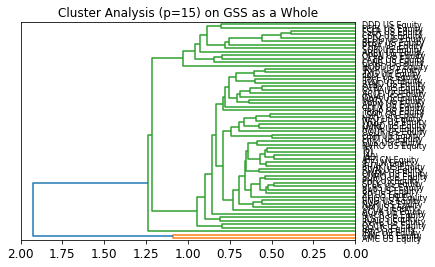

In [81]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(X)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
Z = plot_dendrogram(model, truncate_mode='level',labels=names,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])
ax = plt.gca()
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.title("Cluster Analysis (p=15) on GSS as a Whole")
plt.savefig(dirpath+"Total_Cluster.png") 


## Shorts

In [82]:
attrib

PK  Weights          STRATEGY
3     AAL US Equity  -0.0019       SHORT HEDGE
4    ACCD US Equity -0.00043       IPO&HD beta
5    ACVA US Equity -0.00044       IPO&HD beta
6     AEO US Equity -0.00093     DISCRETIONARY
7    AIRC US Equity  -0.0012       SHORT ALPHA
..              ...      ...               ...
110   WSM US Equity  -0.0016     DISCRETIONARY
111   WTW US Equity    0.021  LOW VOL, QUALITY
112    XP US Equity -0.00037   FAILURE MODEL A
113   ZEN US Equity  -0.0004   FAILURE MODEL A
114   ZZZ CN Equity -0.00096     DISCRETIONARY

[108 rows x 3 columns]

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Short Positions")

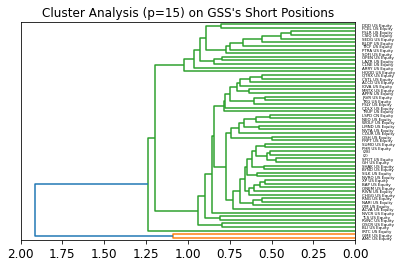

In [88]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(sX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
sZ = plot_dendrogram(model, truncate_mode='level',labels=snames,
                    p=15,leaf_font_size=6,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])

ax = plt.gca()
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=4)
plt.title("Cluster Analysis (p=15) on GSS\'s Short Positions")
plt.savefig(dirpath+"Short_Cluster.png") 



C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


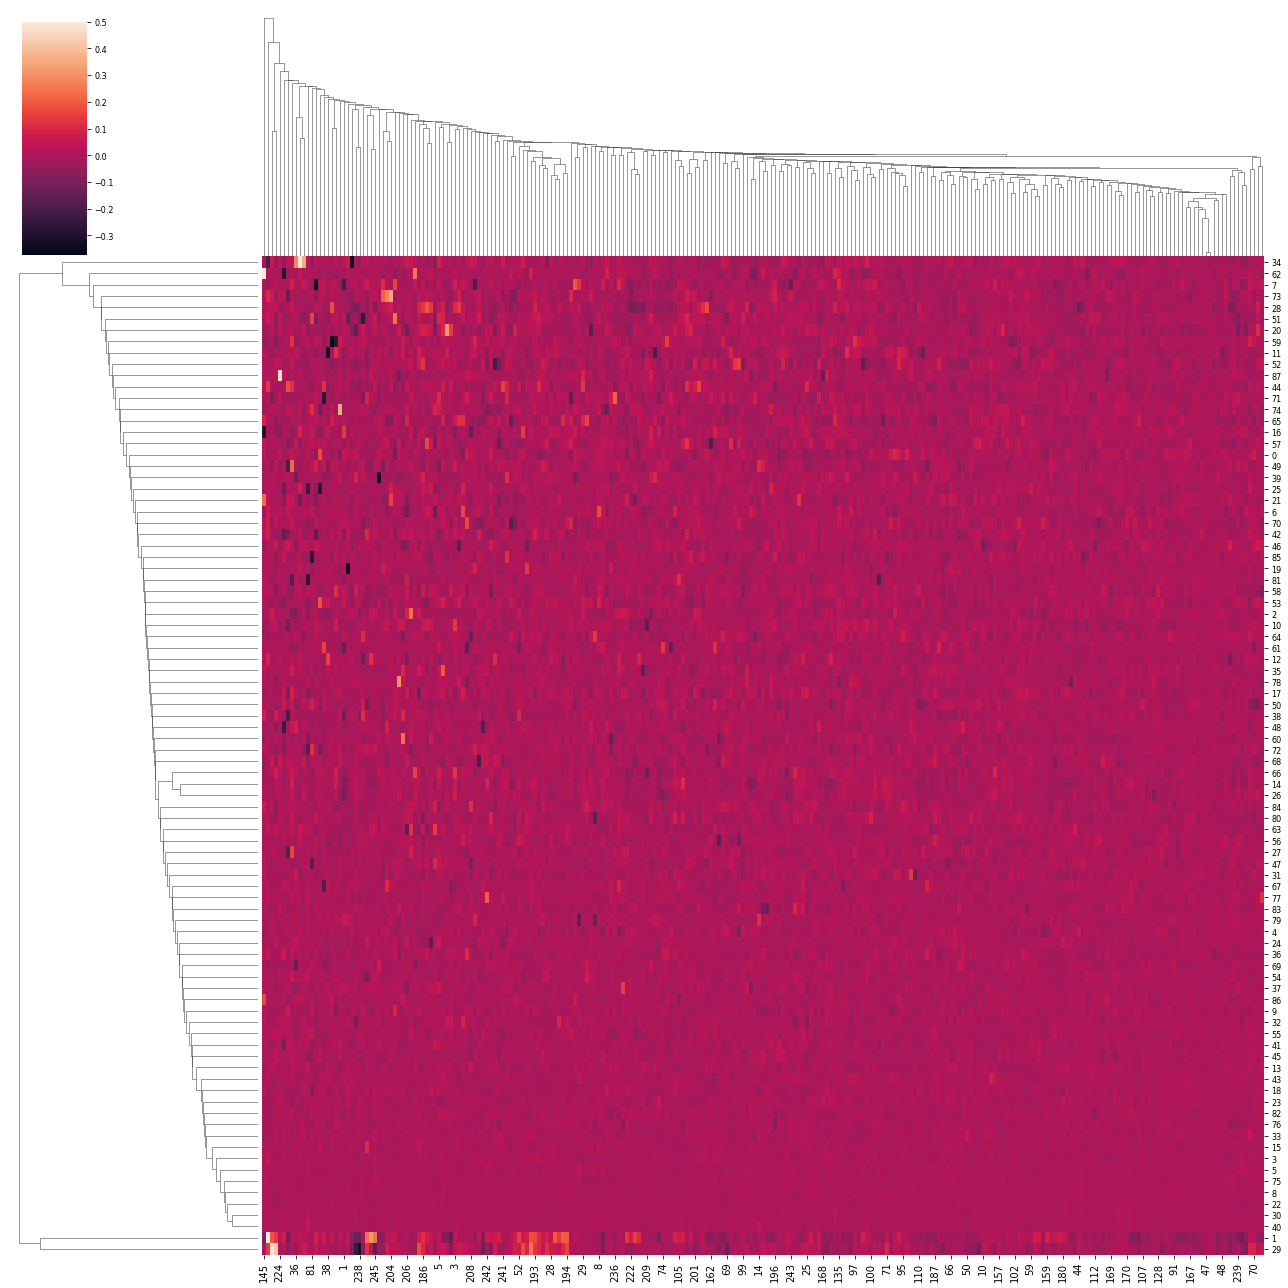

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(sX, figsize=(18,18),  yticklabels=True)

## Longs

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Long Positions")

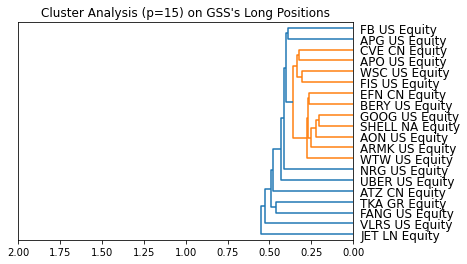

In [84]:
#model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(lX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
lZ = plot_dendrogram(model, truncate_mode='level',labels=lnames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
#plt.ytick(fontsize=6)
plt.rc('ytick', labelsize=8) 
#plt.xlabel('xlabel', fontsize=18)
plt.xlim([2, 0])
plt.title("Cluster Analysis (p=15) on GSS\'s Long Positions")
plt.savefig(dirpath+"Long_Cluster.png") 

In [55]:
model.children_.shape[0]
model.labels_

15

array([ 8, 10,  9, 15, 11,  7, 14, 12, 13,  5,  6,  4,  3,  1,  2,  0],
      dtype=int64)

In [56]:
#residuals['AC-15 (longs)'] 
model.labels_.T

array([ 8, 10,  9, 15, 11,  7, 14, 12, 13,  5,  6,  4,  3,  1,  2,  0],
      dtype=int64)

In [57]:
residuals['AC-15 (longs)'].sort_values()

KeyError: 'AC-15 (longs)'

# Regional Style Factors

In [5]:
#dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
dirpath = 'C:/Users/jknechtel/Documents/Equity Risk Modeling/'
ffile = 'FactorTSraw_hist.xlsx'
#tab = 'bbTickers'

In [6]:
usfactors = pd.read_excel(dirpath+ffile,sheet_name='USAM')
cafactors = pd.read_excel(dirpath+ffile,sheet_name='CAND')
wldfactors = pd.read_excel(dirpath+ffile,sheet_name='WRLD')
usfactors.set_index('date',inplace=True)
usfactors.sort_index(inplace=True) 
cafactors.set_index('date',inplace=True)
cafactors.sort_index(inplace=True) 
wldfactors.set_index('date',inplace=True)
wldfactors.sort_index(inplace=True) 
us_frets = usfactors.pct_change()
ca_frets = cafactors.pct_change()
wld_frets = wldfactors.pct_change()

In [7]:
sdate
date
#us_frets = us_frets.loc[sdate:]
#ca_frets = ca_frets.loc[sdate:]
#wld_frets = wld_frets.loc[sdate:]

'2021-03-23'

'2022-03-10'

In [8]:

us_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'US Factor Detailed Stats.xlsx')

In [9]:

ca_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'CA Factor Detailed Stats.xlsx')

In [10]:
wld_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'WLD Factor Detailed Stats.xlsx')

In [11]:
us_frets

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23             0.0010              0.0004          -0.0001   
2002-01-24             0.0015             -0.0011          -0.0027   
2002-01-25             0.0001              0.0005          -0.0011   
2002-01-28             0.0009              0.0002          -0.0028   
...                       ...                 ...              ...   
2022-03-03             0.0018             -0.0008          -0.0041   
2022-03-04             0.0016             -0.0014          -0.0010   
2022-03-07             0.0024              0.0005          -0.0002   
2022-03-08            -0.0006              0.0001          -0.0026   
2022-03-09             0.0000              0.0000           0.0000   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23            -0.0001              0.0012           0.0131   
2002-01-24            -0.0012              0.0020           0.0074   
2002-01-25            -0.0002              0.0002           0.0024   
2002-01-28            -0.0005             -0.0006           0.0005   
...                       ...                 ...              ...   
2022-03-03             0.0013             -0.0005          -0.0101   
2022-03-04             0.0007              0.0006          -0.0138   
2022-03-07            -0.0011             -0.0000          -0.0316   
2022-03-08            -0.0008             -0.0002          -0.0005   
2022-03-09             0.0000              0.0000           0.0000   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-22                NaN              NaN                NaN   
2002-01-23             0.0001           0.0021            -0.0002   
2002-01-24            -0.0045          -0.0003            -0.0019   
2002-01-25             0.0001          -0.0001             0.0002   
2002-01-28             0.0017           0.0007            -0.0004   
...                       ...              ...                ...   
2022-03-03             0.0038           0.0022             0.0018   
2022-03-04             0.0050           0.0011             0.0006   
2022-03-07            -0.0032          -0.0010             0.0009   
2022-03-08            -0.0029          -0.0016            -0.0036   
2022-03-09             0.0000           0.0000             0.0000   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-22            NaN                NaN             NaN   
2002-01-23        -0.0026            -0.0027          0.0009   
2002-01-24        -0.0014            -0.0008         -0.0018   
2002-01-25        -0.0006            -0.0011          0.0003   
2002-01-28        -0.0001             0.0008          0.0017   
...                   ...                ...             ...   
2022-03-03        -0.0003             0.0031          0.0024   
2022-03-04        -0.0010             0.0024         -0.0009   
2022-03-07        -0.0019             0.0062         -0.0025   
2022-03-08        -0.0002            -0.0013          0.0033   
2022-03-09         0.0000             0.0000          0.0000   

            FMI_USAM_VOLATILITY  
date                             
2002-01-22                  NaN  
2002-01-23               0.0070  
2002-01-24               0.0058  
2002-01-25              -0.0020  
2002-01-28              -0.0008  
...                         ...  
2022-03-03              -0.0106  
2022-03-04              -0.0133  
2022-03-07              -0.0118  
2022-03-08               0.0118  
2022-03-09               0.0000  

[5062 rows x 13 

In [12]:
cs.insertTable(us_frets.loc[sdate:],"EQ_USFactorIndices")
cs.insertTable(ca_frets.loc[sdate:],"EQ_CAFactorIndices")
cs.insertTable(wld_frets.loc[sdate:],"EQ_WLDFactorIndices")

In [13]:
pd.options.display.float_format = "{:,.2}".format  

uscorr = us_frets.loc[sdate:].corr()
uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Correlations.xlsx')

In [14]:
pd.options.display.float_format = "{:,.2}".format  

cacorr = ca_frets.loc[sdate:].corr()
cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Correlations.xlsx')


In [15]:
pd.options.display.float_format = "{:,.2}".format  

wldcorr = wld_frets.loc[sdate:].corr()
wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Correlations.xlsx')

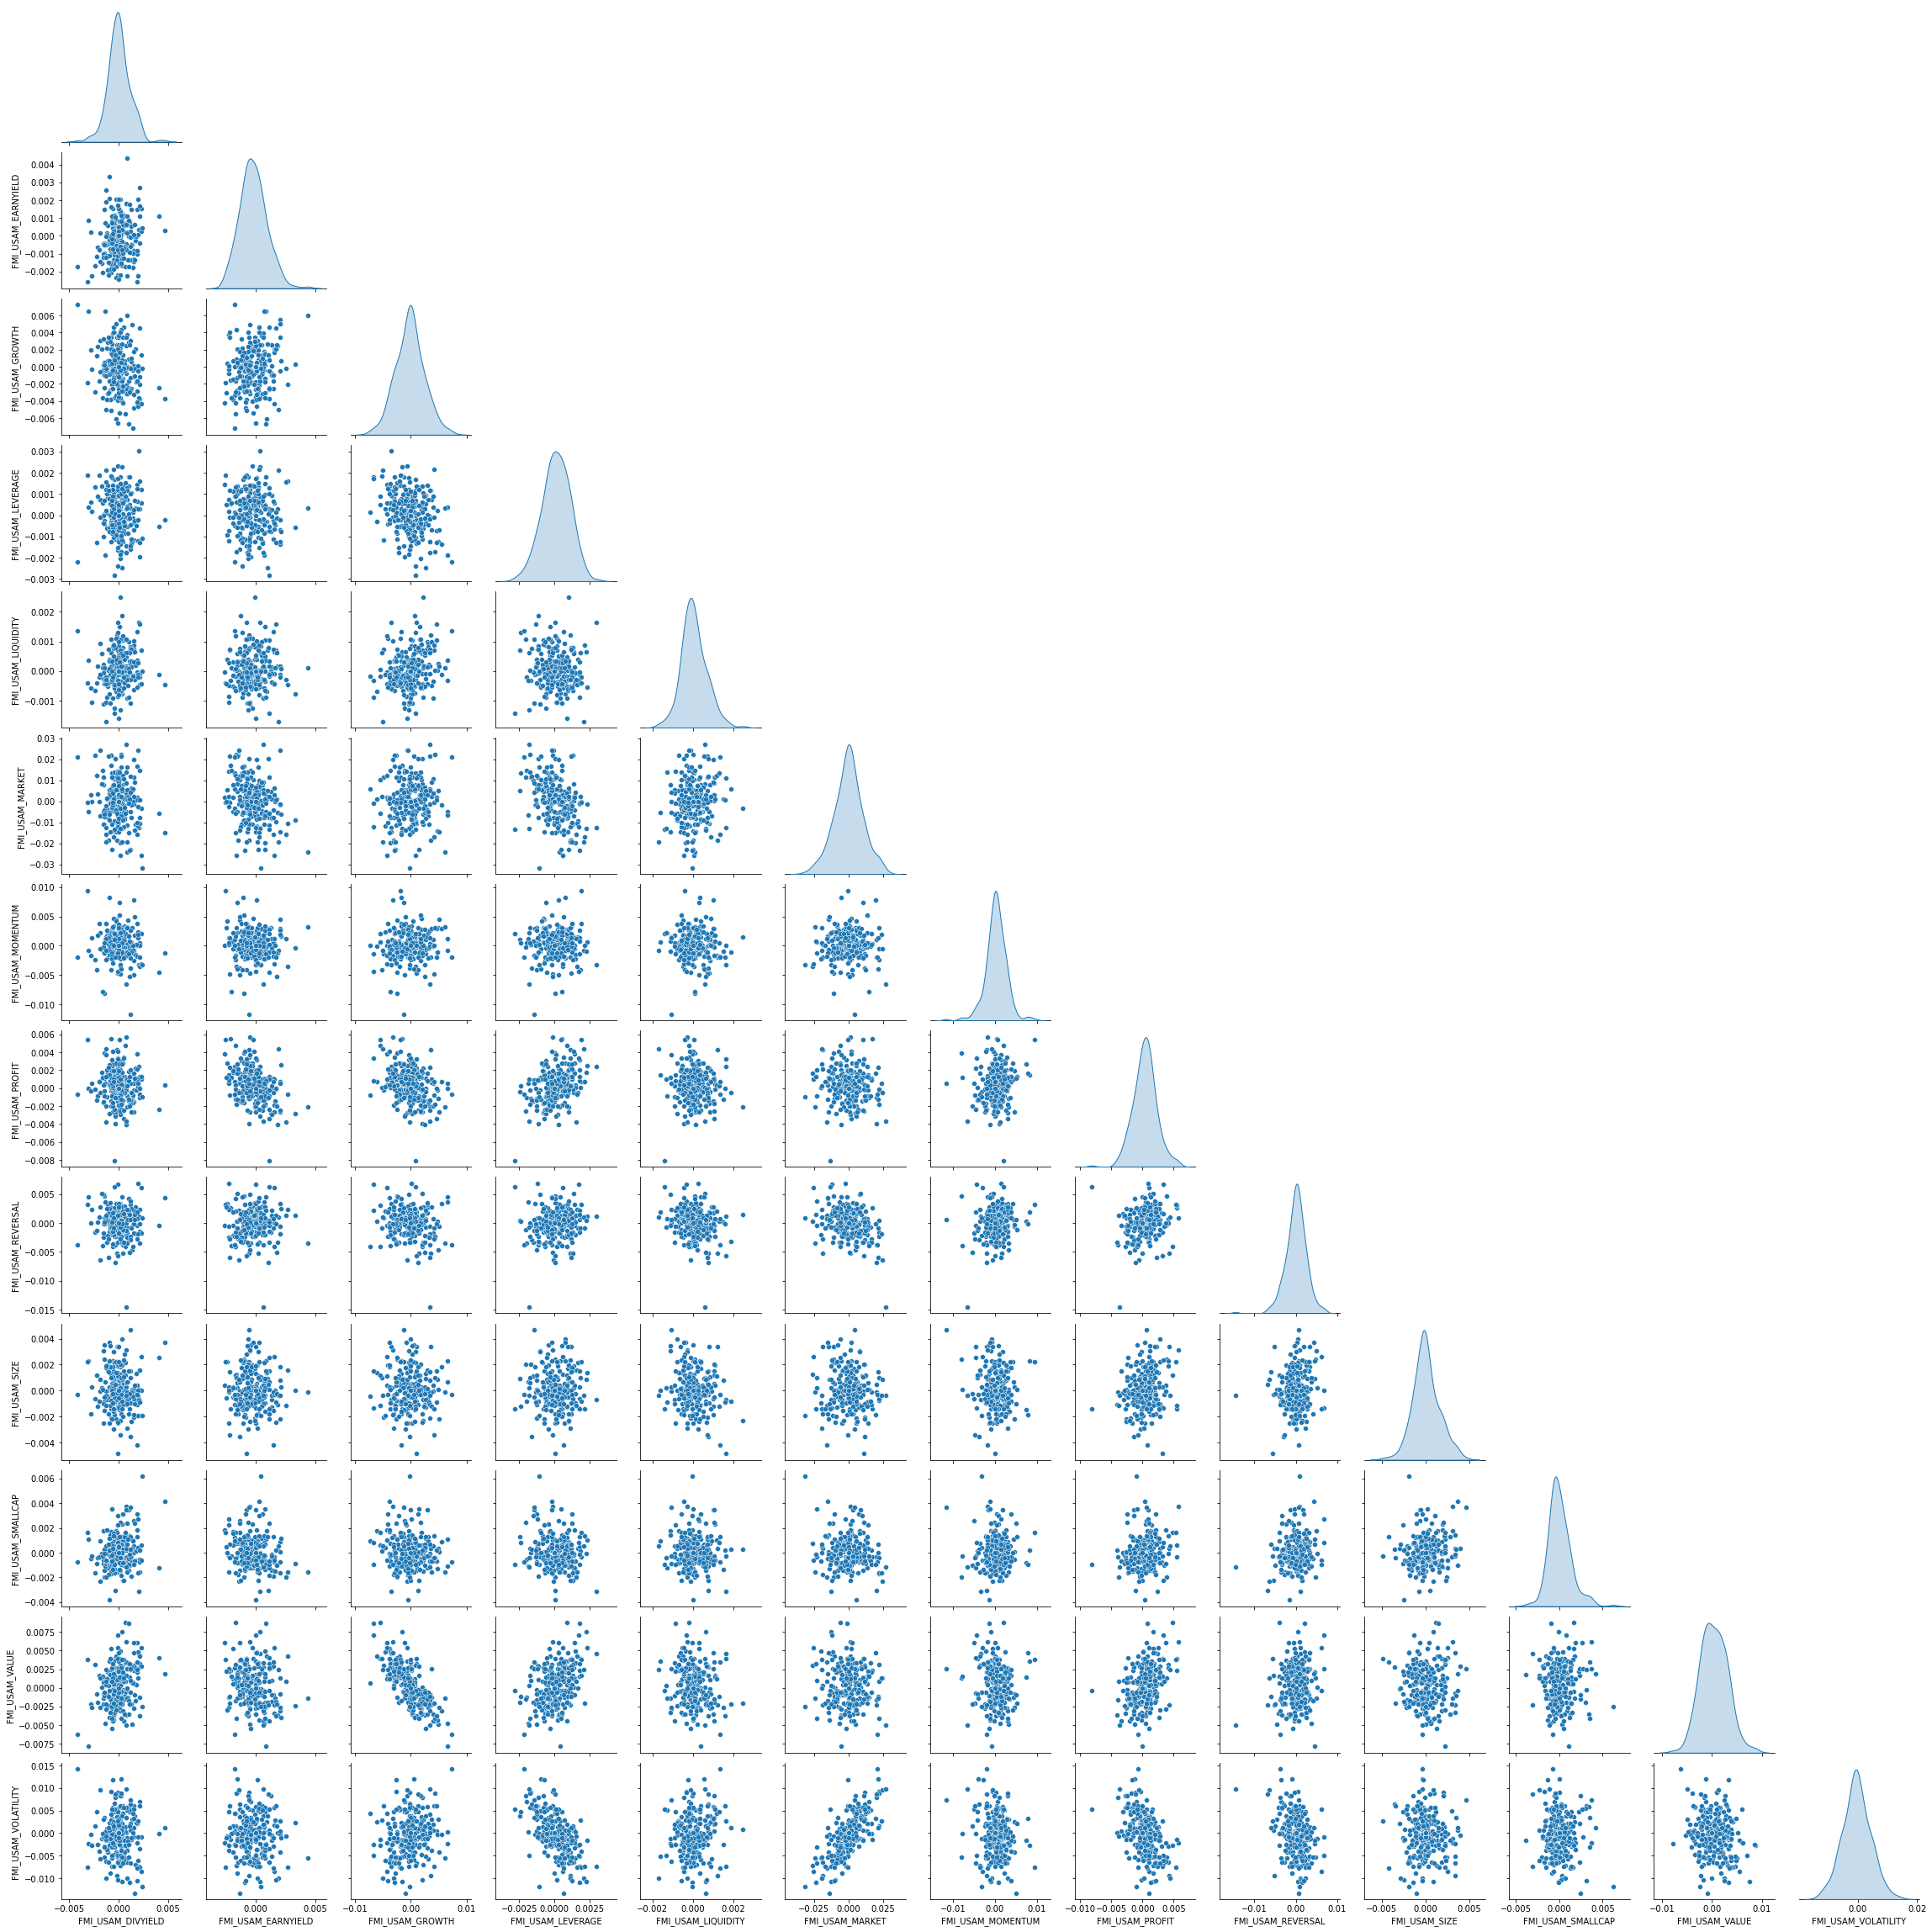

In [16]:

sns_plot = sns.pairplot(us_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"USStyleFactors_PairPlot.png") 

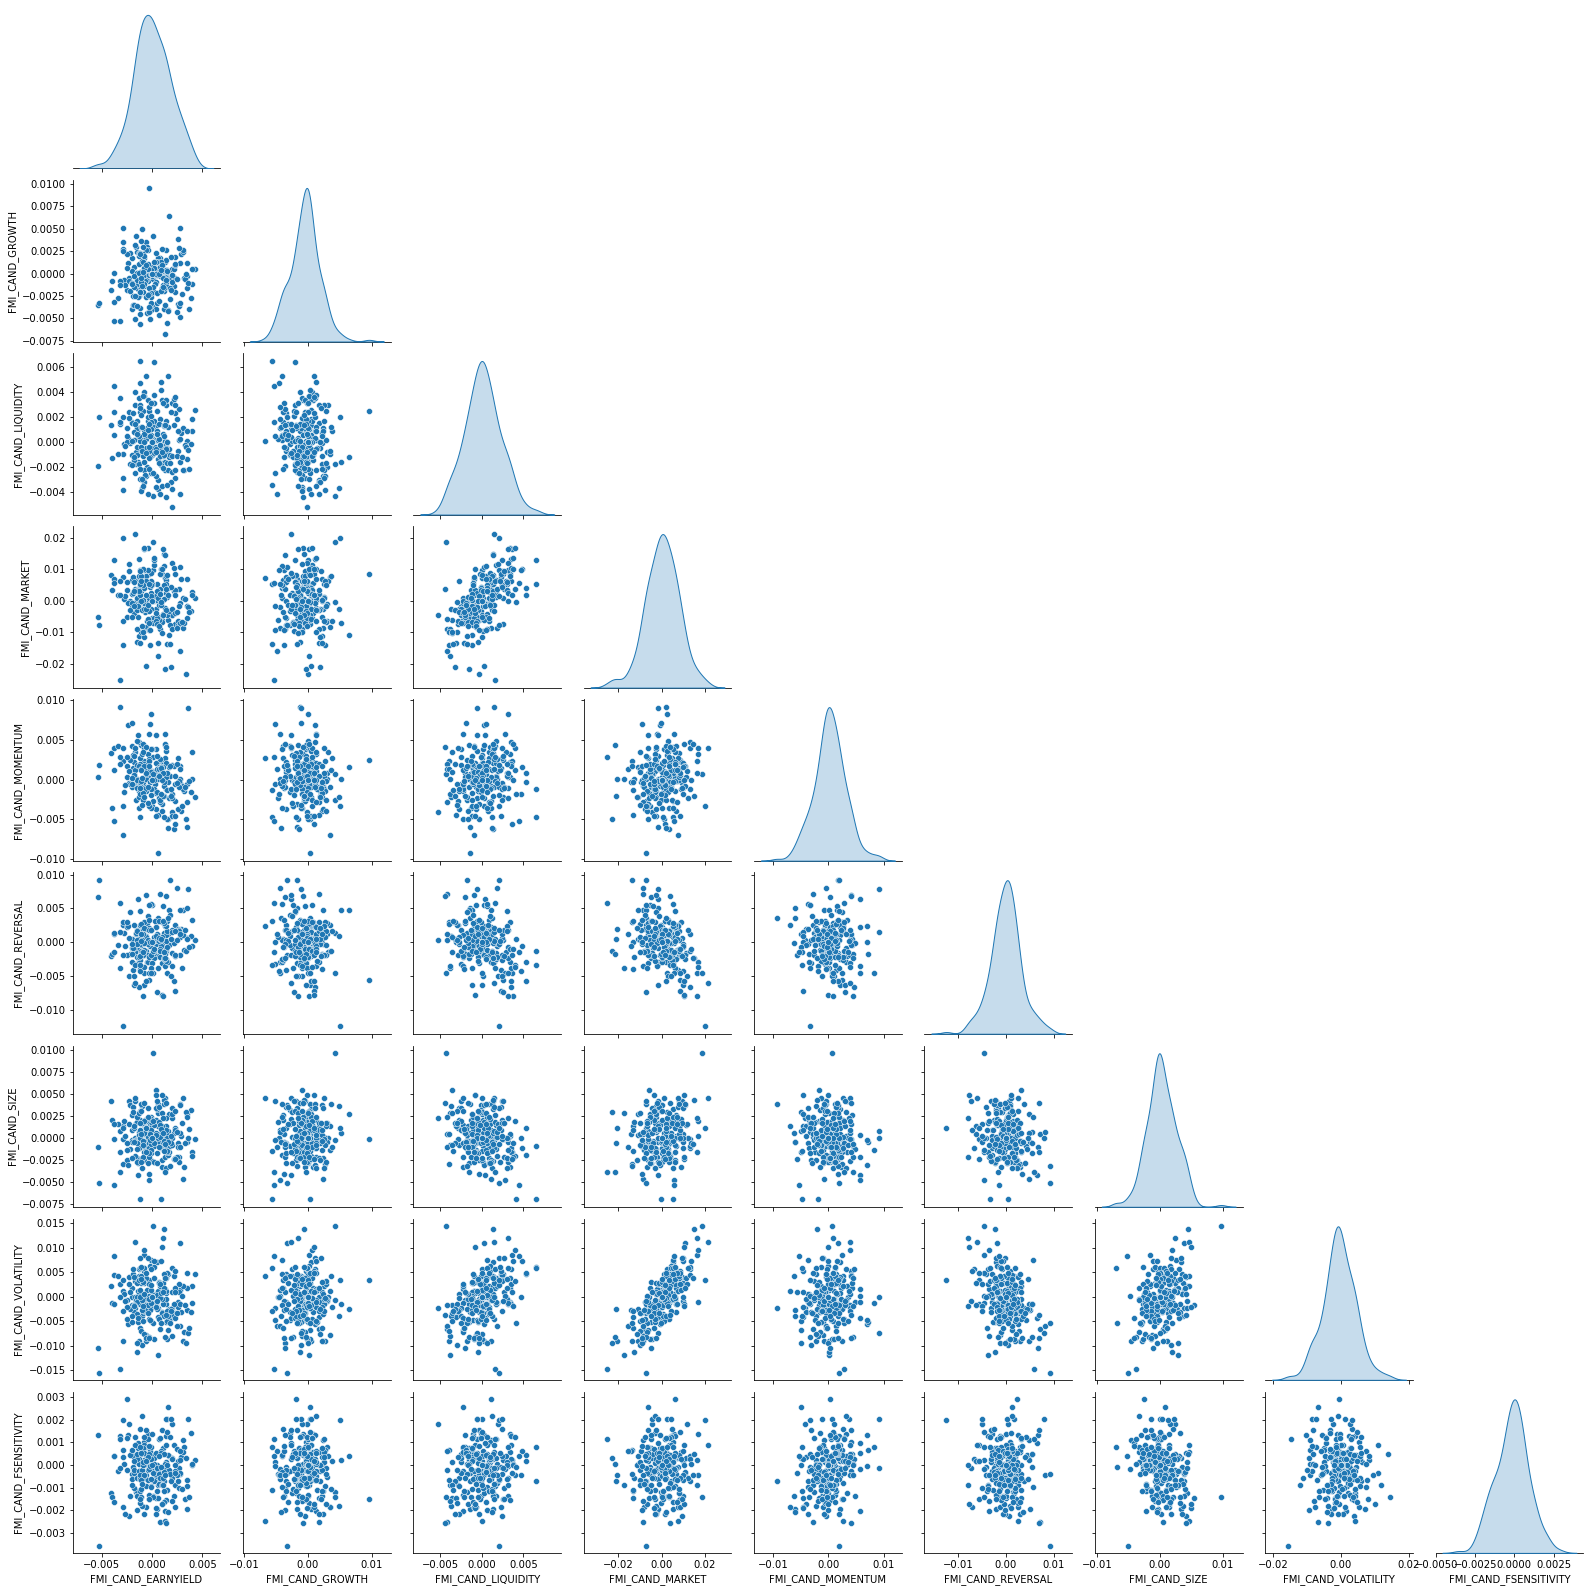

In [17]:
sns_plot = sns.pairplot(ca_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"CAStyleFactors_PairPlot.png") 

In [23]:
dirpath

'C:/Users/jknechtel/Documents/Equity Risk Modeling/'

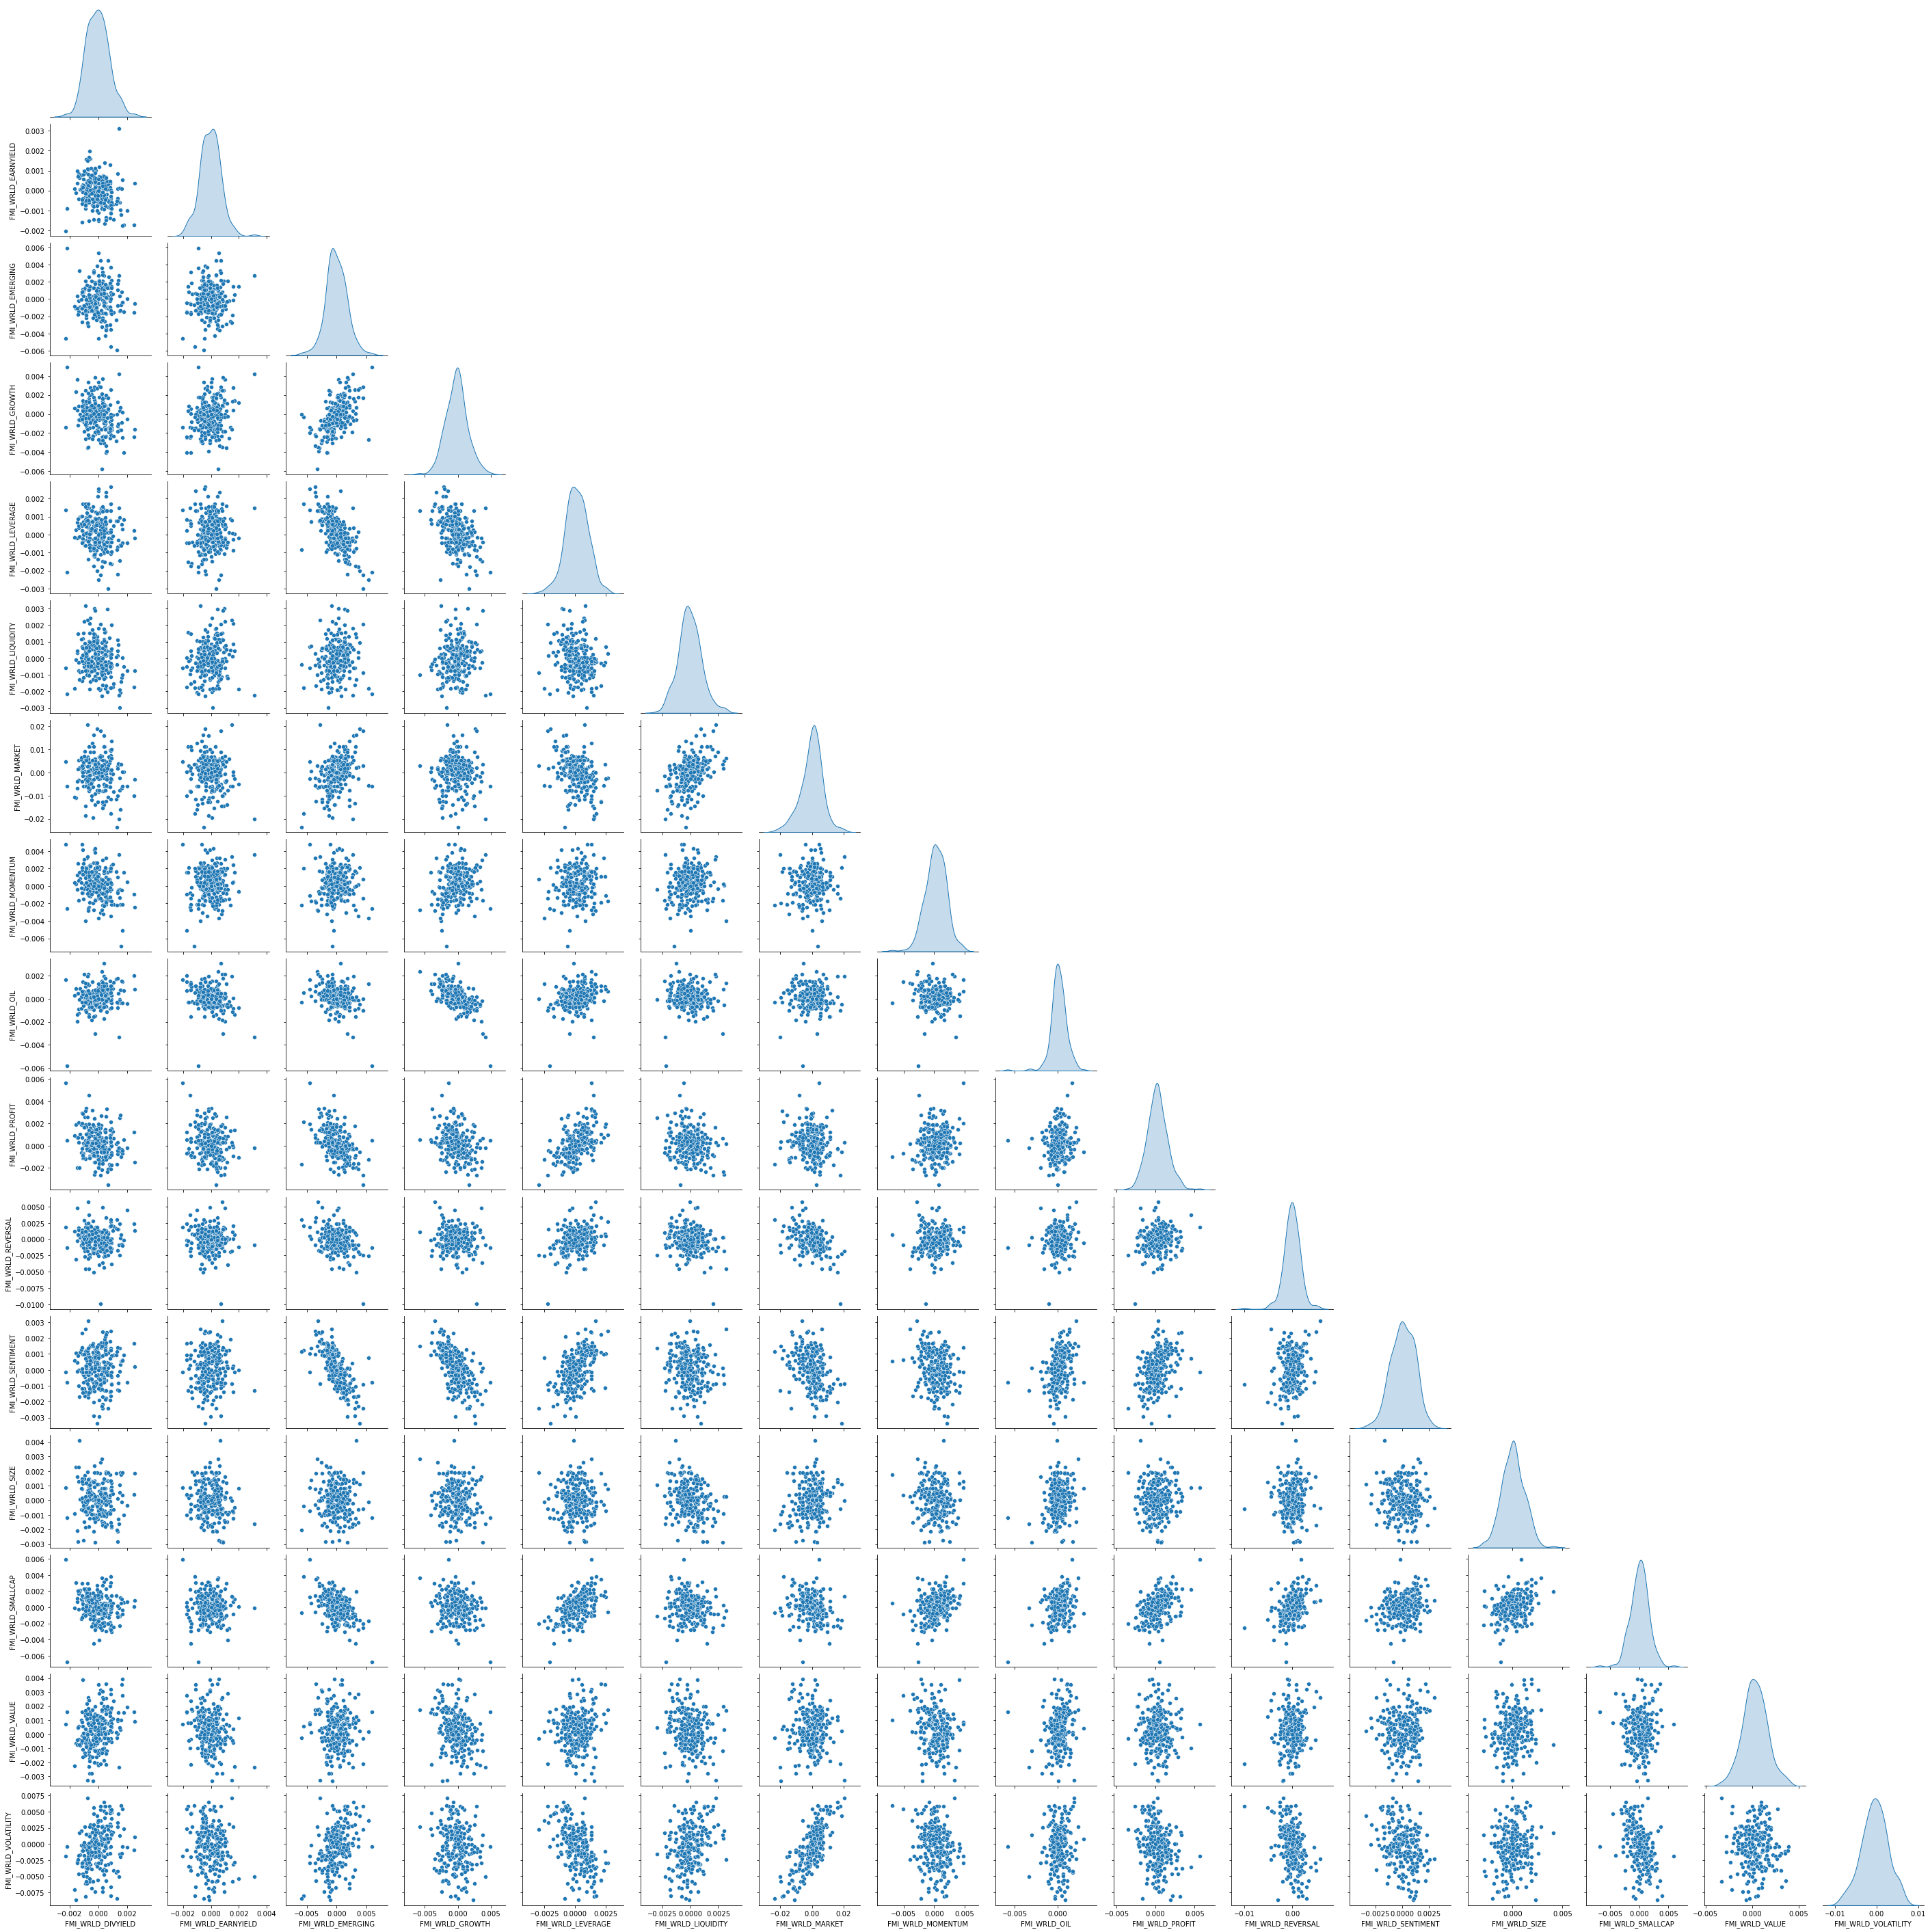

In [19]:
sns_plot = sns.pairplot(wld_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"WldStyleFactors_PairPlot.png") 

In [22]:
mri.SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Returns.xlsx')
mri.SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Returns.xlsx')
mri.SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Returns.xlsx')

In [ ]:
usfactors.columns.str.lstrip('FMI_USAM')

## Factor Turbulence

In [21]:
import MacroRiskIndictators as mri

In [33]:
returns = us_frets.join(wld_frets).join(ca_frets)

In [34]:
corr = returns.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='RdBu').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_16768/1955355093.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='RdBu').set_precision(2)


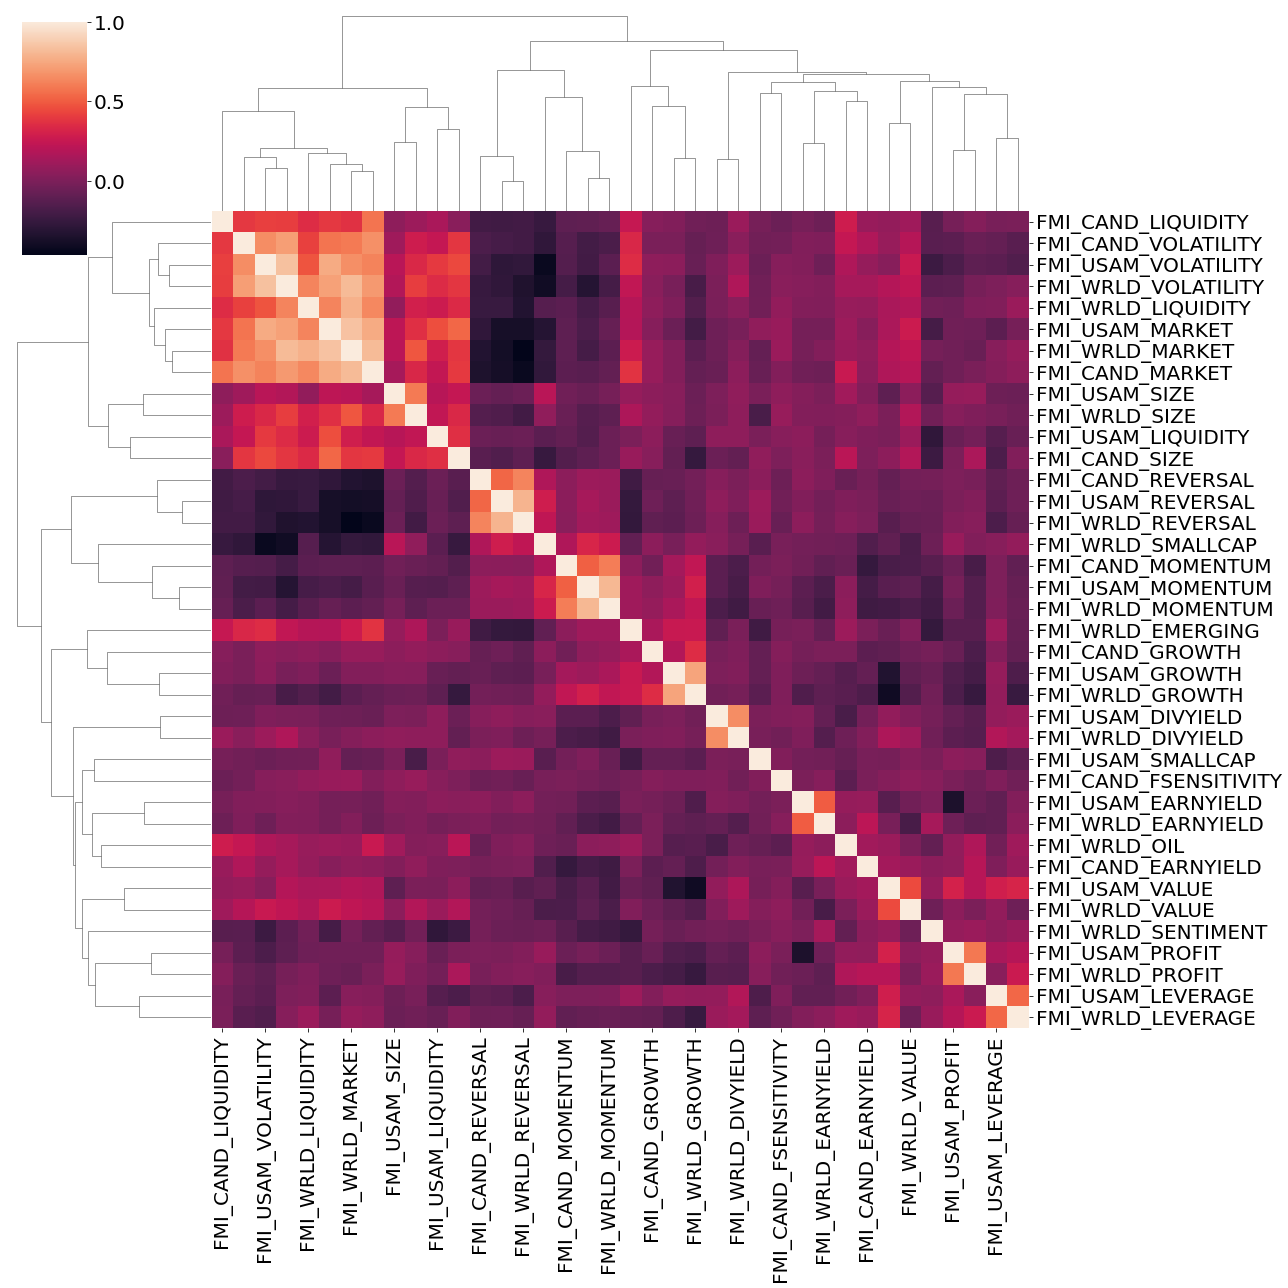

In [35]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.clustermap(returns.corr(), figsize=(18,18),  yticklabels=True).savefig(dirpath+'Alladin Factor Cluster Map.png')

In [36]:
us_frets.index.name = 'Dates'
us_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(us_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(us_frets, window_size=250)

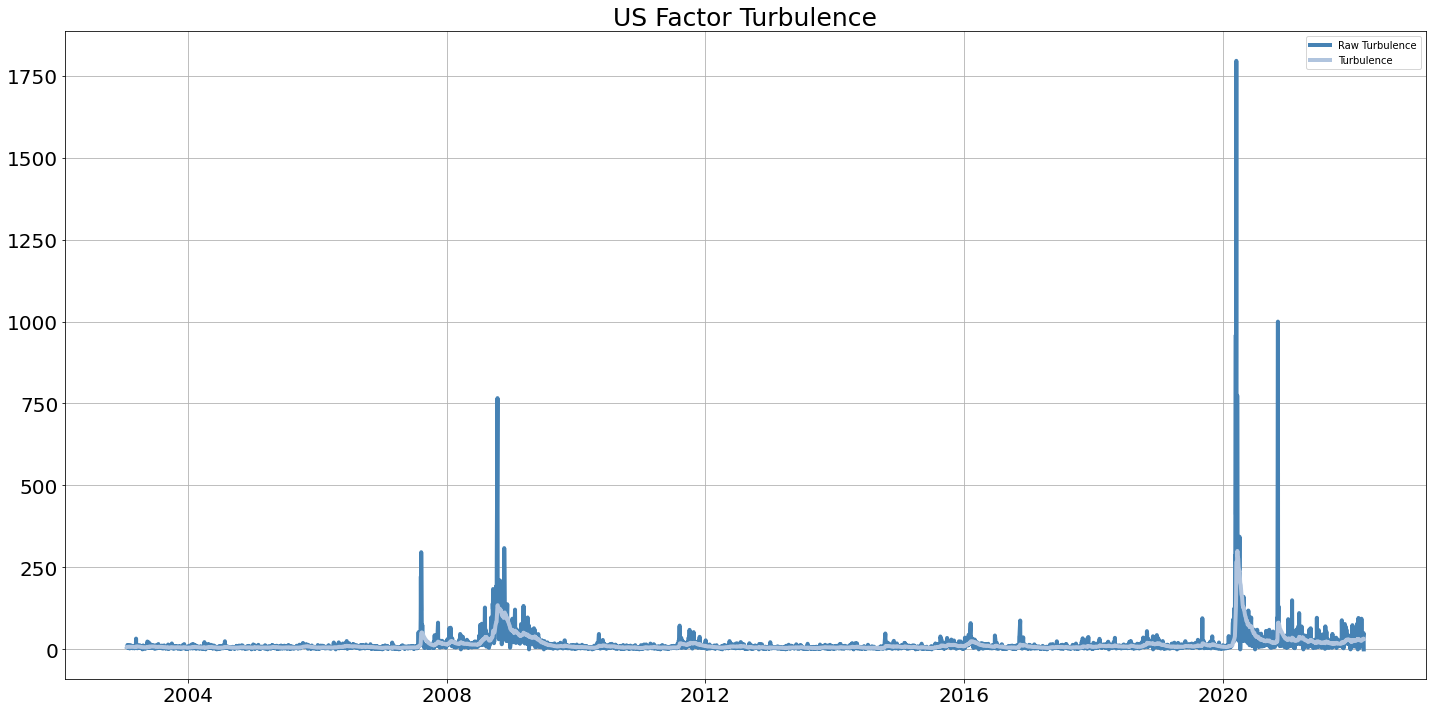

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Turbulence'}>)

In [37]:
utils.StandardLinePlot(turbulence.set_index('Dates'),"US Factor Turbulence",save=True)

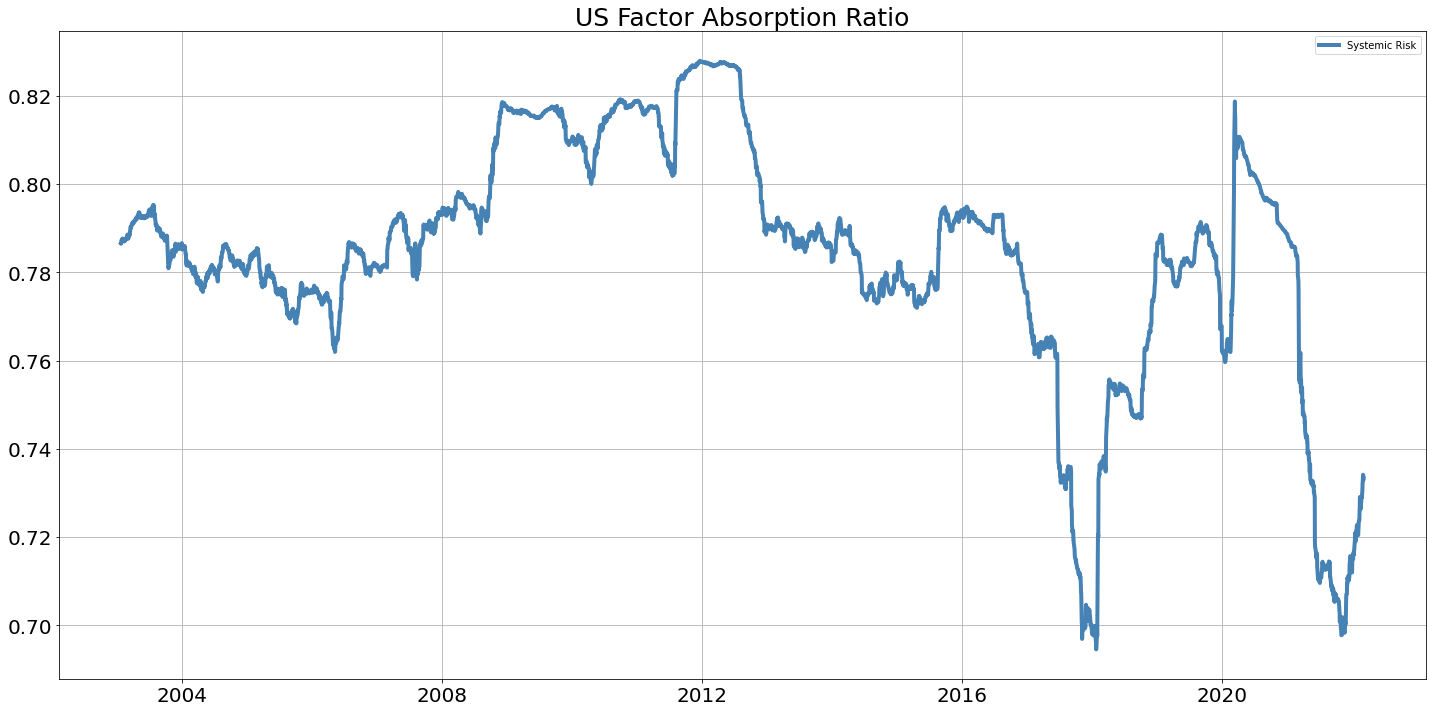

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Absorption Ratio'}>)

In [38]:

utils.StandardLinePlot(absorbRatio.set_index('Dates'),"US Factor Absorption Ratio",save=True)

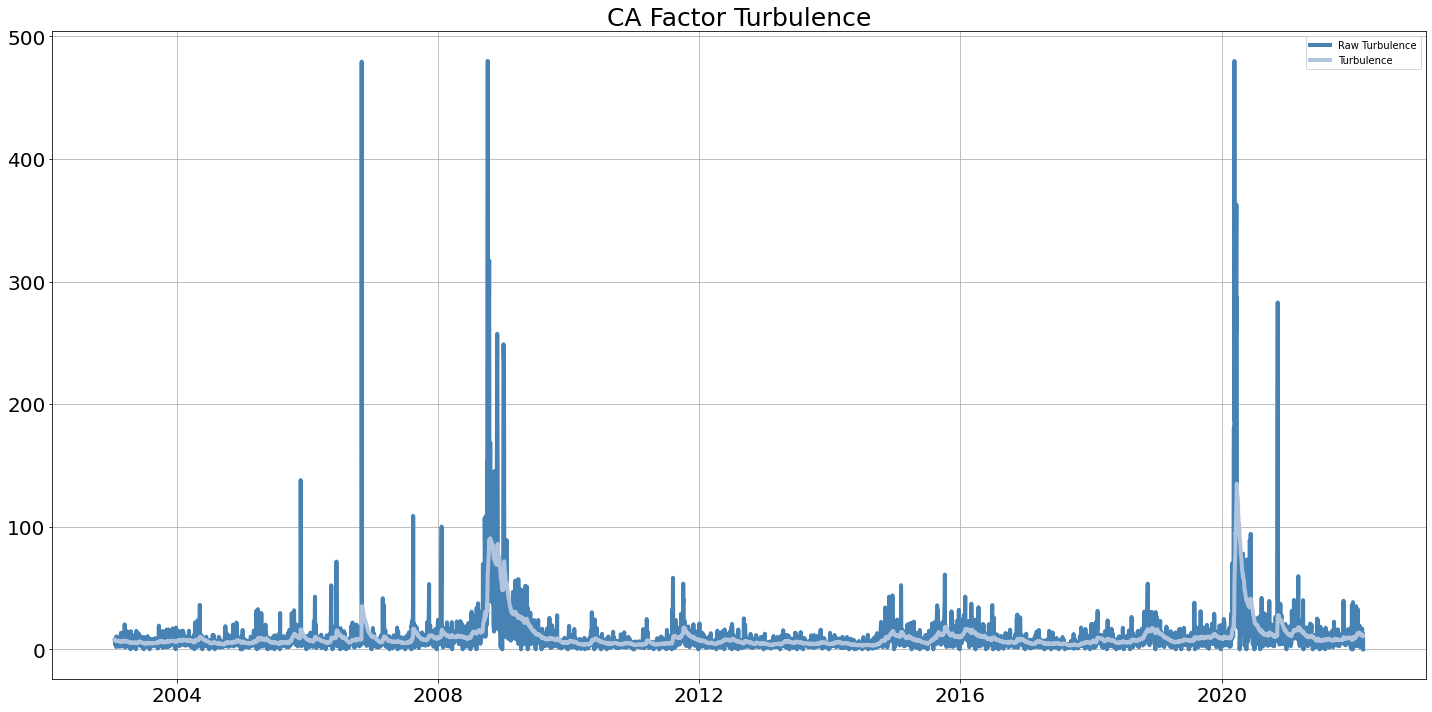

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Turbulence'}>)

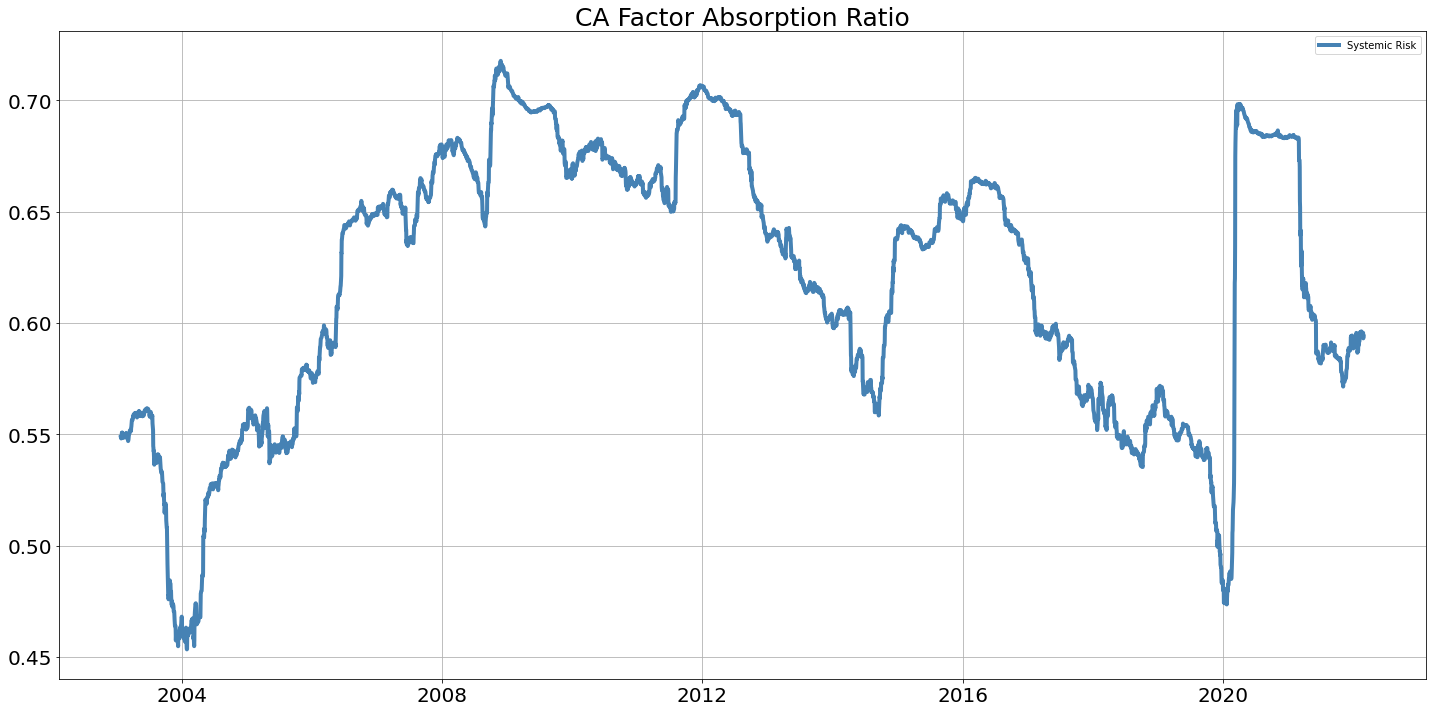

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Absorption Ratio'}>)

In [83]:
ca_frets.index.name = 'Dates'
ca_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(ca_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(ca_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"CA Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"CA Factor Absorption Ratio",save=True)

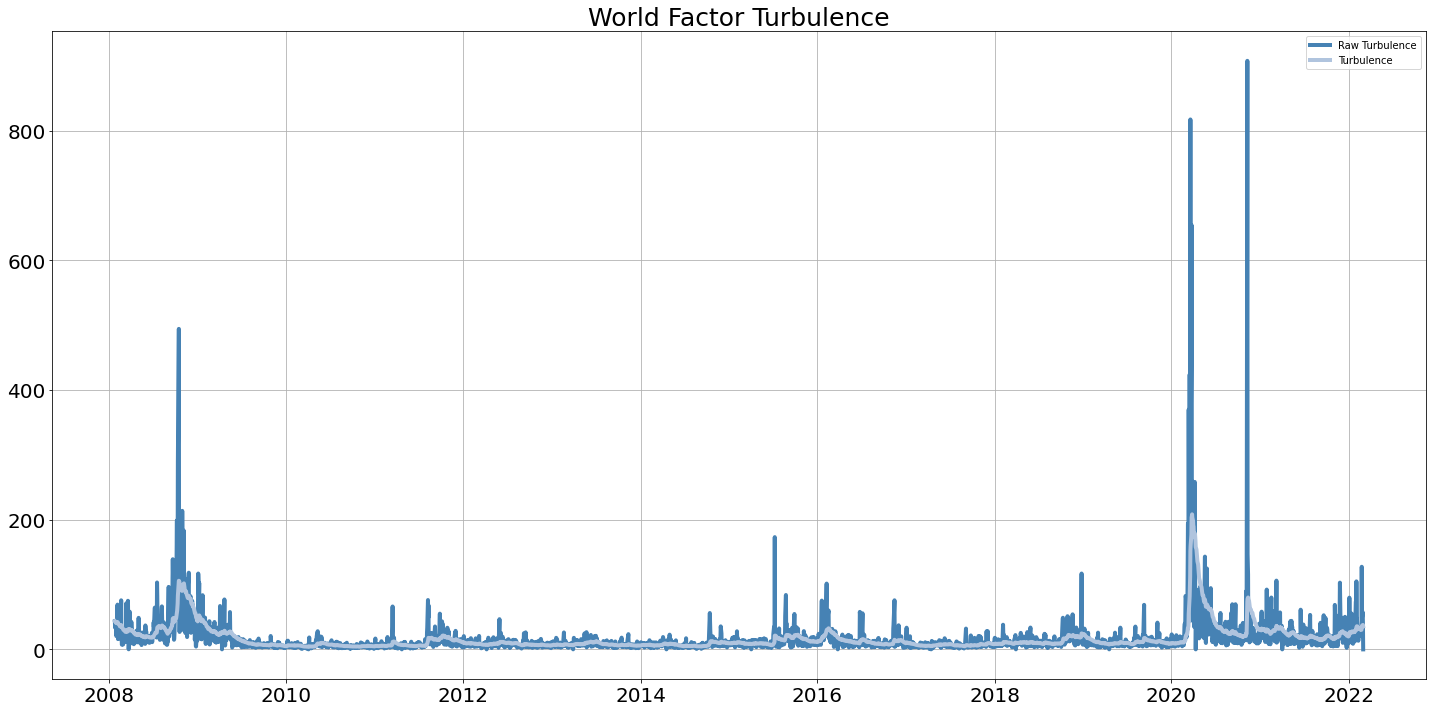

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Turbulence'}>)

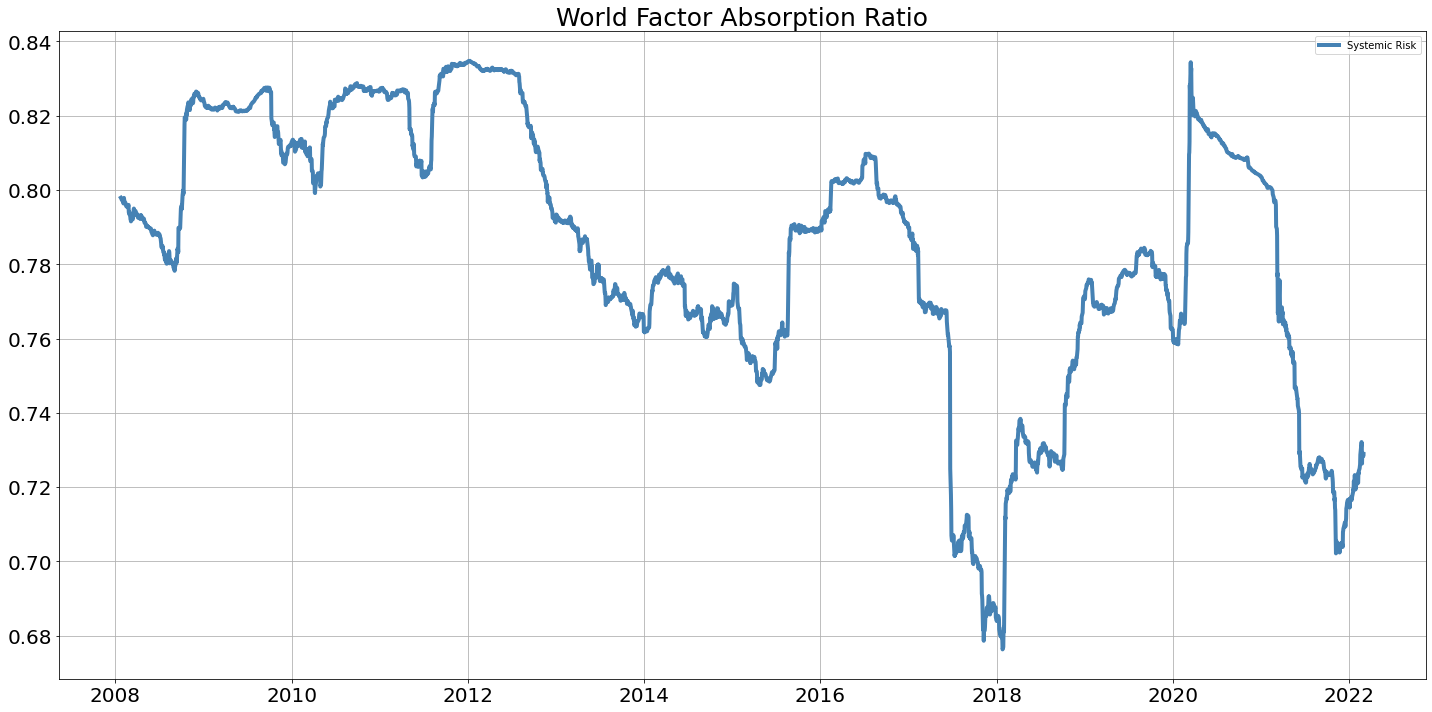

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Absorption Ratio'}>)

In [84]:
wld_frets.index.name = 'Dates'
wld_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(wld_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(wld_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"World Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"World Factor Absorption Ratio",save=True)

## Factor Graphs

In [90]:
us_frets.set_index('Dates',inplace=True)
us_frets.dropna(how='all',inplace=True)

In [89]:
us_frets

Dates  FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
0    2002-01-22                NaN                 NaN              NaN   
1    2002-01-23            0.00099             0.00043         -0.00012   
2    2002-01-24             0.0015             -0.0011          -0.0027   
3    2002-01-25            0.00013             0.00053          -0.0011   
4    2002-01-28            0.00092             0.00021          -0.0028   
...         ...                ...                 ...              ...   
5052 2022-02-24            -0.0041             -0.0017           0.0073   
5053 2022-02-25              0.002              0.0021         -0.00051   
5054 2022-02-28             0.0021              0.0017           0.0046   
5055 2022-03-01           -0.00048             0.00027           0.0041   
5056 2022-03-02                0.0                 0.0              0.0   

      FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
0                   NaN                 NaN              NaN   
1              -9.5e-05              0.0012            0.013   
2               -0.0012               0.002           0.0074   
3               -0.0002             0.00019           0.0024   
4              -0.00046            -0.00058           0.0005   
...                 ...                 ...              ...   
5052            -0.0022              0.0014            0.021   
5053           -0.00021            -0.00019            0.024   
5054            -0.0013              0.0016           0.0005   
5055             0.0021             0.00088           -0.017   
5056                0.0                 0.0              0.0   

      FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  FMI_USAM_SIZE  \
0                   NaN              NaN                NaN            NaN   
1               7.3e-05           0.0021           -0.00016        -0.0026   
2               -0.0045         -0.00027            -0.0019        -0.0014   
3               0.00012         -0.00014            0.00022        -0.0006   
4                0.0017          0.00067           -0.00041       -0.00011   
...                 ...              ...                ...            ...   
5052             -0.002         -0.00066            -0.0037       -0.00034   
5053             0.0019           0.0005            -0.0019       -0.00036   
5054            -0.0019         -1.7e-05           -0.00019       -0.00092   
5055            5.7e-05          0.00069           -0.00095        -0.0014   
5056                0.0              0.0                0.0            0.0   

      FMI_USAM_SMALLCAP  FMI_USAM_VALUE  FMI_USAM_VOLATILITY  
0                   NaN             NaN                  NaN  
1               -0.0027         0.00088                0.007  
2              -0.00077         -0.0018               0.0058  
3               -0.0011         0.00028               -0.002  
4               0.00085          0.0017             -0.00079  
...                 ...             ...                  ...  
5052           -0.00072         -0.0063                0.014  
5053            -0.0016          0.0013               0.0027  
5054            0.00018         -0.0038               0.0061  
5055             0.0014         -0.0021              -0.0074  
5056                0.0             0.0                  0.0  

[5057 rows x 14 columns]

In [86]:
usfactors

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
Dates                                                                
2002-01-22               0.99                 1.1              0.9   
2002-01-23               0.99                 1.1              0.9   
2002-01-24                1.0                 1.1              0.9   
2002-01-25                1.0                 1.1              0.9   
2002-01-28                1.0                 1.1              0.9   
...                       ...                 ...              ...   
2022-02-24               0.91                0.98             0.84   
2022-02-25               0.91                0.98             0.84   
2022-02-28               0.91                0.98             0.85   
2022-03-01               0.91                0.98             0.85   
2022-03-02               0.91                0.98             0.85   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
Dates                                                                
2002-01-22                1.0                0.97              2.7   
2002-01-23                1.0                0.97              2.7   
2002-01-24                1.0                0.97              2.8   
2002-01-25                1.0                0.97              2.8   
2002-01-28                1.0                0.97              2.8   
...                       ...                 ...              ...   
2022-02-24                1.0                 1.0          2.4e+01   
2022-02-25                1.0                 1.0          2.5e+01   
2022-02-28                1.0                 1.0          2.5e+01   
2022-03-01                1.0                 1.0          2.5e+01   
2022-03-02                1.0                 1.0          2.5e+01   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
Dates                                                               
2002-01-22                1.4              1.2               0.51   
2002-01-23                1.4              1.2               0.51   
2002-01-24                1.4              1.2               0.51   
2002-01-25                1.4              1.2               0.51   
2002-01-28                1.4              1.2               0.51   
...                       ...              ...                ...   
2022-02-24                1.6              1.7               0.26   
2022-02-25                1.6              1.7               0.26   
2022-02-28                1.6              1.7               0.26   
2022-03-01                1.6              1.7               0.26   
2022-03-02                1.6              1.7               0.26   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
Dates                                                          
2002-01-22           0.92                1.1             1.2   
2002-01-23           0.92                1.1             1.2   
2002-01-24           0.92                1.1             1.2   
2002-01-25           0.92                1.1             1.2   
2002-01-28           0.92                1.1             1.2   
...                   ...                ...             ...   
2022-02-24           0.83                1.1             1.6   
2022-02-25           0.83                1.1             1.6   
2022-02-28           0.83                1.1             1.6   
2022-03-01           0.83                1.1             1.6   
2022-03-02           0.83                1.1             1.6   

            FMI_USAM_VOLATILITY  
Dates                            
2002-01-22                  1.3  
2002-01-23                  1.3  
2002-01-24                  1.3  
2002-01-25                  1.3  
2002-01-28                  1.3  
...                         ...  
2022-02-24                  1.7  
2022-02-25                  1.7  
2022-02-28                  1.7  
2022-03-01                  1.7  
2022-03-02                  1.7  

[5057 rows x 13 

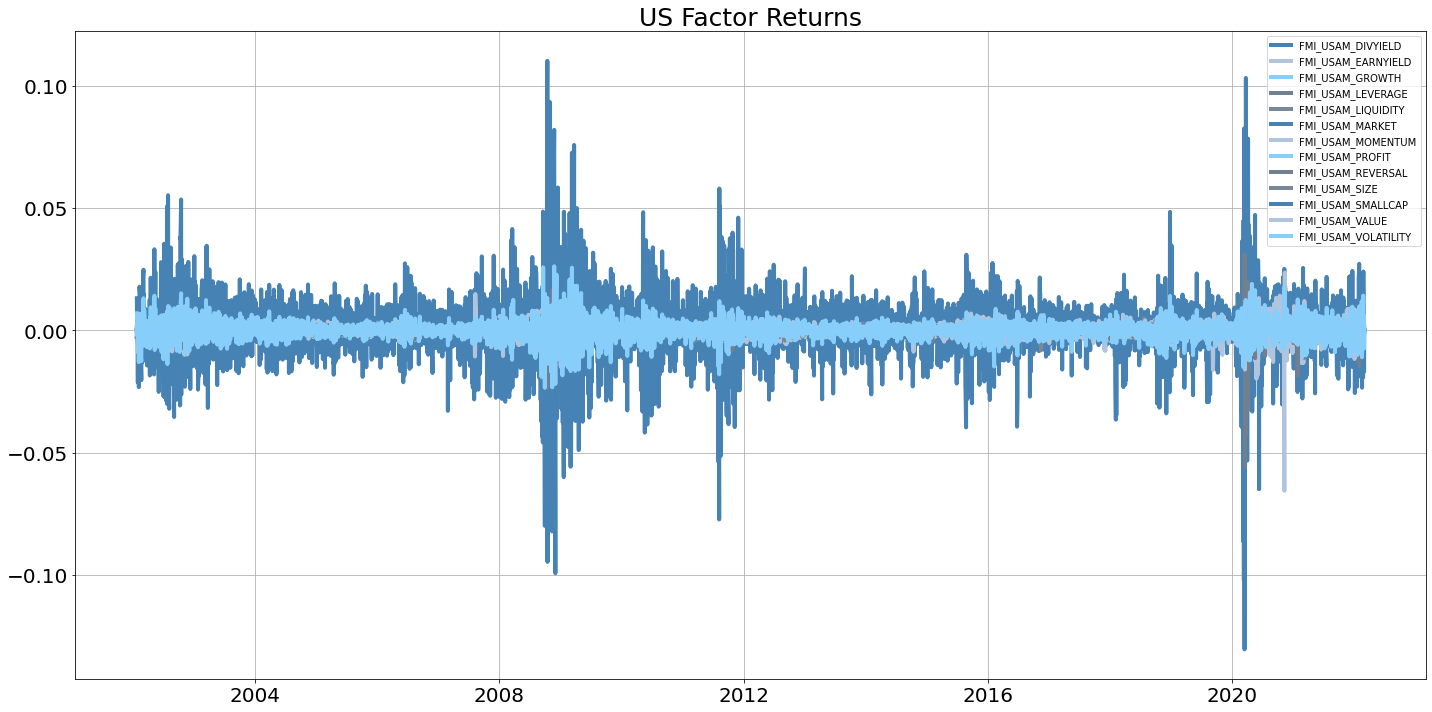

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Returns'}>)

In [91]:

utils.StandardLinePlot(us_frets,"US Factor Returns",save=True)

In [25]:
def MultiLinePlot(graph_data,plot_title,include_lines="",win=120,save=False):
    '''
    Standardized Line Plot with "onbrand" color scheme/theme
    Arguments:
        graph_data: needs to be a DF currently
        plot_title: string
        save: optional, names the file the plot_title
    Returns:
        fig, ax: for further customization if needed
    '''
    fig, ax = plt.subplots(figsize=(20,10))
    parameters = {'xtick.labelsize': 20,'ytick.labelsize': 20,'figure.titlesize': 25}
    plt.rcParams.update(parameters)
    
    if include_lines == 'hist':
        graph_data['Historical average'] = graph_data.expanding(min_periods=12).mean()
        # '#4682b4': steelblue  ,'#b0c4de': lightsteelblue ,'#87cefa':lightskyblue
        # '#708090': slategrey  ,'#778899': lightslategrey ,'#d3d3d3':lightgrey
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    elif include_lines == 'move':
        graph_data[[graph_data.columns[0]]]
        graph_data['Moving {} average'.format(win)] = graph_data[[graph_data.columns[0]]].rolling(win).mean()
        graph_data['-std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()-graph_data[[graph_data.columns[0]]].rolling(win).std()
        graph_data['+std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()+graph_data[[graph_data.columns[0]]].rolling(win).std()
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#b0c4de','#b0c4de']))
    #else:
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    
    #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa']))
    ax.plot(graph_data,linewidth=4)
    plt.grid()
    plt.title(plot_title,fontsize=25)
    try:
        plt.legend(graph_data.columns.values) 
    except:
        print("not a dataframe")
    plt.tight_layout()
    plt.show()
    if save:
        fig.savefig(plot_title+'.png',format="png")
    return fig, ax

In [27]:
import matplotlib.pyplot as plt

In [28]:
sdate

'2021-03-23'

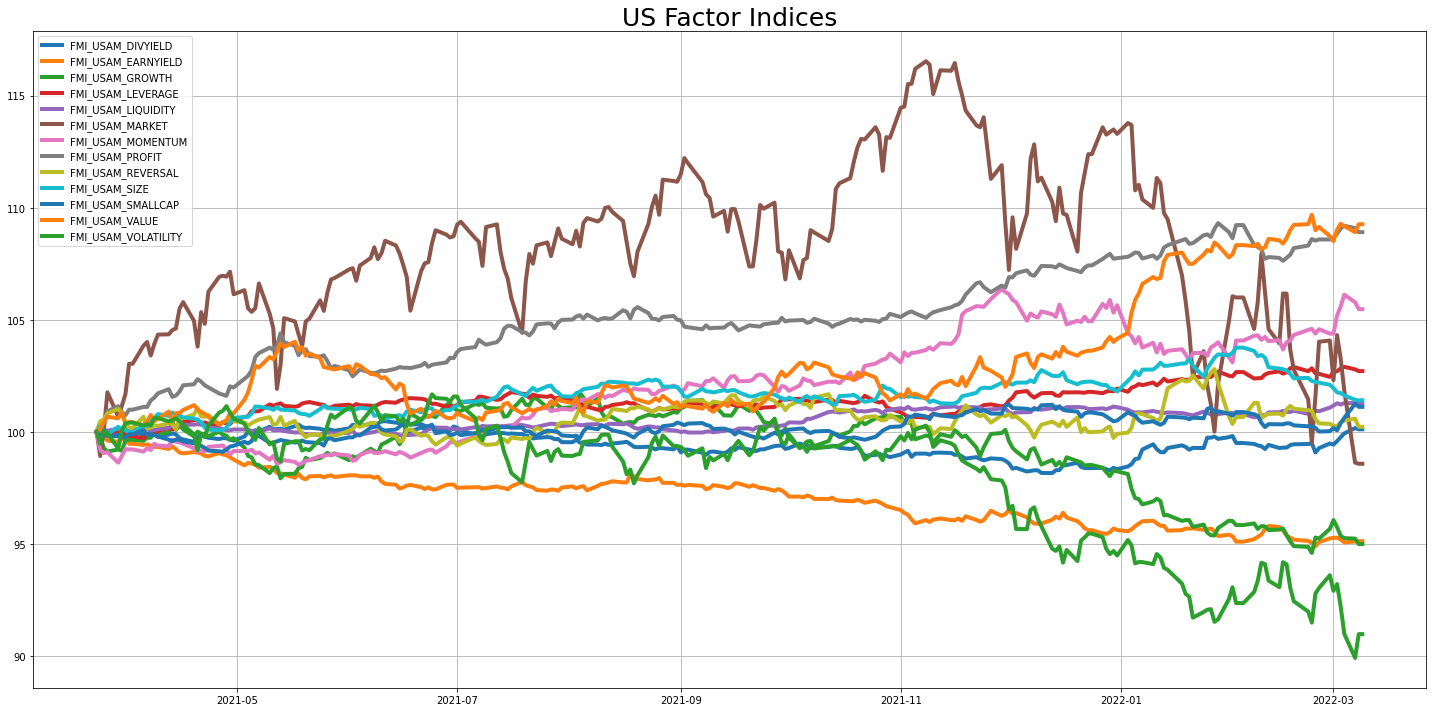

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Indices'}>)

In [29]:

MultiLinePlot(100*usfactors.loc[sdate:]/usfactors.loc[sdate],"US Factor Indices",save=True)

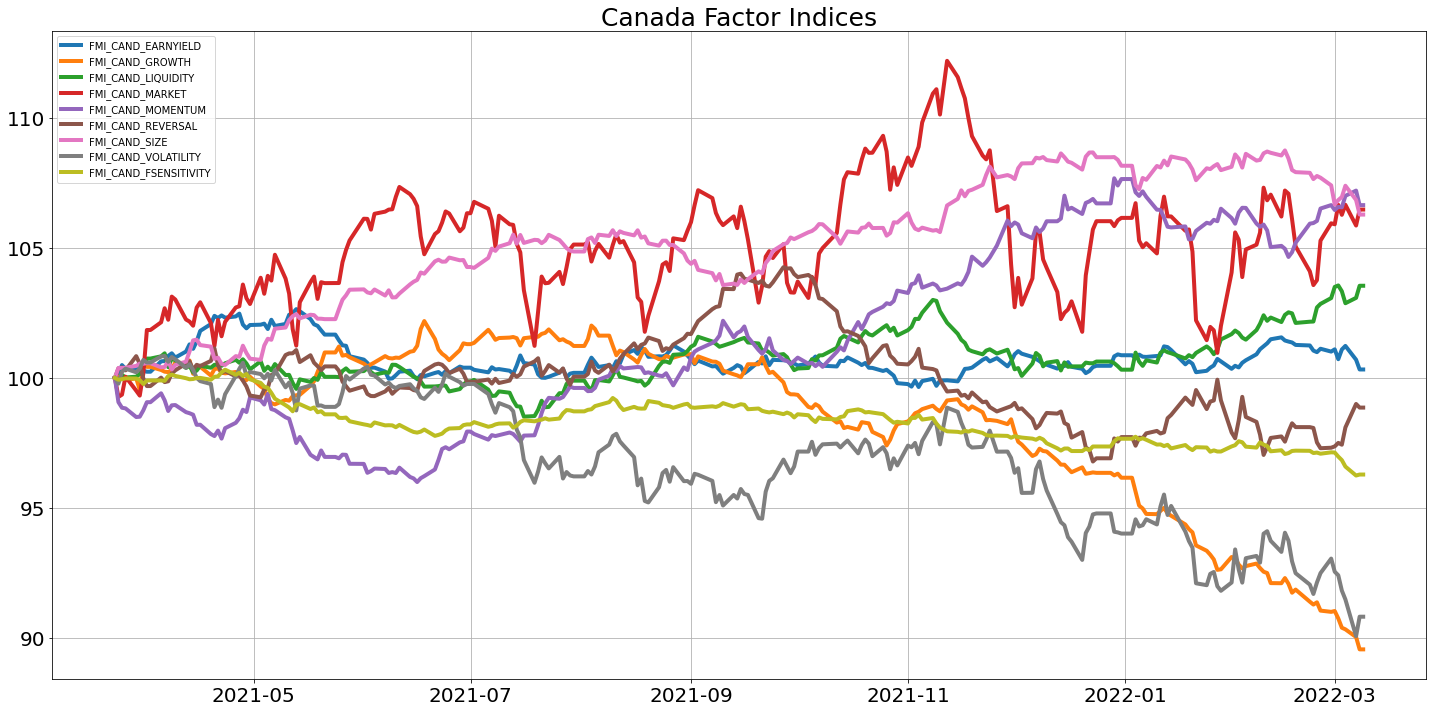

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Canada Factor Indices'}>)

In [30]:
MultiLinePlot(100*cafactors.loc[sdate:]/cafactors.loc[sdate],"Canada Factor Indices",save=True)

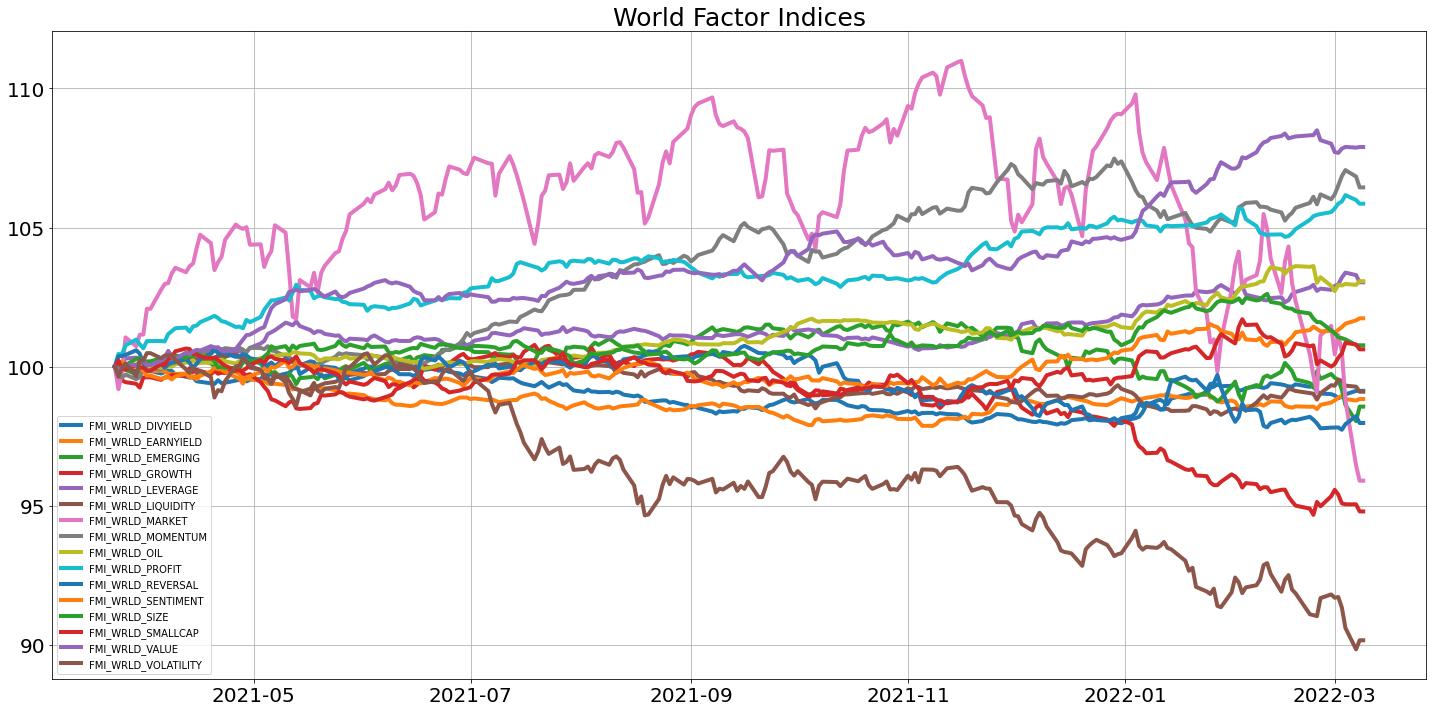

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Indices'}>)

In [31]:
MultiLinePlot(100*wldfactors.loc[sdate:]/wldfactors.loc[sdate],"World Factor Indices",save=True)

# Sector by Factor loadings

In [3]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
fbsfile = 'Factor Risk Breakdown.xlsx'

In [9]:
unclean = pd.read_excel(dirpath+fbsfile,sheet_name='ONGSS',skiprows=3).dropna(subset=['Filter Level 1'])
unclean

Title Filter Level 1          Filter Level 2  \
0                     ONGSS          ONGSS                     NaN   
1    Communication Services          ONGSS  Communication Services   
2                     STYLE          ONGSS  Communication Services   
3                    Market          ONGSS  Communication Services   
4                      Size          ONGSS  Communication Services   
..                      ...            ...                     ...   
378                INDUSTRY          ONGSS               Utilities   
379               Utilities          ONGSS               Utilities   
380                      FX          ONGSS               Utilities   
381                 CAD/CAD          ONGSS               Utilities   
382                 USD/CAD          ONGSS               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN 1.0000              NaN           NaN         NaN   
1              NaN 2.0000              NaN           NaN         NaN   
2            STYLE 3.0000              NaN           NaN         NaN   
3            STYLE 0.0000     Style Return        4.4550      0.1541   
4            STYLE 0.0000     Style Return        1.1322      0.0191   
..             ...    ...              ...           ...         ...   
378       INDUSTRY 3.0000              NaN           NaN         NaN   
379       INDUSTRY 0.0000  Industry Return        0.6549      0.0661   
380             FX 3.0000              NaN           NaN         NaN   
381             FX 0.0000               FX        0.0100         NaN   
382             FX 0.0000               FX           NaN      0.0581   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN      1,372.5650             NaN   
1          NaN        NaN     NaN        263.9339             NaN   
2       0.1838        NaN  0.1838        186.5287             NaN   
3       0.1193        NaN  0.1193        183.7853             NaN   
4       0.3022        NaN  0.3022         57.8342             NaN   
..         ...        ...     ...             ...             ...   
378     6.2917        NaN  6.2917         41.5829             NaN   
379     6.2917        NaN  6.2917         41.5829             NaN   
380        NaN        NaN     NaN         36.5565             NaN   
381    -6.2917        NaN -6.2917             NaN             NaN   
382     6.2917        NaN  6.2917         36.5565             NaN   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0     1,372.5650        1,372.5650               NaN     1,372.5650  
1       263.9339          152.3655               NaN       152.3655  
2       186.5287          137.2263               NaN       137.2263  
3       183.7853          154.7120               NaN       154.7120  
4        57.8342            2.1802               NaN         2.1802  
..           ...               ...               ...            ...  
378      41.5829          -12.5528               NaN       -12.5528  
379      41.5829          -12.5528               NaN       -12.5528  
380      36.5565          -18.4022               NaN       -18.4022  
381          NaN               NaN               NaN            NaN  
382      36.5565          -18.4022               NaN       -18.4022  

[383 rows x 17 columns]

In [10]:
unclean.loc[unclean['Filter Level 3']=='STYLE']

Title Filter Level 1          Filter Level 2 Filter Level 3  Level  \
2         STYLE          ONGSS  Communication Services          STYLE 3.0000   
3        Market          ONGSS  Communication Services          STYLE 0.0000   
4          Size          ONGSS  Communication Services          STYLE 0.0000   
5    Volatility          ONGSS  Communication Services          STYLE 0.0000   
6      Momentum          ONGSS  Communication Services          STYLE 0.0000   
..          ...            ...                     ...            ...    ...   
369      Growth          ONGSS               Utilities          STYLE 0.0000   
370    Leverage          ONGSS               Utilities          STYLE 0.0000   
371   Sentiment          ONGSS               Utilities          STYLE 0.0000   
372    Emerging          ONGSS               Utilities          STYLE 0.0000   
373         Oil          ONGSS               Utilities          STYLE 0.0000   

      Factor Type  Factor Level  Factor Vol  Portfolio  Benchmark  Active  \
2             NaN           NaN         NaN     0.1838        NaN  0.1838   
3    Style Return        4.4550      0.1541     0.1193        NaN  0.1193   
4    Style Return        1.1322      0.0191     0.3022        NaN  0.3022   
5    Style Return        0.5723      0.0567    -0.0391        NaN -0.0391   
6    Style Return        3.7573      0.0459     0.0517        NaN  0.0517   
..            ...           ...         ...        ...        ...     ...   
369  Style Return        0.7656      0.0230     0.0509        NaN  0.0509   
370  Style Return        0.7294      0.0166    -0.0177        NaN -0.0177   
371  Style Return        0.9180      0.0182    -0.0104        NaN -0.0104   
372  Style Return        1.0798      0.0240    -0.0124        NaN -0.0124   
373  Style Return        1.0220      0.0161    -0.0342        NaN -0.0342   

     Portfolio (bp)  Benchmark (bp)  Active (bp)  Portfolio (bp).1  \
2          186.5287             NaN     186.5287          137.2263   
3          183.7853             NaN     183.7853          154.7120   
4           57.8342             NaN      57.8342            2.1802   
5           22.1702             NaN      22.1702          -12.9071   
6           23.6993             NaN      23.6993           -3.2007   
..              ...             ...          ...               ...   
369         11.6865             NaN      11.6865            0.1814   
370          2.9305             NaN       2.9305           -0.0546   
371          1.8901             NaN       1.8901            0.0227   
372          2.9809             NaN       2.9809           -0.7358   
373          5.4871             NaN       5.4871           -1.6745   

     Benchmark (bp).1  Active (bp).1  
2                 NaN       137.2263  
3                 NaN       154.7120  
4                 NaN         2.1802  
5                 NaN       -12.9071  
6                 NaN        -3.2007  
..                ...            ...  
369               NaN         0.1814  
370               NaN        -0.0546  
371               NaN         0.0227  
372               NaN        -0.7358  
373               NaN        -1.6745  

[170 rows x 17 columns]

# Read in Sector by Factor Sheets

In [46]:
import matplotlib.pyplot as plt

In [44]:
path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)
sxf_df

Title Filter Level 1          Filter Level 2  \
0                          ONGSINTL       ONGSINTL                     NaN   
1            Communication Services       ONGSINTL  Communication Services   
2                             STYLE       ONGSINTL  Communication Services   
3                            Market       ONGSINTL  Communication Services   
4                              Size       ONGSINTL  Communication Services   
..                              ...            ...                     ...   
738                         JPY/CAD       ONGSINTL               Utilities   
739                         NZD/CAD       ONGSINTL               Utilities   
740                        INDUSTRY       ONGSINTL               Utilities   
741  Fuels Refining Storage & Trans       ONGSINTL               Utilities   
742                       Utilities       ONGSINTL               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN      1              NaN           NaN         NaN   
1              NaN      2              NaN           NaN         NaN   
2            STYLE      3              NaN           NaN         NaN   
3            STYLE      0     Style Return           4.0        0.16   
4            STYLE      0     Style Return           1.1       0.021   
..             ...    ...              ...           ...         ...   
738             FX      0               FX          0.92       0.082   
739             FX      0               FX         0.012       0.077   
740       INDUSTRY      3              NaN           NaN         NaN   
741       INDUSTRY      0  Industry Return          0.62        0.13   
742       INDUSTRY      0  Industry Return          0.66       0.079   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN         1.3e+03         1.4e+03   
1          NaN        NaN     NaN         6.2e+01         6.8e+01   
2        0.036       0.15   -0.11         4.9e+01         6.8e+01   
3        0.025      0.048  -0.023           4e+01         7.5e+01   
4        0.031      0.049  -0.019             6.5         1.1e+01   
..         ...        ...     ...             ...             ...   
738        NaN        0.2    -0.2             NaN             1.7   
739        NaN      0.046  -0.046             NaN            0.36   
740        NaN        3.4    -3.4             NaN         2.7e+01   
741        NaN       0.11   -0.11             NaN             1.4   
742        NaN        3.3    -3.3             NaN         2.6e+01   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0        3.4e+02           1.3e+03           1.4e+03        3.4e+02  
1        5.8e+01           3.6e+01           5.9e+01        1.6e+01  
2        2.4e+01           3.7e+01           5.3e+01            2.8  
3        3.5e+01             3e+01           5.6e+01          -0.95  
4            4.0               1.9               3.1           0.17  
..           ...               ...               ...            ...  
738          1.7               NaN             -0.28           0.23  
739         0.36               NaN              0.07           0.09  
740      2.7e+01               NaN              -9.4            5.4  
741          1.4               NaN              -0.5         0.0078  
742      2.6e+01               NaN              -8.8            5.4  

[743 rows x 17 columns]

In [45]:
sxf_df['Filter Level 2'].unique()

array([nan, 'Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials', 'None',
       'Real Estate', 'Utilities'], dtype=object)

C:\Users\jknechtel\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


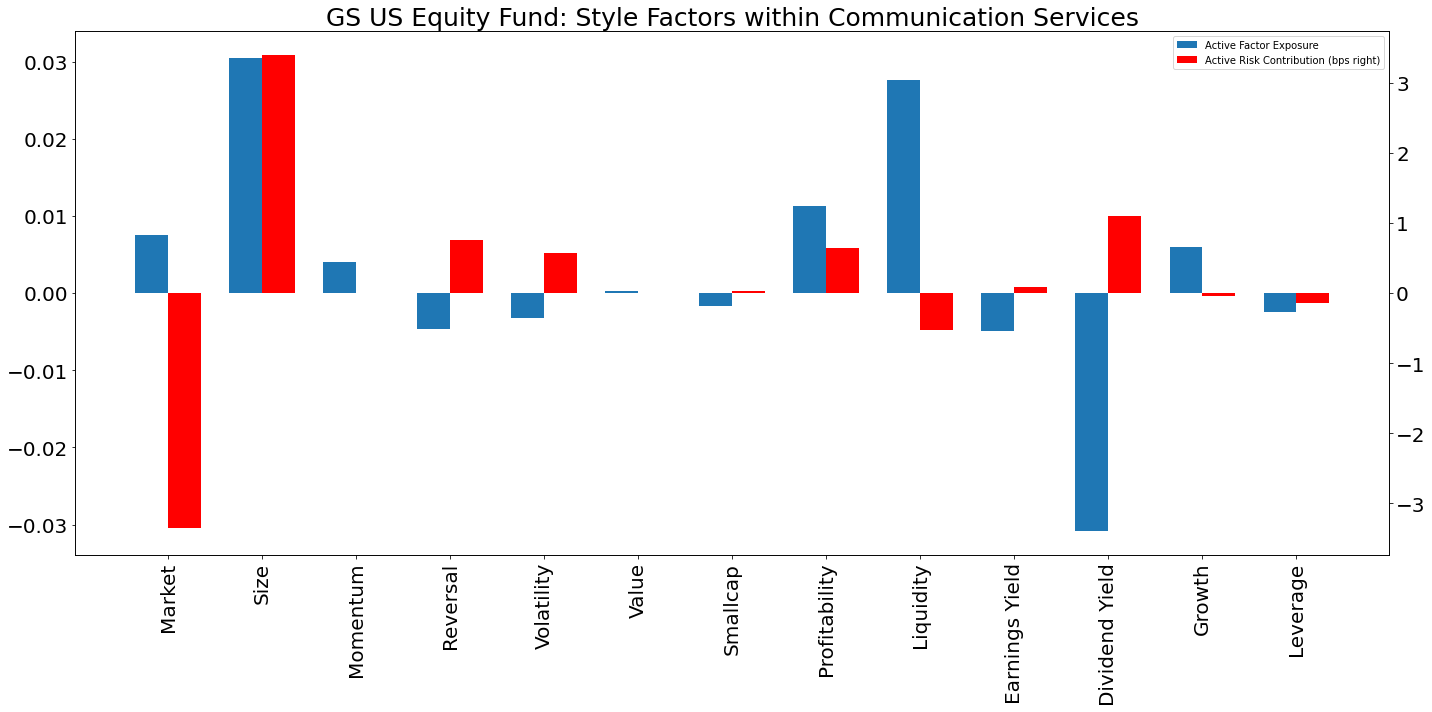

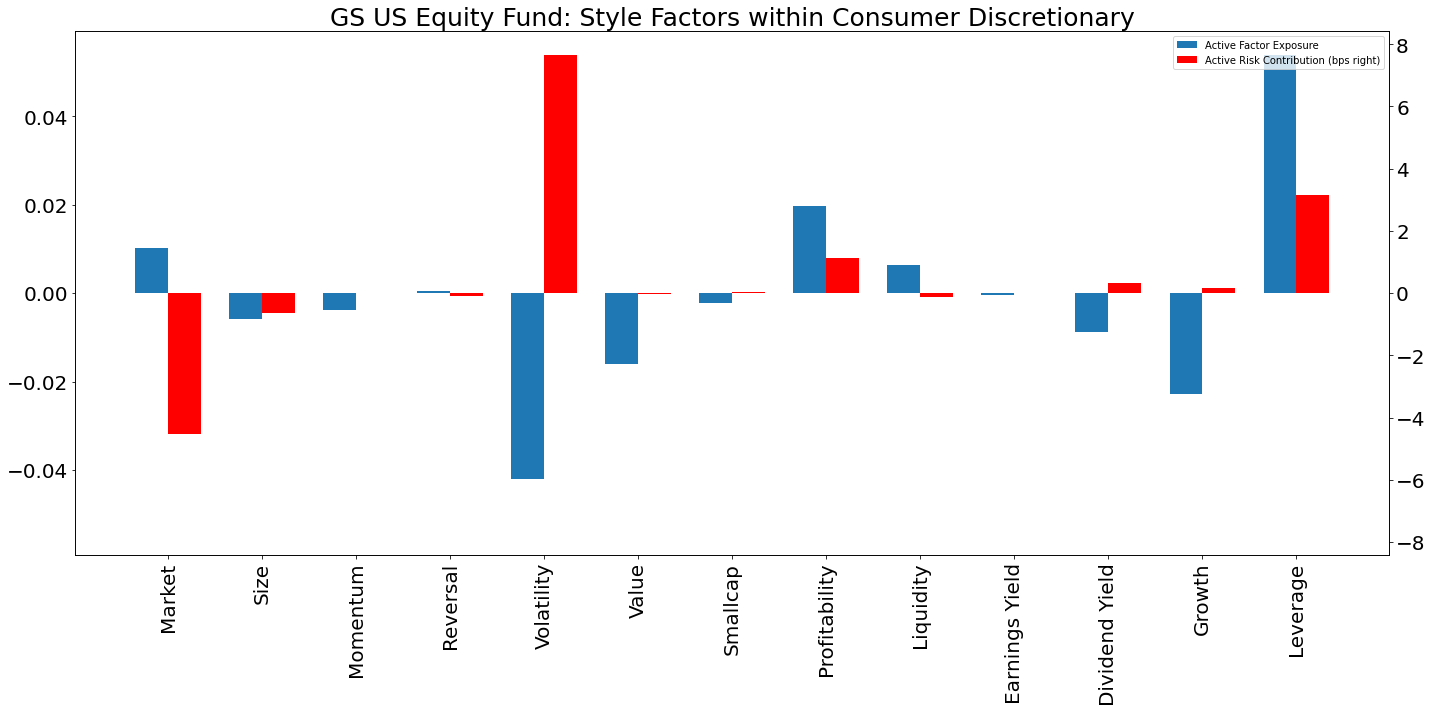

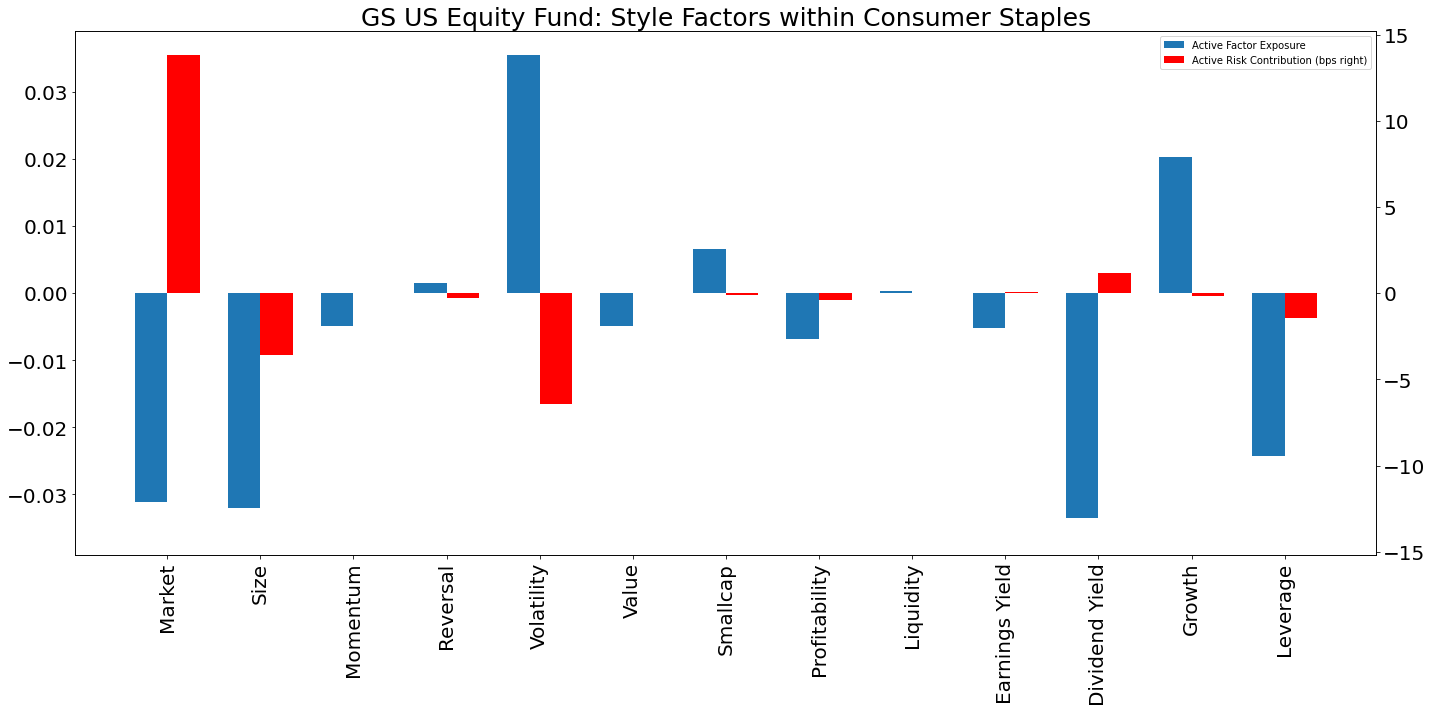

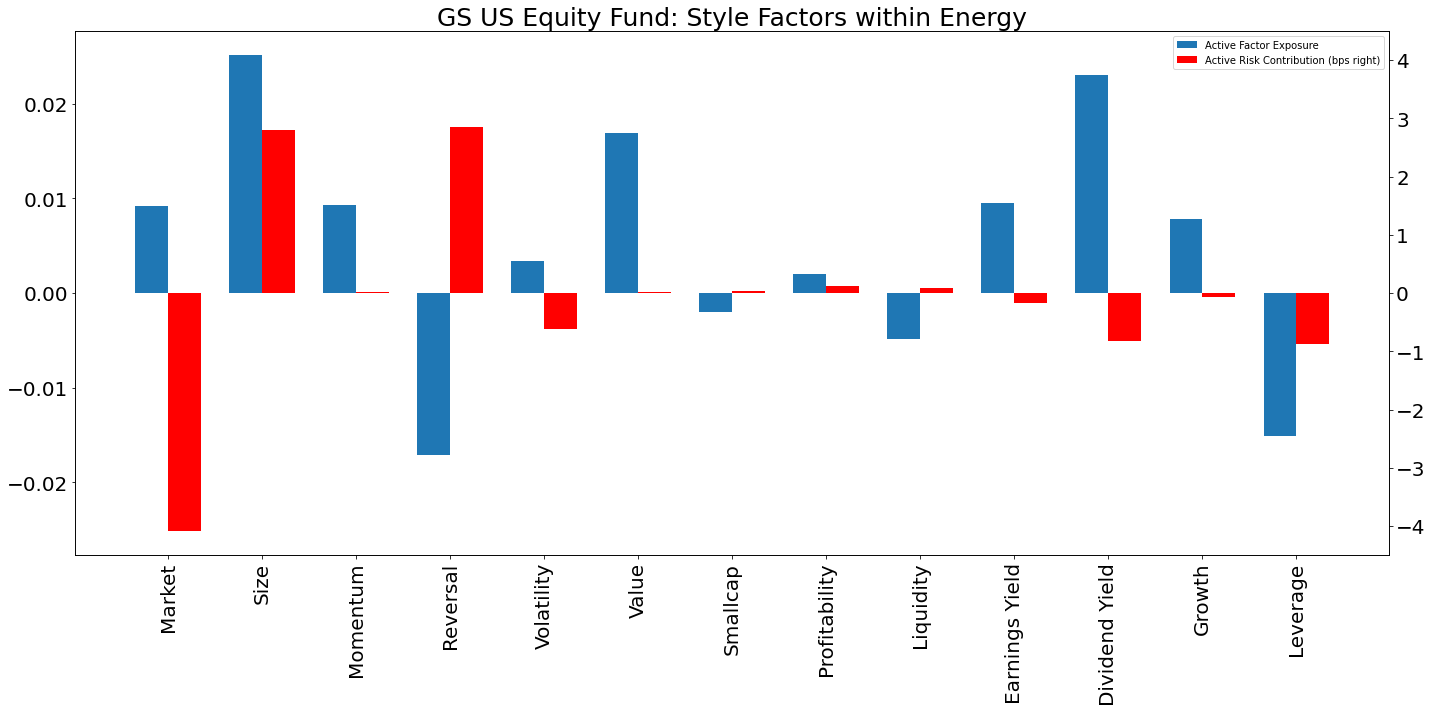

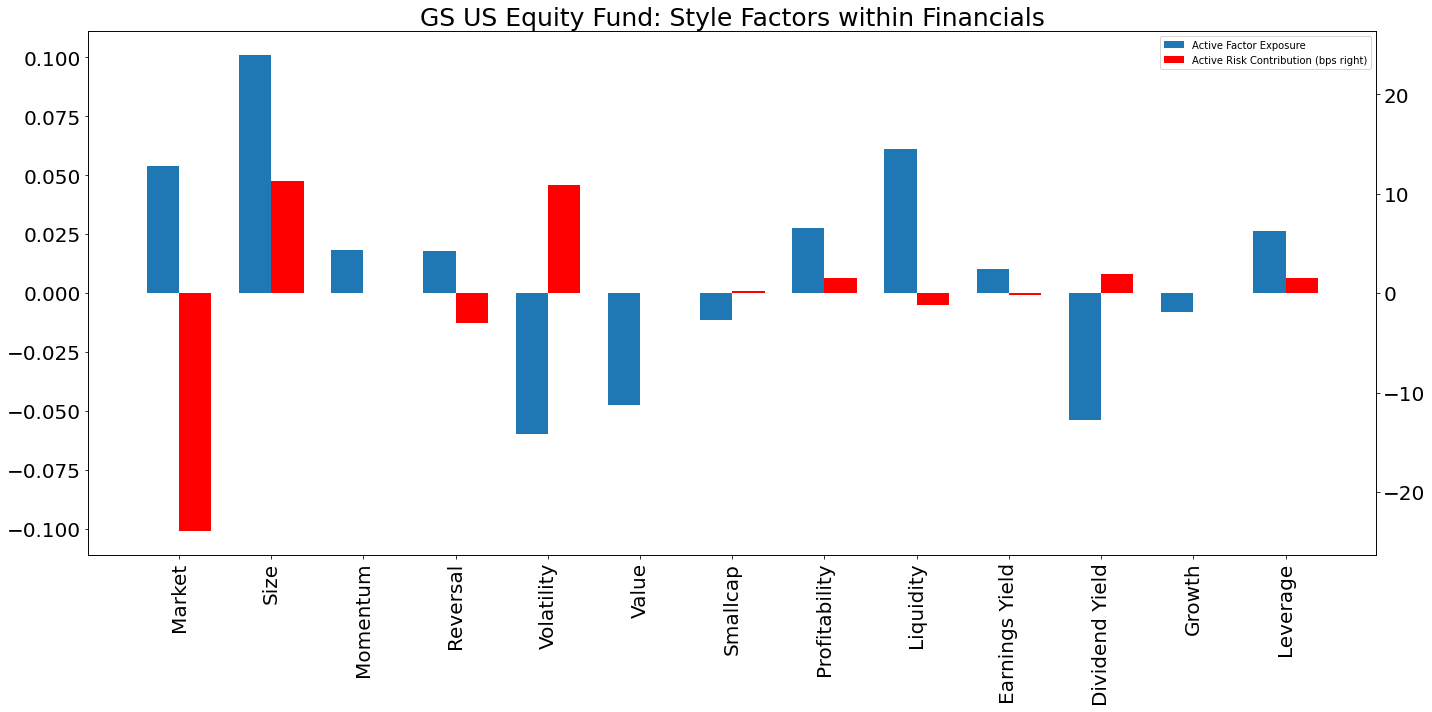

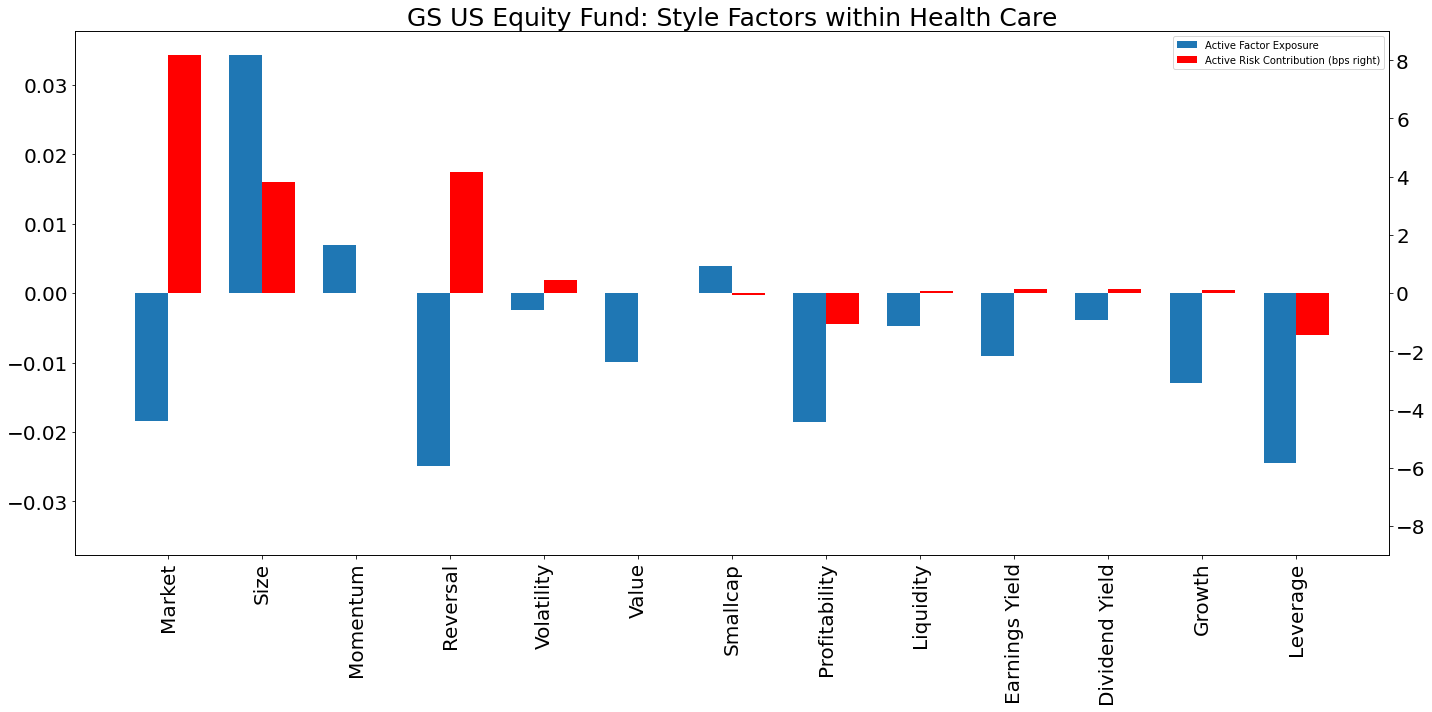

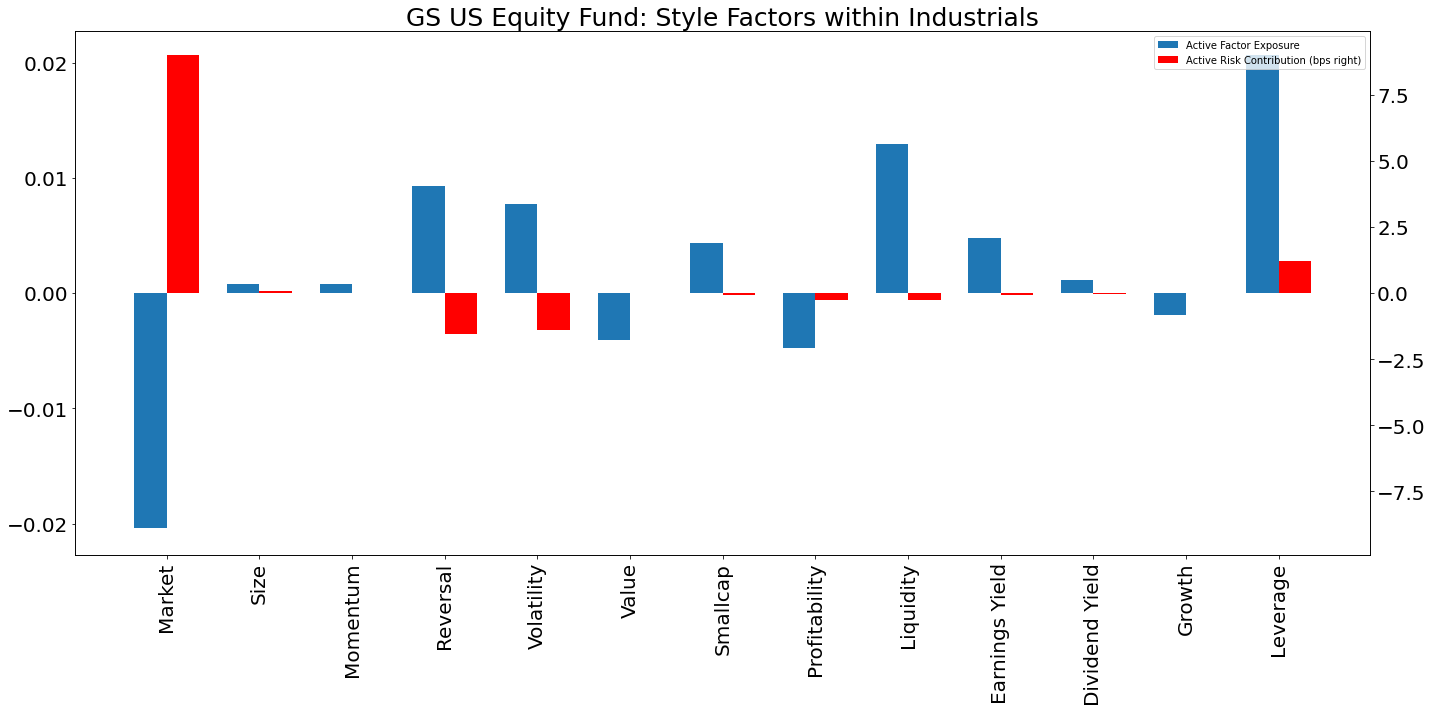

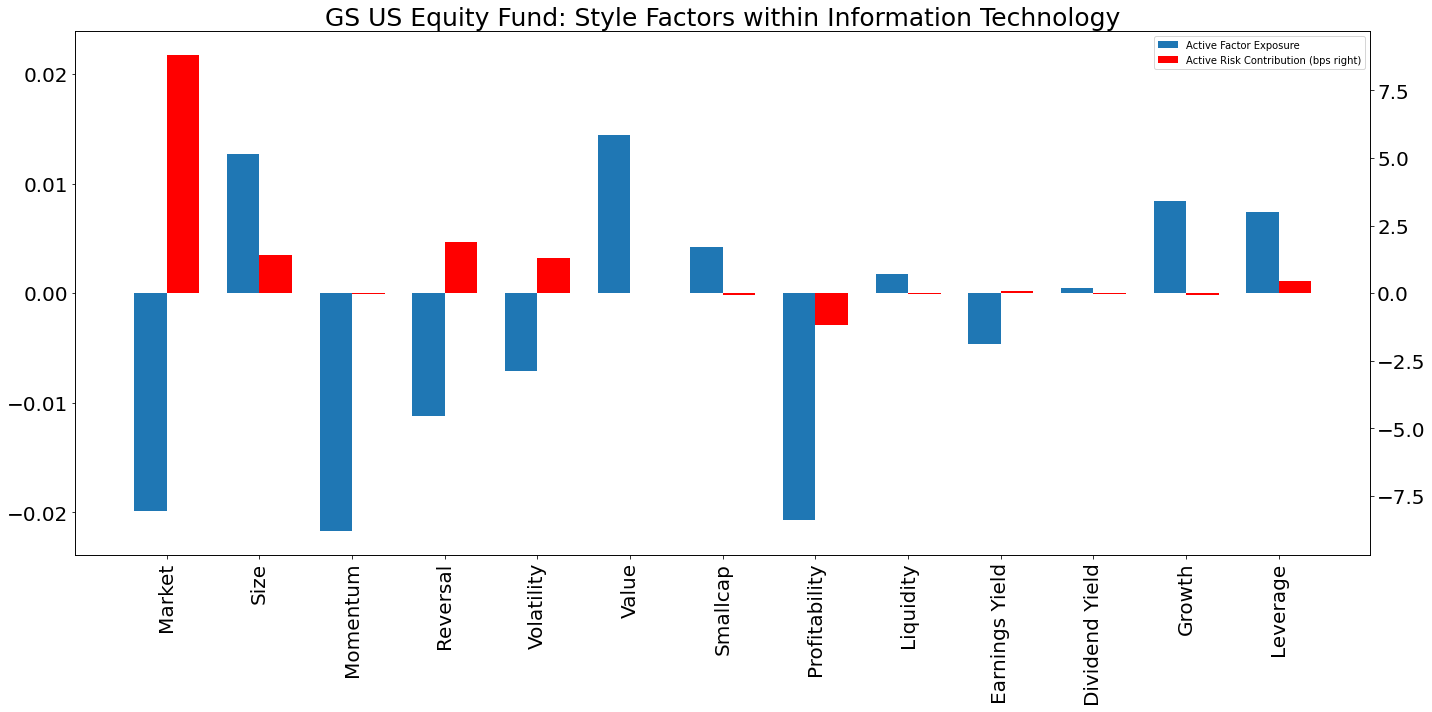

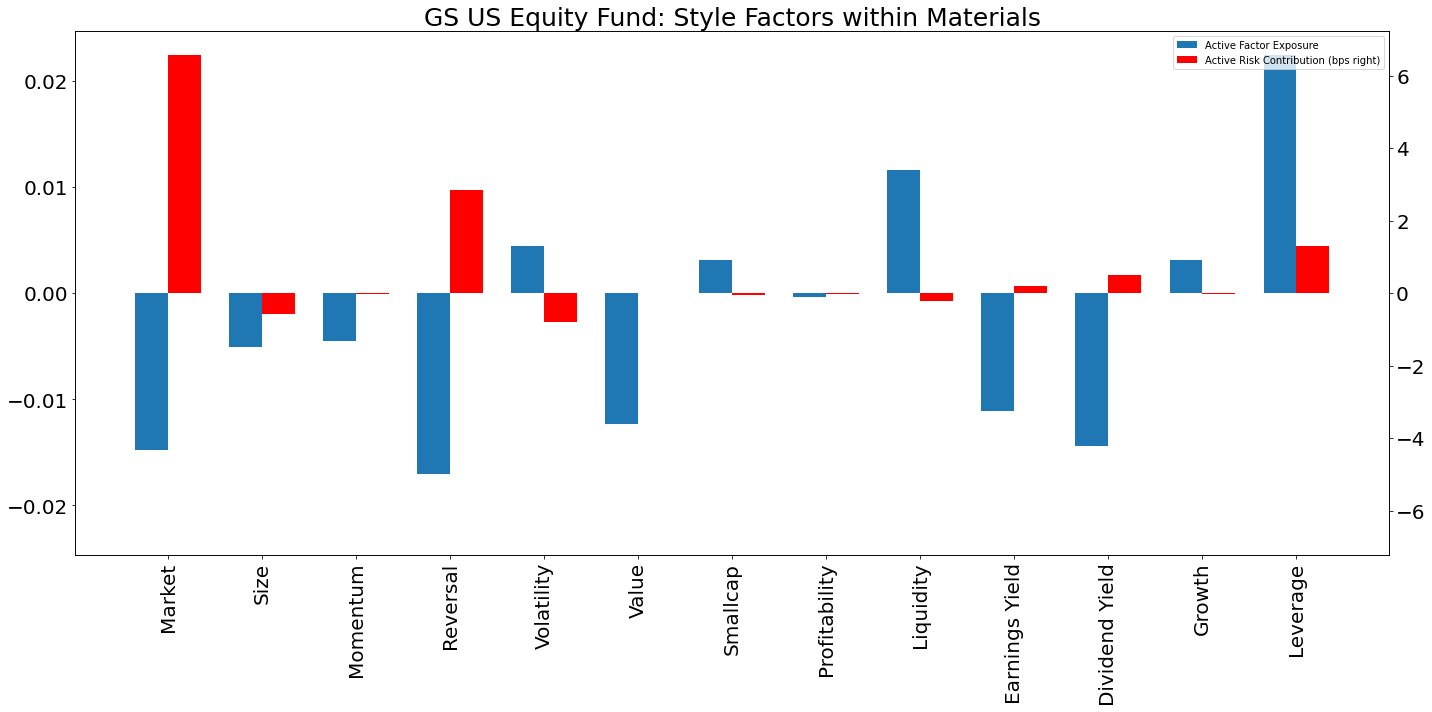

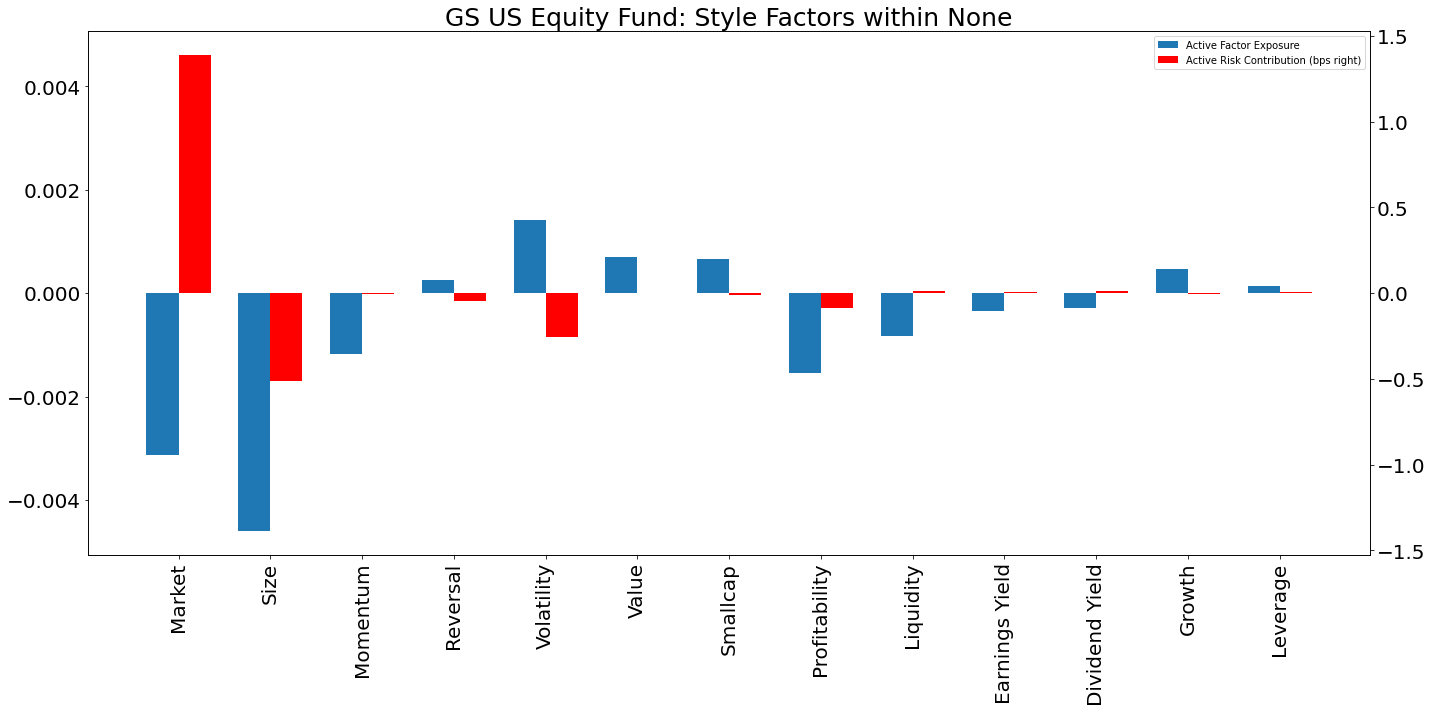

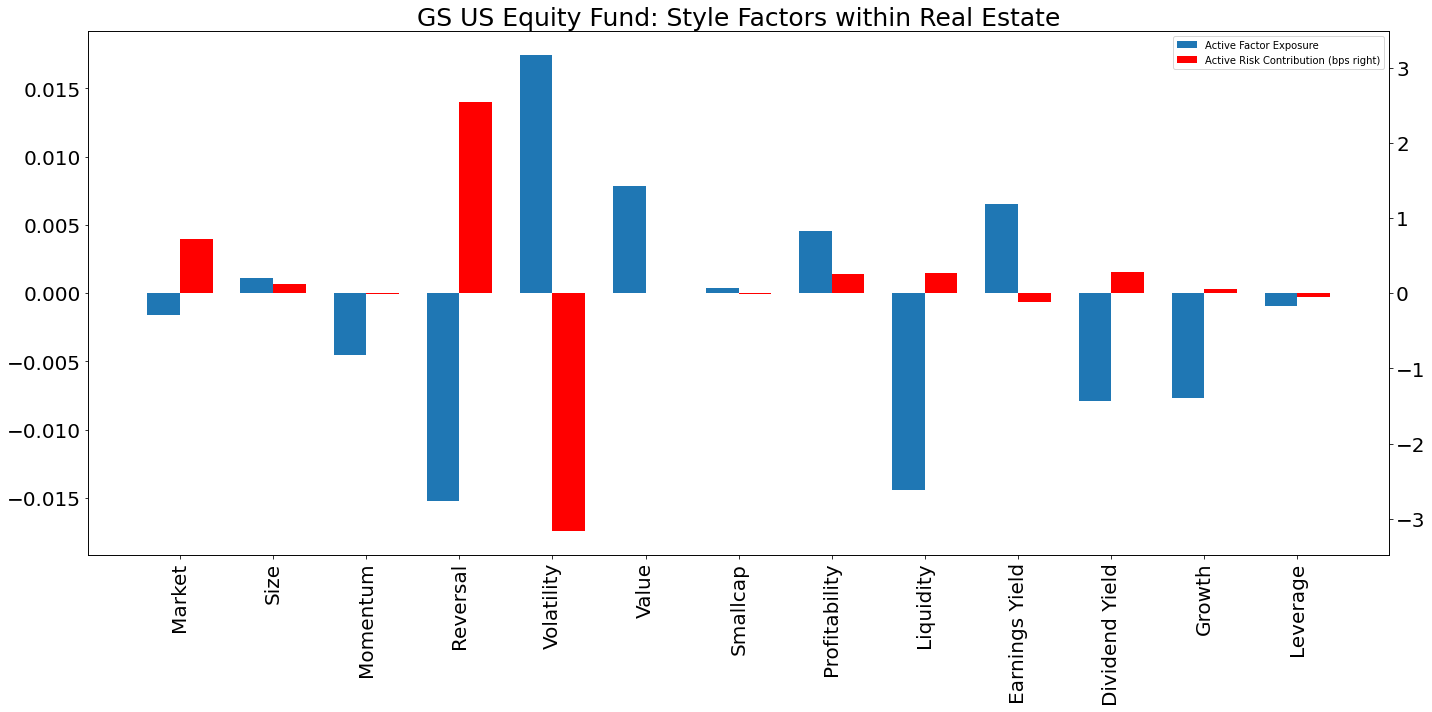

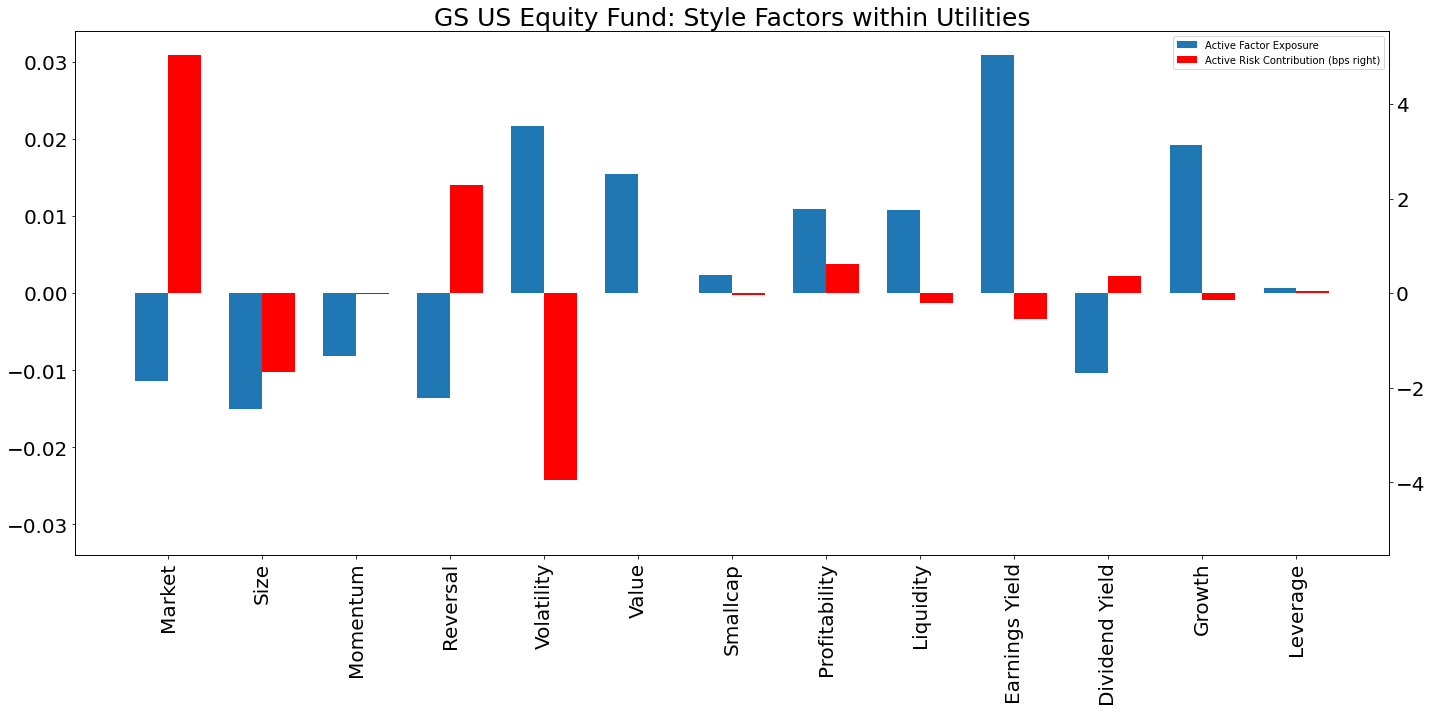

In [157]:
file = 'GS USEQ Sector by Factor 03-17-22.xlsx'
SectorByFactorCharts(file,'GS US Equity Fund')

In [155]:
def SectorByFactorCharts(file,fund):
    path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
    #file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
    sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

    for sector in sxf_df['Filter Level 2'].unique():

        if str(sector) == 'nan':
            continue

        mask = (sxf_df['Filter Level 2']==sector)\
                                  &(sxf_df['Level']==0)&(sxf_df['Filter Level 3']=='STYLE')

        labels = sxf_df.loc[mask,' Title'].tolist()
        factor_exp = sxf_df.loc[mask,'Active']
        risk_contr = sxf_df.loc[mask,'Active (bp).1']

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots(figsize=(20,10))
        ax2 = ax.twinx() 

        rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
        rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)

        ax.set_title(fund+': Style Factors within ' +sector,fontsize=25);

        ax.set_xticks(x);
        ax.set_xticklabels(labels, rotation='vertical');
        #ax.legend();
        fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
        
        try:
            ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
            ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
        except:
            pass
        #ax.bar_label(rects1, padding=3)
        #ax.bar_label(rects2, padding=3)

        fig.tight_layout()

        plt.show()

        fig.savefig(path+fund+'StyleFactors_' +sector+'.png',format="png")

Text(0.5, 1.0, 'Style Factors within Communication Services')

[Text(0, 0, 'Market'),
 Text(1, 0, 'Size'),
 Text(2, 0, 'Volatility'),
 Text(3, 0, 'Momentum'),
 Text(4, 0, 'Reversal'),
 Text(5, 0, 'Liquidity'),
 Text(6, 0, 'SmallCap'),
 Text(7, 0, 'Value'),
 Text(8, 0, 'Profitability'),
 Text(9, 0, 'Earnings Yield'),
 Text(10, 0, 'Dividend Yield'),
 Text(11, 0, 'Growth'),
 Text(12, 0, 'Leverage'),
 Text(13, 0, 'Sentiment'),
 Text(14, 0, 'Emerging'),
 Text(15, 0, 'Oil')]

(-0.03803744954950829, 0.03803744954950829)

(-1.65904564682203, 1.65904564682203)

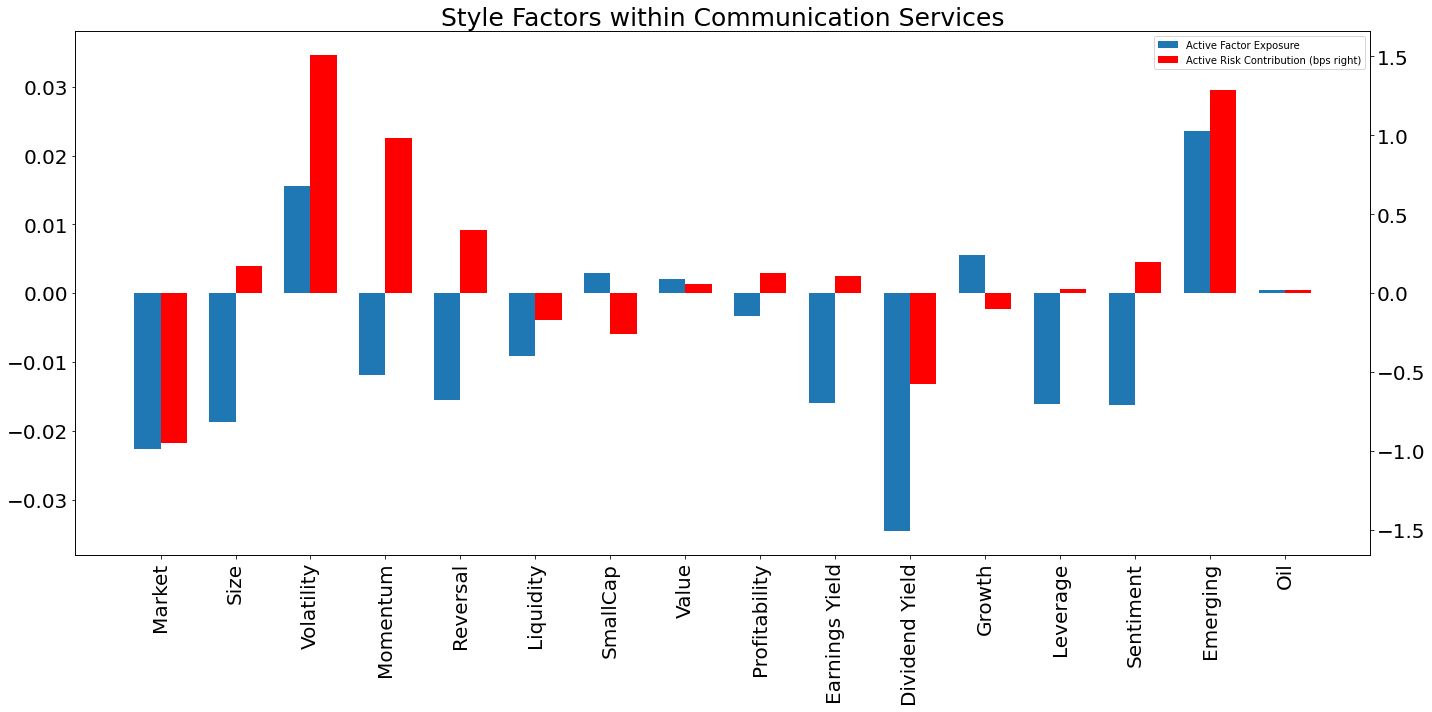

In [104]:
sector ='Communication Services'

mask = (sxf_df['Filter Level 2']==sector)\
                          &(sxf_df['Level']==0)&(sxf_df['Filter Level 3']=='STYLE')
#sector_slice = sxf_df.loc[mask,' Title']

labels = sxf_df.loc[mask,' Title'].tolist()
factor_exp = sxf_df.loc[mask,'Active']
risk_contr = sxf_df.loc[mask,'Active (bp).1']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10));
#ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx(); # C

rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
#ax.secondary_yaxis()
# Add some text for labels, title and custom x-axis tick labels, etc.

#ax.set_ylabel('Active Factor Exposure');
#ax2.set_ylabel('Active Risk Contribution (bps right)');
ax.set_title('Style Factors within ' +sector,fontsize=25);

ax.set_xticks(x);
ax.set_xticklabels(labels, rotation='vertical');
#ax.legend(rects1+rects2,[rects1.get_label(),rects2.get_label()]);
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout();

plt.show();

fig.savefig(path+'StyleFactors_' +sector+'.png',format="png")

In [ ]:
from pptx import Presentation
from pptx.util import Inches

X = Presentation()

Layout = X.slide_layouts[0]
first_slide = X.slides.add_slide(Layout)

first_slide.shapes.title.text = "Creating a powerpoint using Python" first_slide.placeholders[1].text = "Created by Tutorialpoints"

X.save("First_presentation.pptx")

Second_Layout = X.slide_layouts[5]
second_slide = X.slides.add_slide(Second_Layout)
second_slide.shapes.title.text = "Second slide"

textbox = second_slide.shapes.add_textbox(Inches(3), Inches(1.5),Inches(3), Inches(1)) textframe = textbox.text_frame
paragraph = textframe.add_paragraph()
paragraph.text = "This is a paragraph in the second slide!"

X.save("First_presentation.pptx")

In [ ]:
path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
file = 'PIF Factor based analysis.xlsx'
sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

In [ ]:
def FactorCharts(file):
    path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
    #file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
    sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

    if "PIF" in file:
        rmodel = 'CAND Style'
        fund = 'PIF'
    elif "DDF" in file:
        rmodel = 'CAND Style'
        fund = 'DDF'
    elif "INTL" in file:    
        rmodel = 'CAND Style'
        fund = 'WRLD Style'
    elif "GSS" in file:    
        rmodel = 'WRLD Style'
        fund = 'GSS'
    elif "USEQ" in file:
        rmodel = 'US Style'
        fund = 'US Equity Fund'
    else:
        print('Can\'t find fund!')
        
    mask = (sxf_df['Level']==0)&(sxf_df['Filter Level 3']==rmodel)

    labels = sxf_df.loc[mask,' Title'].tolist()
    factor_exp = sxf_df.loc[mask,'Active']
    risk_contr = sxf_df.loc[mask,'Active (bp).1']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,10))
    ax2 = ax.twinx() 

    rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
    rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)

    ax.set_title(fund+': Style Factors within ' +sector,fontsize=25);

    ax.set_xticks(x);
    ax.set_xticklabels(labels, rotation='vertical');
    #ax.legend();
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

    try:
        ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
        ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
    except:
        pass
    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

    fig.savefig(path+fund+'StyleFactors_' +sector+'.png',format="png")